# **Smartphones Dataset:**

# **Data Assessing and Data Cleaning:**

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
smartphones = pd.read_csv('/content/drive/MyDrive/Python Source(Python, Numpy, Pandas, D. Viz, D. Clean, D. Ass, EDA)/smartphones - smartphones.csv')

In [4]:
smartphones.head()

model    price  rating  \
0              OnePlus 11 5G  ₹54,999    89.0   
1  OnePlus Nord CE 2 Lite 5G  ₹19,989    81.0   
2      Samsung Galaxy A14 5G  ₹16,499    75.0   
3       Motorola Moto G62 5G  ₹14,999    81.0   
4         Realme 10 Pro Plus  ₹24,999    82.0   

                                       sim  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
2       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
3       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
4       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   

                                         processor                        ram  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  12 GB RAM, 256 GB inbuilt   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor   6 GB RAM, 128 GB inbuilt   
2        Exynos 1330, Octa Core, 2.4 GHz Processor    4 GB RAM, 64 GB inbuilt   
3    Snapdragon  695, Octa Core, 2.2 GHz Processor   6 GB RAM, 128 GB inbuilt   
4     Dimensity 1080, Octa Core, 2.6 GHz Processor   6 GB RAM, 128 GB inbuilt   

                                    battery  \
0  5000 mAh Battery with 100W Fast Charging   
1   5000 mAh Battery with 33W Fast Charging   
2   5000 mAh Battery with 15W Fast Charging   
3       5000 mAh Battery with Fast Charging   
4   5000 mAh Battery with 67W Fast Charging   

                                             display  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...   
2  6.6 inches, 1080 x 2408 px, 90 Hz Display with...   
3  6.55 inches, 1080 x 2400 px, 120 Hz Display wi...   
4  6.7 inches, 1080 x 2412 px, 120 Hz Display wit...   

                                              camera  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   
2  50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...   
3  50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...   
4  108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...   

                               card           os  
0         Memory Card Not Supported  Android v13  
1   Memory Card (Hybrid), upto 1 TB  Android v12  
2  Memory Card Supported, upto 1 TB  Android v13  
3   Memory Card (Hybrid), upto 1 TB  Android v12  
4         Memory Card Not Supported  Android v13

In [5]:
smartphones.shape

(1020, 11)

## **Summary of Data:**
* This dataset provides a comprehensive collection of information about all the latest smartphones available in the market as of the current time.

* In an era defined by technological marvels, smartphones have emerged as essential companions in our daily lives. As the smartphone market continuously evolves, the ability to forecast prices accurately becomes a game-changer for consumers, manufacturers, and investors alike.

* This project represents a convergence of data science and consumer electronics, where we harness the potential of machine learning algorithms to unravel the intricate relationships between smartphone attributes and their corresponding prices.

In [6]:
#converted csv file into excel sheet to observe the data manually
with pd.ExcelWriter('smartphones_dataset.xlsx') as writer:
  smartphones.to_excel(writer, sheet_name = 'smartphones_df')

## Data Assessing
## **Issues with data:**
### Quality Issues

1. **model** - some brands are written diiferently like OPPO in model column `consistency`
2. **price** - has unneccesary '₹' `validity`
3. **price** - has ',' between numbers `validity`
4. **price** - phone Namotel has a price of 99 `accuracy`
5. **ratings** - missing values `completeness`
6. **processor** - has some incorrect values for some samsung phones(row # -642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002) `validity`
7. There is ipod on row 756 `validity`
8. **memory** - incorrect values in rows (441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002) `validity`
9. **battery** - incorrect values in rows(113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002) `validity`
10. **display** - sometimes frequency is not available `completeness`
11. **display** - incorrect values in rows(378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002) `validity`
12. certain phones are foldable and the info is scattered `validity`
13. **camera** - words like Dual, Triple and Quad are used to represent number of cameras and front and rear cameras are separated by '&'
14. **camera** - problem with rows (100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016
) `validity`
15. **card** - sometimes contains info about os and camera `validity`
16. **os** - sometimes contains info about bluetooth and fm radio `validity`
17. **os** - issue with rows (324,378) `validity`
18. **os** - sometimes contains os version name like lollipop `consistency`
19. missing values in camera, card and os `completeness`
20. datatype  of price and rating is incorrect `validity`



### Tidiness Issues

1. **sim** - can be split into 3 cols has_5g, has_NFC, has_IR_Blaster
2. **ram** - can be split into 2 cols RAM and ROM
3. **processor** - can be split into processor name, cores and cpu speed.
4. **battery** - can be split into battery capacity, fast_charging_available
5. **display** - can be split into size, resolution_width, resolution_height and frequency
6. **camera** - can be split into front and rear camera
7. **card** - can be split into supported, extended_upto

In [7]:
smartphones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   object 
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), object(10)
memory usage: 87.8+ KB


In [8]:
smartphones.duplicated().sum()

0

In [67]:
smartphones_df = smartphones.copy()

In [68]:
smartphones_df['price'] = smartphones_df['price'].str.replace('₹', '').str.replace(',', '').astype('int')

**conclusion:**
* Removed '₹' and ',' from the column and converted price column into integer

In [69]:
smartphones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   model      1020 non-null   object 
 1   price      1020 non-null   int64  
 2   rating     879 non-null    float64
 3   sim        1020 non-null   object 
 4   processor  1020 non-null   object 
 5   ram        1020 non-null   object 
 6   battery    1020 non-null   object 
 7   display    1020 non-null   object 
 8   camera     1019 non-null   object 
 9   card       1013 non-null   object 
 10  os         1003 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 87.8+ KB


In [70]:
smartphones_df = smartphones_df.reset_index()

In [71]:
smartphones_df['index'] = smartphones_df['index'] + 2

In [72]:
smartphones_df

index                            model  price  rating  \
0         2                    OnePlus 11 5G  54999    89.0   
1         3        OnePlus Nord CE 2 Lite 5G  19989    81.0   
2         4            Samsung Galaxy A14 5G  16499    75.0   
3         5             Motorola Moto G62 5G  14999    81.0   
4         6               Realme 10 Pro Plus  24999    82.0   
...     ...                              ...    ...     ...   
1015   1017       Motorola Moto Edge S30 Pro  34990    83.0   
1016   1018                      Honor X8 5G  14990    75.0   
1017   1019  POCO X4 GT 5G (8GB RAM + 256GB)  28990    85.0   
1018   1020             Motorola Moto G91 5G  19990    80.0   
1019   1021           Samsung Galaxy M52s 5G  24990    74.0   

                                                    sim  \
0               Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
1                    Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
2                    Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
3                    Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
4                    Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
...                                                 ...   
1015                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
1016                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
1017  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
1018            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
1019                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   

                                            processor  \
0     Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor   
1        Snapdragon 695, Octa Core, 2.2 GHz Processor   
2           Exynos 1330, Octa Core, 2.4 GHz Processor   
3       Snapdragon  695, Octa Core, 2.2 GHz Processor   
4        Dimensity 1080, Octa Core, 2.6 GHz Processor   
...                                               ...   
1015    Snapdragon 8 Gen1, Octa Core, 3 GHz Processor   
1016   Snapdragon  480+, Octa Core, 2.2 GHz Processor   
1017    Dimensity 8100, Octa Core, 2.85 GHz Processor   
1018     Snapdragon 695, Octa Core, 2.2 GHz Processor   
1019                              Octa Core Processor   

                            ram                                    battery  \
0     12 GB RAM, 256 GB inbuilt   5000 mAh Battery with 100W Fast Charging   
1      6 GB RAM, 128 GB inbuilt    5000 mAh Battery with 33W Fast Charging   
2       4 GB RAM, 64 GB inbuilt    5000 mAh Battery with 15W Fast Charging   
3      6 GB RAM, 128 GB inbuilt        5000 mAh Battery with Fast Charging   
4      6 GB RAM, 128 GB inbuilt    5000 mAh Battery with 67W Fast Charging   
...                         ...                                        ...   
1015   8 GB RAM, 128 GB inbuilt  5000 mAh Battery with 68.2W Fast Charging   
1016   6 GB RAM, 128 GB inbuilt  5000 mAh Battery with 22.5W Fast Charging   
1017   8 GB RAM, 256 GB inbuilt    5080 mAh Battery with 67W Fast Charging   
1018   6 GB RAM, 128 GB inbuilt        5000 mAh Battery with Fast Charging   
1019   8 GB RAM, 128 GB inbuilt        5000 mAh Battery with Fast Charging   

                                                display  \
0     6.7 inches, 1440 x 3216 px, 120 Hz Display wit...   
1     6.59 inches, 1080 x 2412 px, 120 Hz Display wi...   
2     6.6 inches, 1080 x 2408 px, 90 Hz Display with...   
3     6.55 inches, 1080 x 2400 px, 120 Hz Display wi...   
4     6.7 inches, 1080 x 2412 px, 120 Hz Display wit...   
...                                                 ...   
1015  6.67 inches, 1080 x 2460 px, 120 Hz Display wi...   
1016  6.5 inches, 720 x 1600 px Display with Water D...   
1017  6.6 inches, 1080 x 2460 px, 144 Hz Display wit...   
1018  6.8 inches, 1080 x 2400 px Display with Punch ...   
1019  6.5 inches, 1080 x 2400 px Display with Water ...   

                                                 camera  \
0     50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1     64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   
2     50 MP + 2 MP + 2 MP Triple

In [73]:
processor_rows = set((642,647,649,659,667,701,750,759,819,859,883,884,919,927,929,932,1002))
ram_rows = set((441,485,534,553,584,610,613,642,647,649,659,667,701,750,759,819,859,884,919,927,929,932,990,1002))
battery_rows = set((113,151,309,365,378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,756,759,764,819,855,859,884,915,916,927,929,932,990,1002))
display_rows = set((378,441,450,553,584,610,613,630,642,647,649,659,667,701,750,759,764,819,859,884,915,916,927,929,932,990,1002))
camera_rows = set((100,113,151,157,161,238,273,308,309,323,324,365,367,378,394,441,450,484,506,534,553,571,572,575,584,610,613,615,630,642,647,649,659,667,684,687,705,711,723,728,750,756,759,764,792,819,846,854,855,858,883,884,896,915,916,927,929,932,945,956,990,995,1002,1016))

In [74]:
smartphones_df[smartphones_df['index'].isin(processor_rows | ram_rows | battery_rows | display_rows | camera_rows)]

index                              model   price  rating  \
98      100                     Vivo X Fold 5G  106990     NaN   
111     113                    Apple iPhone 12   51999    74.0   
149     151               Apple iPhone 12 Mini   40999    74.0   
155     157                    Nokia 2780 Flip    4990     NaN   
159     161                    Oppo Find N2 5G   94990     NaN   
...     ...                                ...     ...     ...   
954     956  Vivo X Fold 5G (12GB RAM + 512GB)  118990     NaN   
988     990                Nokia 5310 Dual Sim    3399     NaN   
993     995                      Huawei Mate X  169000     NaN   
1000   1002                    XTouch F40 Flip    1999     NaN   
1014   1016                      Vivo X Fold 2  119990     NaN   

                                                    sim  \
98              Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
111             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
149             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
155                             Dual Sim, 3G, 4G, Wi-Fi   
159             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
...                                                 ...   
954             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
988                                            Dual Sim   
993   Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
1000                                           Dual Sim   
1014            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   

                                             processor  \
98       Snapdragon 8 Gen1, Octa Core, 3 GHz Processor   
111           Bionic A14, Hexa Core, 3.1 GHz Processor   
149           Bionic A14, Hexa Core, 3.1 GHz Processor   
155     Snapdragon QM215, Quad Core, 1.3 GHz Processor   
159   Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor   
...                                                ...   
954      Snapdragon 8 Gen1, Octa Core, 3 GHz Processor   
988                            8 MB RAM, 16 MB inbuilt   
993          Kirin  990, Octa Core, 2.86 GHz Processor   
1000                                             No 3G   
1014   Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor   

                            ram  \
98    12 GB RAM, 256 GB inbuilt   
111     4 GB RAM, 64 GB inbuilt   
149     4 GB RAM, 64 GB inbuilt   
155    4 GB RAM, 512 MB inbuilt   
159   12 GB RAM, 256 GB inbuilt   
...                         ...   
954   12 GB RAM, 512 GB inbuilt   
988            1200 mAh Battery   
993    8 GB RAM, 512 GB inbuilt   
1000                    No Wifi   
1014  12 GB RAM, 256 GB inbuilt   

                                                battery  \
98              4600 mAh Battery with 66W Fast Charging   
111   6.1 inches, 1170 x 2532 px Display with Large ...   
149                  5.4 inches, 1080 x 2340 px Display   
155                                    1450 mAh Battery   
159             4520 mAh Battery with 67W Fast Charging   
...                                                 ...   
954             4600 mAh Battery with 66W Fast Charging   
988                    2.4 inches, 240 x 320 px Display   
993             4500 mAh Battery with 55W Fast Charging   
1000                           32 MB RAM, 32 MB inbuilt   
1014            4800 mAh Battery with 66W Fast Charging   

                                                display  \
98          8.03 inches, 1916 x 2160 px, 120 Hz Display   
111        12 MP + 12 MP Dual Rear & 12 MP Front Camera   
149        12 MP + 12 MP Dual Rear & 12 MP Front Camera   
155                    2.7 inches, 240 x 320 px Display   
159   7.1 inches, 1792 x 1920 px, 120 Hz Display wit...   
...                                                 ...   
954         8.03 inches, 1916 x 2160 px, 120 Hz Display   
988                                  0.3 MP Rear Camera   
993                    8 inches, 2200 x 2480 px Display   
1000                                    800 mAh Battery   
1014        8.03 inches, 191

In [75]:
# this data contains of some feature phones which is not require for our analysis
smartphones_df[smartphones_df['index'].isin(processor_rows & ram_rows & battery_rows & display_rows & camera_rows)]

index                   model  price  rating  \
640     642          Nokia 105 Plus   1299     NaN   
645     647         Nokia 2760 Flip   5490     NaN   
647     649       Motorola Moto A10   1339     NaN   
657     659           Zanco Tiny T1   2799     NaN   
665     667            itel it2163S    958     NaN   
748     750            Nokia 400 4G   3290     NaN   
757     759            Karbonn KU3i    995     NaN   
817     819            itel Magic X   2239     NaN   
882     884  Nokia 5710 XpressAudio   4799     NaN   
925     927           Nokia 3310 4G   3999     NaN   
927     929      Samsung Guru E1200   1685     NaN   
930     932        iKall K88 Pro 4G   2099     NaN   
1000   1002         XTouch F40 Flip   1999     NaN   

                                 sim                   processor  \
640                         Dual Sim      4 MB RAM, 4 MB inbuilt   
645          Dual Sim, 3G, 4G, Wi-Fi            1450 mAh Battery   
647                         Dual Sim      4 MB RAM, 4 MB inbuilt   
657                       Single Sim    32 MB RAM, 32 MB inbuilt   
665                         Dual Sim      4 MB RAM, 4 MB inbuilt   
748       Dual Sim, 4G, VoLTE, Wi-Fi            2000 mAh Battery   
757                         Dual Sim    52 MB RAM, 32 MB inbuilt   
817   Dual Sim, 3G, 4G, VoLTE, Wi-Fi                       No 3G   
882                 Dual Sim, 3G, 4G                     No Wifi   
925   Dual Sim, 3G, 4G, VoLTE, Wi-Fi  256 MB RAM, 512 MB inbuilt   
927                       Single Sim                     No Wifi   
930          Dual Sim, 3G, 4G, VoLTE   48 MB RAM, 128 MB inbuilt   
1000                        Dual Sim                       No 3G   

                                   ram                            battery  \
640                    800 mAh Battery  1.77 inches, 128 x 160 px Display   
645   3.6 inches, 240 x 320 px Display      5 MP Rear & 5 MP Front Camera   
647                   1750 mAh Battery   1.8 inches, 160 x 128 px Display   
657                    200 mAh Battery    0.49 inches, 64 x 32 px Display   
665                   1200 mAh Battery   1.8 inches, 160 x 128 px Display   
748   2.4 inches, 240 x 320 px Display  0.3 MP Rear & 0.3 MP Front Camera   
757                   1000 mAh Battery   1.8 inches, 128 x 160 px Display   
817                               T117          48 MB RAM, 128 MB inbuilt   
882                        Unisoc T107          48 MB RAM, 128 MB inbuilt   
925                   1200 mAh Battery   2.4 inches, 240 x 320 px Display   
927                    800 mAh Battery   1.5 inches, 128 x 128 px Display   
930                   1800 mAh Battery   2.4 inches, 240 x 360 px Display   
1000                           No Wifi           32 MB RAM, 32 MB inbuilt   

                                display                              camera  \
640                      No Rear Camera   Memory Card Supported, upto 32 GB   
645   Memory Card Supported, upto 32 GB                          Kaios v3.0   
647                      No Rear Camera   Memory Card Supported, upto 32 GB   
657                      No Rear Camera                         No FM Radio   
665                      No Rear Camera   Memory Card Supported, upto 32 GB   
748   Memory Card Supported, upto 64 GB                           Bluetooth   
757                      No Rear Camera   Memory Card Supported, upto 16 GB   
817                    1200 mAh Battery    2.4 inches, 240 x 320 px Display   
882                    1450 mAh Battery    2.4 inches, 240 x 320 px Display   
925                    2 MP Rear Camera   Memory Card Supported, upto 32 GB   
927                      No Rear Camera                         No FM Radio   
930                  0.3 MP Rear Camera  Memory Card Supported, upto 128 GB   
1000                    800 mAh Battery   1.77 inches, 240 x 320 px Display   

                    card                                 os  
640            Bluetooth                        

In [76]:
smartphones_df = smartphones_df[smartphones_df['price'] >= 3400]

* we have removed those phones which are not smartphones
* as observed data throughly I notice that none of the smartphones are less than 3400 rs.
* index no. 192(realmeC2s) is the cheapest smartphone present in the data

In [77]:
smartphones_df[smartphones_df['index'] == 192]

index       model  price  rating                             sim  \
190    192  Realme C2s   3499    63.0  Dual Sim, 3G, 4G, VoLTE, Wi-Fi   

                                   processor                      ram  \
190  Helio  P22 , Octa Core, 2 GHz Processor  3 GB RAM, 32 GB inbuilt   

              battery                                            display  \
190  4000 mAh Battery  6.1 inches, 720 x 1560 px Display with Water D...   

                                         camera  \
190  13 MP + 2 MP Dual Rear & 5 MP Front Camera   

                                   card                  os  
190  Memory Card Supported, upto 128 GB  Android v9.0 (Pie)

In [78]:
# from 1020 rows now we have 991 rows left
smartphones_df

index                            model  price  rating  \
0         2                    OnePlus 11 5G  54999    89.0   
1         3        OnePlus Nord CE 2 Lite 5G  19989    81.0   
2         4            Samsung Galaxy A14 5G  16499    75.0   
3         5             Motorola Moto G62 5G  14999    81.0   
4         6               Realme 10 Pro Plus  24999    82.0   
...     ...                              ...    ...     ...   
1015   1017       Motorola Moto Edge S30 Pro  34990    83.0   
1016   1018                      Honor X8 5G  14990    75.0   
1017   1019  POCO X4 GT 5G (8GB RAM + 256GB)  28990    85.0   
1018   1020             Motorola Moto G91 5G  19990    80.0   
1019   1021           Samsung Galaxy M52s 5G  24990    74.0   

                                                    sim  \
0               Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
1                    Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
2                    Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
3                    Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
4                    Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
...                                                 ...   
1015                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
1016                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
1017  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
1018            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
1019                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   

                                            processor  \
0     Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor   
1        Snapdragon 695, Octa Core, 2.2 GHz Processor   
2           Exynos 1330, Octa Core, 2.4 GHz Processor   
3       Snapdragon  695, Octa Core, 2.2 GHz Processor   
4        Dimensity 1080, Octa Core, 2.6 GHz Processor   
...                                               ...   
1015    Snapdragon 8 Gen1, Octa Core, 3 GHz Processor   
1016   Snapdragon  480+, Octa Core, 2.2 GHz Processor   
1017    Dimensity 8100, Octa Core, 2.85 GHz Processor   
1018     Snapdragon 695, Octa Core, 2.2 GHz Processor   
1019                              Octa Core Processor   

                            ram                                    battery  \
0     12 GB RAM, 256 GB inbuilt   5000 mAh Battery with 100W Fast Charging   
1      6 GB RAM, 128 GB inbuilt    5000 mAh Battery with 33W Fast Charging   
2       4 GB RAM, 64 GB inbuilt    5000 mAh Battery with 15W Fast Charging   
3      6 GB RAM, 128 GB inbuilt        5000 mAh Battery with Fast Charging   
4      6 GB RAM, 128 GB inbuilt    5000 mAh Battery with 67W Fast Charging   
...                         ...                                        ...   
1015   8 GB RAM, 128 GB inbuilt  5000 mAh Battery with 68.2W Fast Charging   
1016   6 GB RAM, 128 GB inbuilt  5000 mAh Battery with 22.5W Fast Charging   
1017   8 GB RAM, 256 GB inbuilt    5080 mAh Battery with 67W Fast Charging   
1018   6 GB RAM, 128 GB inbuilt        5000 mAh Battery with Fast Charging   
1019   8 GB RAM, 128 GB inbuilt        5000 mAh Battery with Fast Charging   

                                                display  \
0     6.7 inches, 1440 x 3216 px, 120 Hz Display wit...   
1     6.59 inches, 1080 x 2412 px, 120 Hz Display wi...   
2     6.6 inches, 1080 x 2408 px, 90 Hz Display with...   
3     6.55 inches, 1080 x 2400 px, 120 Hz Display wi...   
4     6.7 inches, 1080 x 2412 px, 120 Hz Display wit...   
...                                                 ...   
1015  6.67 inches, 1080 x 2460 px, 120 Hz Display wi...   
1016  6.5 inches, 720 x 1600 px Display with Water D...   
1017  6.6 inches, 1080 x 2460 px, 144 Hz Display wit...   
1018  6.8 inches, 1080 x 2400 px Display with Punch ...   
1019  6.5 inches, 1080 x 2400 px Display with Water ...   

                                                 camera  \
0     50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1     64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   
2     50 MP + 2 MP + 2 MP Triple

In [79]:
smartphones_df[smartphones_df['index'].isin(processor_rows)]

index                   model  price  rating  \
645    647         Nokia 2760 Flip   5490     NaN   
857    859             LG Folder 2  11999     NaN   
882    884  Nokia 5710 XpressAudio   4799     NaN   
925    927           Nokia 3310 4G   3999     NaN   

                                sim                   processor  \
645         Dual Sim, 3G, 4G, Wi-Fi            1450 mAh Battery   
857       Single Sim, 3G, 4G, Wi-Fi      1 GB RAM, 8 GB inbuilt   
882                Dual Sim, 3G, 4G                     No Wifi   
925  Dual Sim, 3G, 4G, VoLTE, Wi-Fi  256 MB RAM, 512 MB inbuilt   

                                  ram                           battery  \
645  3.6 inches, 240 x 320 px Display     5 MP Rear & 5 MP Front Camera   
857                  1470 mAh Battery  2.8 inches, 240 x 320 px Display   
882                       Unisoc T107         48 MB RAM, 128 MB inbuilt   
925                  1200 mAh Battery  2.4 inches, 240 x 320 px Display   

                               display                             camera  \
645  Memory Card Supported, upto 32 GB                         Kaios v3.0   
857                   2 MP Rear Camera              Memory Card Supported   
882                   1450 mAh Battery   2.4 inches, 240 x 320 px Display   
925                   2 MP Rear Camera  Memory Card Supported, upto 32 GB   

                   card                                 os  
645           Bluetooth                                NaN  
857           Bluetooth                                NaN  
882  0.3 MP Rear Camera  Memory Card Supported, upto 32 GB  
925           Bluetooth                            Browser

* all are featured phones, so we will drop them

In [80]:
smartphones_df.drop([645, 857, 882, 925], inplace = True)

<ipython-input-80-02d3c64c725a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartphones_df.drop([645, 857, 882, 925], inplace = True)


In [81]:
smartphones_df[smartphones_df['index'].isin(ram_rows)]

index                             model   price  rating  \
439    441            Apple iPhone SE 3 2022   43900     NaN   
483    485  Huawei Mate 50 RS Porsche Design  239999    81.0   
582    584                     Nokia 8210 4G    3749     NaN   

                                                 sim  \
439          Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
483  Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster   
582                                 Dual Sim, 3G, 4G   

                                            processor             ram  \
439        Bionic  A15, Hexa Core, 3.22 GHz Processor   64 GB inbuilt   
483  Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor  512 GB inbuilt   
582                                           No Wifi     Unisoc T107   

                                     battery  \
439        4.7 inches, 750 x 1334 px Display   
483  4700 mAh Battery with 66W Fast Charging   
582                48 MB RAM, 128 MB inbuilt   

                                         display  \
439               12 MP Rear & 7 MP Front Camera   
483  6.74 inches, 1212 x 2616 px, 120 Hz Display   
582                             1450 mAh Battery   

                                                camera  \
439                          Memory Card Not Supported   
483  50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...   
582                   2.8 inches, 240 x 320 px Display   

                                  card                                 os  
439                            iOS v15                        No FM Radio  
483  Memory Card (Hybrid), upto 256 GB                   Hongmeng OS v3.0  
582                 0.3 MP Rear Camera  Memory Card Supported, upto 32 GB

In [82]:
smartphones_df.drop(582, inplace = True)

<ipython-input-82-513b230b4e79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartphones_df.drop(582, inplace = True)


In [83]:
smartphones_df[smartphones_df['index'].isin(ram_rows)]

index                             model   price  rating  \
439    441            Apple iPhone SE 3 2022   43900     NaN   
483    485  Huawei Mate 50 RS Porsche Design  239999    81.0   

                                                 sim  \
439          Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
483  Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster   

                                            processor             ram  \
439        Bionic  A15, Hexa Core, 3.22 GHz Processor   64 GB inbuilt   
483  Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor  512 GB inbuilt   

                                     battery  \
439        4.7 inches, 750 x 1334 px Display   
483  4700 mAh Battery with 66W Fast Charging   

                                         display  \
439               12 MP Rear & 7 MP Front Camera   
483  6.74 inches, 1212 x 2616 px, 120 Hz Display   

                                                camera  \
439                          Memory Card Not Supported   
483  50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...   

                                  card                os  
439                            iOS v15       No FM Radio  
483  Memory Card (Hybrid), upto 256 GB  Hongmeng OS v3.0

In [84]:
smartphones_df[smartphones_df['index'].isin(battery_rows)]

index                         model   price  rating  \
111    113               Apple iPhone 12   51999    74.0   
149    151          Apple iPhone 12 Mini   40999    74.0   
307    309       Apple iPhone 12 (128GB)   55999    75.0   
363    365  Apple iPhone 12 Mini (128GB)   45999    75.0   
376    378               Nokia 2660 Flip    4649     NaN   
439    441        Apple iPhone SE 3 2022   43900     NaN   
448    450           Apple iPhone 15 Pro  130990    75.0   
628    630   Apple iPhone 12 Pro (512GB)  139900    80.0   
754    756    Apple iPod Touch (7th Gen)   18900     NaN   
762    764             Apple iPhone SE 4   49990    60.0   
853    855   Apple iPhone 12 Pro (256GB)  119900    80.0   
913    915  Apple iPhone 12 Mini (256GB)   55999    75.0   
914    916       Apple iPhone 12 (256GB)   67999    76.0   

                                         sim  \
111  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
149  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
307  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
363  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
376                         Dual Sim, 3G, 4G   
439  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
448  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
628  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
754                                    Wi-Fi   
762  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
853  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
913  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
914  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   

                                      processor  \
111    Bionic A14, Hexa Core, 3.1 GHz Processor   
149    Bionic A14, Hexa Core, 3.1 GHz Processor   
307    Bionic A14, Hexa Core, 3.1 GHz Processor   
363    Bionic A14, Hexa Core, 3.1 GHz Processor   
376                                     No Wifi   
439  Bionic  A15, Hexa Core, 3.22 GHz Processor   
448                                 Bionic  A16   
628    Bionic A14, Hexa Core, 3.1 GHz Processor   
754                               32 GB inbuilt   
762  Bionic  A15, Hexa Core, 3.22 GHz Processor   
853    Bionic A14, Hexa Core, 3.1 GHz Processor   
913    Bionic A14, Hexa Core, 3.1 GHz Processor   
914    Bionic A14, Hexa Core, 3.1 GHz Processor   

                                 ram  \
111          4 GB RAM, 64 GB inbuilt   
149          4 GB RAM, 64 GB inbuilt   
307         4 GB RAM, 128 GB inbuilt   
363         4 GB RAM, 128 GB inbuilt   
376                      Unisoc T107   
439                    64 GB inbuilt   
448         8 GB RAM, 128 GB inbuilt   
628         6 GB RAM, 512 GB inbuilt   
754  4 inches, 640 x 1136 px Display   
762                    64 GB inbuilt   
853         6 GB RAM, 256 GB inbuilt   
913         4 GB RAM, 256 GB inbuilt   
914         4 GB RAM, 256 GB inbuilt   

                                               battery  \
111  6.1 inches, 1170 x 2532 px Display with Large ...   
149                 5.4 inches, 1080 x 2340 px Display   
307  6.1 inches, 1170 x 2532 px Display with Large ...   
363                 5.4 inches, 1080 x 2340 px Display   
376                          48 MB RAM, 128 MB inbuilt   
439                  4.7 inches, 750 x 1334 px Display   
448  6.06 inches, 1170 x 2532 px, 120 Hz Display wi...   
628  6.1 inches, 1170 x 2532 px Display with Large ...   
754                    8 MP Rear & 1.2 MP Front Camera   
762                  6.1 inches, 750 x 1580 px Display   
853  6.1 inches, 1170 x 2532 px Display with Large ...   
913                 5.4 inches, 1080 x 2340 px Display   
914  6.1 inches, 1170 x 2532 px Display with Large ...   

                                               display  \
111       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
149       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
307       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
363       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
376                                   1450 mAh Battery   
439                     12 MP Rear & 7 MP Front Camera

* index no. 376 contains feature phone and 754 contains as ipod

In [85]:
smartphones_df.drop([376, 754], inplace = True)

<ipython-input-85-b9c3292f3530>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartphones_df.drop([376, 754], inplace = True)


In [86]:
smartphones_df[smartphones_df['index'].isin(battery_rows)]

index                         model   price  rating  \
111    113               Apple iPhone 12   51999    74.0   
149    151          Apple iPhone 12 Mini   40999    74.0   
307    309       Apple iPhone 12 (128GB)   55999    75.0   
363    365  Apple iPhone 12 Mini (128GB)   45999    75.0   
439    441        Apple iPhone SE 3 2022   43900     NaN   
448    450           Apple iPhone 15 Pro  130990    75.0   
628    630   Apple iPhone 12 Pro (512GB)  139900    80.0   
762    764             Apple iPhone SE 4   49990    60.0   
853    855   Apple iPhone 12 Pro (256GB)  119900    80.0   
913    915  Apple iPhone 12 Mini (256GB)   55999    75.0   
914    916       Apple iPhone 12 (256GB)   67999    76.0   

                                         sim  \
111  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
149  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
307  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
363  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
439  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
448  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
628  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
762  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
853  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
913  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
914  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   

                                      processor                       ram  \
111    Bionic A14, Hexa Core, 3.1 GHz Processor   4 GB RAM, 64 GB inbuilt   
149    Bionic A14, Hexa Core, 3.1 GHz Processor   4 GB RAM, 64 GB inbuilt   
307    Bionic A14, Hexa Core, 3.1 GHz Processor  4 GB RAM, 128 GB inbuilt   
363    Bionic A14, Hexa Core, 3.1 GHz Processor  4 GB RAM, 128 GB inbuilt   
439  Bionic  A15, Hexa Core, 3.22 GHz Processor             64 GB inbuilt   
448                                 Bionic  A16  8 GB RAM, 128 GB inbuilt   
628    Bionic A14, Hexa Core, 3.1 GHz Processor  6 GB RAM, 512 GB inbuilt   
762  Bionic  A15, Hexa Core, 3.22 GHz Processor             64 GB inbuilt   
853    Bionic A14, Hexa Core, 3.1 GHz Processor  6 GB RAM, 256 GB inbuilt   
913    Bionic A14, Hexa Core, 3.1 GHz Processor  4 GB RAM, 256 GB inbuilt   
914    Bionic A14, Hexa Core, 3.1 GHz Processor  4 GB RAM, 256 GB inbuilt   

                                               battery  \
111  6.1 inches, 1170 x 2532 px Display with Large ...   
149                 5.4 inches, 1080 x 2340 px Display   
307  6.1 inches, 1170 x 2532 px Display with Large ...   
363                 5.4 inches, 1080 x 2340 px Display   
439                  4.7 inches, 750 x 1334 px Display   
448  6.06 inches, 1170 x 2532 px, 120 Hz Display wi...   
628  6.1 inches, 1170 x 2532 px Display with Large ...   
762                  6.1 inches, 750 x 1580 px Display   
853  6.1 inches, 1170 x 2532 px Display with Large ...   
913                 5.4 inches, 1080 x 2340 px Display   
914  6.1 inches, 1170 x 2532 px Display with Large ...   

                                               display  \
111       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
149       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
307       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
363       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
439                     12 MP Rear & 7 MP Front Camera   
448  50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...   
628  12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...   
762                  12 MP Rear & 10.8 MP Front Camera   
853  12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...   
913       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
914       12 MP + 12 MP Dual Rear & 12 MP Front Camera   

                        camera       card           os  
111  Memory Card Not Supported    iOS v14  No FM Radio  
149  Memory Card Not Supported    iOS v14  No FM Radio  
307  Memory Card Not Supported    iOS v14  No FM Radio  
363  Memory Card Not Supported    iOS v14  No FM Radio  
439  Memory Card Not Supported    iOS v15  No FM Radio  
448  Memory Card Not Supported    iOS v15  No 

* problem in these rows is from battery column to os columns all the data has been negatively shifted by -1

In [87]:
temp_df = smartphones_df[smartphones_df['index'].isin(battery_rows)]

In [88]:
x = temp_df.iloc[:, 7:].shift(1, axis = 1).values
x

array([[None,
        '6.1 inches, 1170\u2009x\u20092532\u2009px Display with Large Notch',
        '12\u2009MP + 12\u2009MP Dual Rear & 12\u2009MP Front Camera',
        'Memory Card Not Supported', 'iOS v14'],
       [None, '5.4 inches, 1080\u2009x\u20092340\u2009px Display',
        '12\u2009MP + 12\u2009MP Dual Rear & 12\u2009MP Front Camera',
        'Memory Card Not Supported', 'iOS v14'],
       [None,
        '6.1 inches, 1170\u2009x\u20092532\u2009px Display with Large Notch',
        '12\u2009MP + 12\u2009MP Dual Rear & 12\u2009MP Front Camera',
        'Memory Card Not Supported', 'iOS v14'],
       [None, '5.4 inches, 1080\u2009x\u20092340\u2009px Display',
        '12\u2009MP + 12\u2009MP Dual Rear & 12\u2009MP Front Camera',
        'Memory Card Not Supported', 'iOS v14'],
       [None, '4.7 inches, 750\u2009x\u20091334\u2009px Display',
        '12\u2009MP Rear & 7\u2009MP Front Camera',
        'Memory Card Not Supported', 'iOS v15'],
       [None,
        '6.06 inches,

In [89]:
smartphones_df.loc[temp_df.index, temp_df.columns[7:]] = x

In [90]:
smartphones_df[smartphones_df['index'].isin(battery_rows)]

index                         model   price  rating  \
111    113               Apple iPhone 12   51999    74.0   
149    151          Apple iPhone 12 Mini   40999    74.0   
307    309       Apple iPhone 12 (128GB)   55999    75.0   
363    365  Apple iPhone 12 Mini (128GB)   45999    75.0   
439    441        Apple iPhone SE 3 2022   43900     NaN   
448    450           Apple iPhone 15 Pro  130990    75.0   
628    630   Apple iPhone 12 Pro (512GB)  139900    80.0   
762    764             Apple iPhone SE 4   49990    60.0   
853    855   Apple iPhone 12 Pro (256GB)  119900    80.0   
913    915  Apple iPhone 12 Mini (256GB)   55999    75.0   
914    916       Apple iPhone 12 (256GB)   67999    76.0   

                                         sim  \
111  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
149  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
307  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
363  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
439  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
448  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
628  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
762  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
853  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
913  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
914  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   

                                      processor                       ram  \
111    Bionic A14, Hexa Core, 3.1 GHz Processor   4 GB RAM, 64 GB inbuilt   
149    Bionic A14, Hexa Core, 3.1 GHz Processor   4 GB RAM, 64 GB inbuilt   
307    Bionic A14, Hexa Core, 3.1 GHz Processor  4 GB RAM, 128 GB inbuilt   
363    Bionic A14, Hexa Core, 3.1 GHz Processor  4 GB RAM, 128 GB inbuilt   
439  Bionic  A15, Hexa Core, 3.22 GHz Processor             64 GB inbuilt   
448                                 Bionic  A16  8 GB RAM, 128 GB inbuilt   
628    Bionic A14, Hexa Core, 3.1 GHz Processor  6 GB RAM, 512 GB inbuilt   
762  Bionic  A15, Hexa Core, 3.22 GHz Processor             64 GB inbuilt   
853    Bionic A14, Hexa Core, 3.1 GHz Processor  6 GB RAM, 256 GB inbuilt   
913    Bionic A14, Hexa Core, 3.1 GHz Processor  4 GB RAM, 256 GB inbuilt   
914    Bionic A14, Hexa Core, 3.1 GHz Processor  4 GB RAM, 256 GB inbuilt   

    battery                                            display  \
111    None  6.1 inches, 1170 x 2532 px Display with Large ...   
149    None                 5.4 inches, 1080 x 2340 px Display   
307    None  6.1 inches, 1170 x 2532 px Display with Large ...   
363    None                 5.4 inches, 1080 x 2340 px Display   
439    None                  4.7 inches, 750 x 1334 px Display   
448    None  6.06 inches, 1170 x 2532 px, 120 Hz Display wi...   
628    None  6.1 inches, 1170 x 2532 px Display with Large ...   
762    None                  6.1 inches, 750 x 1580 px Display   
853    None  6.1 inches, 1170 x 2532 px Display with Large ...   
913    None                 5.4 inches, 1080 x 2340 px Display   
914    None  6.1 inches, 1170 x 2532 px Display with Large ...   

                                                camera  \
111       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
149       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
307       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
363       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
439                     12 MP Rear & 7 MP Front Camera   
448  50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...   
628  12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...   
762                  12 MP Rear & 10.8 MP Front Camera   
853  12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...   
913       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
914       12 MP + 12 MP Dual Rear & 12 MP Front Camera   

                          card         os  
111  Memory Card Not Supported    iOS v14  
149  Memory Card Not Supported    iOS v14  
307  Memory Card Not Supported    iOS v14  
363  Memory Card Not Supported    iOS v14  
439  Memory Card Not Supported    iOS v15  
448  Memory Card Not Support

* we have succefully formatted the data according to the columns

In [91]:
smartphones_df[smartphones_df['index'].isin(display_rows)]

index                         model   price  rating  \
439    441        Apple iPhone SE 3 2022   43900     NaN   
448    450           Apple iPhone 15 Pro  130990    75.0   
628    630   Apple iPhone 12 Pro (512GB)  139900    80.0   
762    764             Apple iPhone SE 4   49990    60.0   
913    915  Apple iPhone 12 Mini (256GB)   55999    75.0   
914    916       Apple iPhone 12 (256GB)   67999    76.0   

                                         sim  \
439  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
448  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
628  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
762  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
913  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
914  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   

                                      processor                       ram  \
439  Bionic  A15, Hexa Core, 3.22 GHz Processor             64 GB inbuilt   
448                                 Bionic  A16  8 GB RAM, 128 GB inbuilt   
628    Bionic A14, Hexa Core, 3.1 GHz Processor  6 GB RAM, 512 GB inbuilt   
762  Bionic  A15, Hexa Core, 3.22 GHz Processor             64 GB inbuilt   
913    Bionic A14, Hexa Core, 3.1 GHz Processor  4 GB RAM, 256 GB inbuilt   
914    Bionic A14, Hexa Core, 3.1 GHz Processor  4 GB RAM, 256 GB inbuilt   

    battery                                            display  \
439    None                  4.7 inches, 750 x 1334 px Display   
448    None  6.06 inches, 1170 x 2532 px, 120 Hz Display wi...   
628    None  6.1 inches, 1170 x 2532 px Display with Large ...   
762    None                  6.1 inches, 750 x 1580 px Display   
913    None                 5.4 inches, 1080 x 2340 px Display   
914    None  6.1 inches, 1170 x 2532 px Display with Large ...   

                                                camera  \
439                     12 MP Rear & 7 MP Front Camera   
448  50 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...   
628  12 MP + 12 MP + 12 MP Triple Rear & 12 MP Fron...   
762                  12 MP Rear & 10.8 MP Front Camera   
913       12 MP + 12 MP Dual Rear & 12 MP Front Camera   
914       12 MP + 12 MP Dual Rear & 12 MP Front Camera   

                          card         os  
439  Memory Card Not Supported    iOS v15  
448  Memory Card Not Supported    iOS v15  
628  Memory Card Not Supported  iOS v14.0  
762  Memory Card Not Supported    iOS v16  
913  Memory Card Not Supported    iOS v14  
914  Memory Card Not Supported    iOS v14

In [92]:
len(camera_rows)

64

In [93]:
smartphones_df[smartphones_df['index'].isin(camera_rows)].shape

(39, 12)

In [94]:
smartphones_df[smartphones_df['index'].isin(camera_rows)]

index                                     model   price  rating  \
98      100                            Vivo X Fold 5G  106990     NaN   
111     113                           Apple iPhone 12   51999    74.0   
149     151                      Apple iPhone 12 Mini   40999    74.0   
155     157                           Nokia 2780 Flip    4990     NaN   
159     161                           Oppo Find N2 5G   94990     NaN   
236     238                      Xiaomi Mix Fold 2 5G  106990     NaN   
271     273                         Nokia 2720 V Flip    6199     NaN   
306     308                   Samsung Galaxy Z Flip 3   69999    84.0   
307     309                   Apple iPhone 12 (128GB)   55999    75.0   
321     323                   Samsung Galaxy Z Fold 4  154998     NaN   
322     324                          Royole FlexPai 2  109999    87.0   
363     365              Apple iPhone 12 Mini (128GB)   45999    75.0   
365     367                          OPPO Find N Flip   89990    88.0   
392     394                         OPPO Find N2 Flip   70990    88.0   
439     441                    Apple iPhone SE 3 2022   43900     NaN   
448     450                       Apple iPhone 15 Pro  130990    75.0   
482     484                          Vivo X Fold Plus  113990     NaN   
504     506                Samsung Galaxy Z Flip 4 5G   89999    88.0   
569     571                   Samsung Galaxy Z Fold 3  110999    89.0   
570     572                                LG Wing 5G   54999    89.0   
613     615                              Oukitel WP21   22990    82.0   
628     630               Apple iPhone 12 Pro (512GB)  139900    80.0   
682     684                              LG V60 ThinQ   79990     NaN   
703     705                            Oppo Find N 5G   92249     NaN   
709     711                               OPPO X 2021  134999    86.0   
721     723                Asus ROG Phone 6D Ultimate  107990     NaN   
726     728                          Huawei Mate Xs 2  162990    89.0   
762     764                         Apple iPhone SE 4   49990    60.0   
790     792                        Xiaomi Mi Mix Fold  109990     NaN   
844     846                              CAT S22 Flip   14999     NaN   
853     855               Apple iPhone 12 Pro (256GB)  119900    80.0   
856     858                   Samsung Galaxy A01 Core    4999     NaN   
894     896                       Royole FlexPai 3 5G  149999    87.0   
913     915              Apple iPhone 12 Mini (256GB)   55999    75.0   
914     916                   Apple iPhone 12 (256GB)   67999    76.0   
943     945  Samsung Galaxy Z Fold 4 (12GB RAM + 1TB)  163980     NaN   
954     956         Vivo X Fold 5G (12GB RAM + 512GB)  118990     NaN   
993     995                             Huawei Mate X  169000     NaN   
1014   1016                             Vivo X Fold 2  119990     NaN   

                                                    sim  \
98              Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
111             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
149             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
155                             Dual Sim, 3G, 4G, Wi-Fi   
159             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
236   Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
271                      Dual Sim, 3G, 4G, VoLTE, Wi-Fi   
306           Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
307             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
321             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
322                  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
363             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
365           Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
392           Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
439             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
448             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
482             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
504             Dual Si

* index no. 155 and 271 are featured phones

In [95]:
smartphones_df.drop([155, 271], inplace = True)

<ipython-input-95-66df60875878>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartphones_df.drop([155, 271], inplace = True)


In [96]:
temp_df = smartphones_df[smartphones_df['index'].isin(camera_rows)]

In [97]:
temp_df = temp_df[~temp_df['camera'].str.contains('MP')]
temp_df

index                                     model   price  rating  \
98      100                            Vivo X Fold 5G  106990     NaN   
159     161                           Oppo Find N2 5G   94990     NaN   
236     238                      Xiaomi Mix Fold 2 5G  106990     NaN   
306     308                   Samsung Galaxy Z Flip 3   69999    84.0   
321     323                   Samsung Galaxy Z Fold 4  154998     NaN   
322     324                          Royole FlexPai 2  109999    87.0   
365     367                          OPPO Find N Flip   89990    88.0   
392     394                         OPPO Find N2 Flip   70990    88.0   
482     484                          Vivo X Fold Plus  113990     NaN   
504     506                Samsung Galaxy Z Flip 4 5G   89999    88.0   
569     571                   Samsung Galaxy Z Fold 3  110999    89.0   
570     572                                LG Wing 5G   54999    89.0   
613     615                              Oukitel WP21   22990    82.0   
682     684                              LG V60 ThinQ   79990     NaN   
703     705                            Oppo Find N 5G   92249     NaN   
709     711                               OPPO X 2021  134999    86.0   
721     723                Asus ROG Phone 6D Ultimate  107990     NaN   
726     728                          Huawei Mate Xs 2  162990    89.0   
790     792                        Xiaomi Mi Mix Fold  109990     NaN   
844     846                              CAT S22 Flip   14999     NaN   
894     896                       Royole FlexPai 3 5G  149999    87.0   
943     945  Samsung Galaxy Z Fold 4 (12GB RAM + 1TB)  163980     NaN   
954     956         Vivo X Fold 5G (12GB RAM + 512GB)  118990     NaN   
993     995                             Huawei Mate X  169000     NaN   
1014   1016                             Vivo X Fold 2  119990     NaN   

                                                    sim  \
98              Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
159             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
236   Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
306           Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
321             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
322                  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
365           Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
392           Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
482             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
504             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
569             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
570             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
613                      Dual Sim, 3G, 4G, VoLTE, Wi-Fi   
682             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
703             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
709                    Single Sim, 3G, 4G, VoLTE, Wi-Fi   
721             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
726     Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster   
790   Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
844                    Single Sim, 3G, 4G, VoLTE, Wi-Fi   
894                  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
943             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
954             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
993   Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
1014            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   

                                              processor  \
98        Snapdragon 8 Gen1, Octa Core, 3 GHz Processor   
159    Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor   
236   Snapdragon  8+ Gen1 , Octa Core, 3.2 GHz Proce...   
306       Snapdragon 888, Octa Core, 2.84 GHz Processor   
321   Snapdragon  8+ Gen1, Octa Core, 3.2 GHz Processor   
322       Snapdragon 865, Octa Core, 2.84 GHz Processor   
365       Dimensity 9000, Octa Core, 3.05 GHz Processor   
392   Dimensity 9000 Plus, Octa Core, 3.2 GHz Processor   
482    Snapdragon 8+ Gen1, Octa Core, 3.2

* we have succesfully fetched the data where the camera columns contain all display values
* all the camera details are stored in card column

In [98]:
smartphones_df.loc[temp_df.index, 'camera'] = temp_df['card'].values

In [99]:
smartphones_df[smartphones_df['index'].isin(camera_rows)]

index                                     model   price  rating  \
98      100                            Vivo X Fold 5G  106990     NaN   
111     113                           Apple iPhone 12   51999    74.0   
149     151                      Apple iPhone 12 Mini   40999    74.0   
159     161                           Oppo Find N2 5G   94990     NaN   
236     238                      Xiaomi Mix Fold 2 5G  106990     NaN   
306     308                   Samsung Galaxy Z Flip 3   69999    84.0   
307     309                   Apple iPhone 12 (128GB)   55999    75.0   
321     323                   Samsung Galaxy Z Fold 4  154998     NaN   
322     324                          Royole FlexPai 2  109999    87.0   
363     365              Apple iPhone 12 Mini (128GB)   45999    75.0   
365     367                          OPPO Find N Flip   89990    88.0   
392     394                         OPPO Find N2 Flip   70990    88.0   
439     441                    Apple iPhone SE 3 2022   43900     NaN   
448     450                       Apple iPhone 15 Pro  130990    75.0   
482     484                          Vivo X Fold Plus  113990     NaN   
504     506                Samsung Galaxy Z Flip 4 5G   89999    88.0   
569     571                   Samsung Galaxy Z Fold 3  110999    89.0   
570     572                                LG Wing 5G   54999    89.0   
613     615                              Oukitel WP21   22990    82.0   
628     630               Apple iPhone 12 Pro (512GB)  139900    80.0   
682     684                              LG V60 ThinQ   79990     NaN   
703     705                            Oppo Find N 5G   92249     NaN   
709     711                               OPPO X 2021  134999    86.0   
721     723                Asus ROG Phone 6D Ultimate  107990     NaN   
726     728                          Huawei Mate Xs 2  162990    89.0   
762     764                         Apple iPhone SE 4   49990    60.0   
790     792                        Xiaomi Mi Mix Fold  109990     NaN   
844     846                              CAT S22 Flip   14999     NaN   
853     855               Apple iPhone 12 Pro (256GB)  119900    80.0   
856     858                   Samsung Galaxy A01 Core    4999     NaN   
894     896                       Royole FlexPai 3 5G  149999    87.0   
913     915              Apple iPhone 12 Mini (256GB)   55999    75.0   
914     916                   Apple iPhone 12 (256GB)   67999    76.0   
943     945  Samsung Galaxy Z Fold 4 (12GB RAM + 1TB)  163980     NaN   
954     956         Vivo X Fold 5G (12GB RAM + 512GB)  118990     NaN   
993     995                             Huawei Mate X  169000     NaN   
1014   1016                             Vivo X Fold 2  119990     NaN   

                                                    sim  \
98              Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
111             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
149             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
159             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
236   Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   
306           Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
307             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
321             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
322                  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
363             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
365           Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
392           Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
439             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
448             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
482             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
504             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
569             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
570             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
613                      Dual Sim, 3G, 4G, VoLTE, Wi-Fi   
628             Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi,

In [100]:
smartphones_df['card'].value_counts()

card
Memory Card Supported, upto 1 TB                                       171
Memory Card Not Supported                                              123
Android v12                                                            107
Memory Card Supported, upto 512 GB                                     105
Memory Card (Hybrid), upto 1 TB                                         91
Memory Card Supported                                                   89
Memory Card Supported, upto 256 GB                                      87
Android v13                                                             46
Android v11                                                             41
Memory Card (Hybrid)                                                    30
Memory Card (Hybrid), upto 256 GB                                       13
Android v10                                                             11
Memory Card (Hybrid), upto 512 GB                                       11
Memory Card Supported, upto 128 GB                                       6
Memory Card Supported, upto 2 TB                                         5
Memory Card Supported, upto 32 GB                                        4
Memory Card (Hybrid), upto 64 GB                                         3
Memory Card (Hybrid), upto 128 GB                                        3
Android v9.0 (Pie)                                                       2
50 MP + 12 MP + 10 MP Triple Rear & 10 MP + 4 MP Dual Front Camera       2
64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front Camera                    2
50 MP + 8 MP Dual Rear & 32 MP Front Camera                              2
12 MP + 12 MP Dual Rear & 10 MP Front Camera                             2
50 MP Quad Rear & 16 MP Front Camera                                     2
64 MP + 13 MP + 0.3 MP Triple Rear & 10 MP Front Camera                  1
48 MP Quad Rear Camera                                                   1
HarmonyOS                                                                1
Memory Card (Hybrid), upto 2 TB                                          1
5 MP Rear & 2 MP Front Camera                                            1
108 MP + 13 MP + 8 MP Triple Rear & 20 MP Front Camera                   1
HarmonyOS v2.0                                                           1
50 MP + 13 MP + 8 MP Triple Rear & 10.7 MP Front Camera                  1
50 MP + 13 MP + 5 MP Triple Rear & 12 MP Front Camera                    1
64 MP + 16 MP + 12 MP Triple Rear & 16 MP Front Camera                   1
50 MP + 16 MP + 13 MP Triple Rear & 32 MP Front Camera                   1
iOS v13                                                                  1
50 MP + 13 MP + 8 MP Triple Rear & 20 MP Front Camera                    1
Android v10.0                                                            1
64 MP + 20 MP + 2 MP Triple Rear & Main Front Camera                     1
iOS v10                                                                  1
64 MP + 13 MP + 12 MP Triple Rear & 32 MP Front Camera                   1
12 MP + 12 MP + 12 MP Triple Rear & 10 MP + 4 MP Dual Front Camera       1
Memory Card Supported, upto 1000 GB                                      1
50 MP Quad Rear & 16 MP + 16 MP Dual Front Camera                        1
64 MP + 10 MP + 8 MP Triple Rear & 32 MP Front Camera                    1
Android v12.1                                                            1
50 MP + 48 MP + 32 MP Triple Rear & 32 MP + 32 MP Dual Front Camera      1
50 MP + 50 MP + 10 MP Triple Rear & 32 MP Front Camera                   1
Name: count, dtype: int64

In [101]:
temp_df = smartphones_df[smartphones_df['card'].str.contains('MP')]

In [102]:
smartphones_df.loc[temp_df.index, 'card'] = 'Memory Card Not Supported'

In [103]:
smartphones_df['card'].value_counts()

card
Memory Card Supported, upto 1 TB       171
Memory Card Not Supported              149
Android v12                            107
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported                   89
Memory Card Supported, upto 256 GB      87
Android v13                             46
Android v11                             41
Memory Card (Hybrid)                    30
Memory Card (Hybrid), upto 256 GB       13
Memory Card (Hybrid), upto 512 GB       11
Android v10                             11
Memory Card Supported, upto 128 GB       6
Memory Card Supported, upto 2 TB         5
Memory Card Supported, upto 32 GB        4
Memory Card (Hybrid), upto 64 GB         3
Memory Card (Hybrid), upto 128 GB        3
Android v9.0 (Pie)                       2
Android v12.1                            1
Memory Card Supported, upto 1000 GB      1
iOS v10                                  1
Android v10.0                            1
iOS v13                                  1
HarmonyOS v2.0                           1
Memory Card (Hybrid), upto 2 TB          1
HarmonyOS                                1
Name: count, dtype: int64

In [104]:
temp_df = smartphones_df[~smartphones_df['card'].str.contains('Memory Card')]

In [105]:
smartphones_df.loc[temp_df.index, 'os'] = temp_df['card'].values

In [106]:
smartphones_df.loc[temp_df.index, 'card'] = 'Memory Card Not Supported'

In [107]:
smartphones_df['card'].value_counts()

card
Memory Card Not Supported              362
Memory Card Supported, upto 1 TB       171
Memory Card Supported, upto 512 GB     105
Memory Card (Hybrid), upto 1 TB         91
Memory Card Supported                   89
Memory Card Supported, upto 256 GB      87
Memory Card (Hybrid)                    30
Memory Card (Hybrid), upto 256 GB       13
Memory Card (Hybrid), upto 512 GB       11
Memory Card Supported, upto 128 GB       6
Memory Card Supported, upto 2 TB         5
Memory Card Supported, upto 32 GB        4
Memory Card (Hybrid), upto 128 GB        3
Memory Card (Hybrid), upto 64 GB         3
Memory Card Supported, upto 1000 GB      1
Memory Card (Hybrid), upto 2 TB          1
Name: count, dtype: int64

In [108]:
smartphones_df['os'].value_counts()

os
Android v12                           394
Android v11                           274
Android v13                            91
Android v10                            69
Android v9.0 (Pie)                     29
Android v10.0                          23
iOS v16                                15
iOS v15                                12
Android v8.1 (Oreo)                    10
iOS v14                                 6
Memory Card Not Supported               6
Android v11.0                           4
Android v8.0 (Oreo)                     4
iOS v13                                 4
iOS v15.0                               3
Android v6.0 (Marshmallow)              2
Memory Card (Hybrid), upto 256 GB       2
Memory Card (Hybrid), upto 2 TB         2
HarmonyOS v2.0                          2
Android v5.1.1 (Lollipop)               2
Harmony v2.0                            2
EMUI v12                                2
Memory Card Supported, upto 256 GB      2
Android v12.1                           2
iOS v14.0                               2
Memory Card Supported, upto 128 GB      1
Android v7.1 (Nougat)                   1
Android                                 1
Hongmeng OS v4.0                        1
HarmonyOS                               1
Android v5.1 (Lollipop)                 1
RTOS (Series 30+)                       1
Memory Card (Hybrid)                    1
iOS v10                                 1
Pragati OS (Powered by Android)         1
Bluetooth                               1
Hongmeng OS v3.0                        1
Android v4.4.2 (KitKat)                 1
iOS v17                                 1
iOS v12.3                               1
iOS v13.0                               1
HarmonyOS v2                            1
Android v9 (Pie)                        1
Name: count, dtype: int64

* In os columns some of the values contain memory card

In [109]:
smartphones_df[smartphones_df['os'].str.contains('Memory Card')]

index                       model   price  rating  \
159    161             Oppo Find N2 5G   94990     NaN   
306    308     Samsung Galaxy Z Flip 3   69999    84.0   
322    324            Royole FlexPai 2  109999    87.0   
365    367            OPPO Find N Flip   89990    88.0   
392    394           OPPO Find N2 Flip   70990    88.0   
504    506  Samsung Galaxy Z Flip 4 5G   89999    88.0   
570    572                  LG Wing 5G   54999    89.0   
613    615                Oukitel WP21   22990    82.0   
682    684                LG V60 ThinQ   79990     NaN   
721    723  Asus ROG Phone 6D Ultimate  107990     NaN   
726    728            Huawei Mate Xs 2  162990    89.0   
844    846                CAT S22 Flip   14999     NaN   
894    896         Royole FlexPai 3 5G  149999    87.0   
993    995               Huawei Mate X  169000     NaN   

                                                   sim  \
159            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
306          Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
322                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
365          Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
392          Single Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
504            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
570            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
613                     Dual Sim, 3G, 4G, VoLTE, Wi-Fi   
682            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
721            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
726    Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster   
844                   Single Sim, 3G, 4G, VoLTE, Wi-Fi   
894                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
993  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...   

                                             processor  \
159   Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor   
306      Snapdragon 888, Octa Core, 2.84 GHz Processor   
322      Snapdragon 865, Octa Core, 2.84 GHz Processor   
365      Dimensity 9000, Octa Core, 3.05 GHz Processor   
392  Dimensity 9000 Plus, Octa Core, 3.2 GHz Processor   
504  Snapdragon  8+ Gen1, Octa Core, 3.2 GHz Processor   
570    Snapdragon  765G , Octa Core, 2.4 GHz Processor   
613            Helio G99, Octa Core, 2.2 GHz Processor   
682     Snapdragon  865, Octa Core, 2.84 GHz Processor   
721  Dimensity 9000 Plus, Octa Core, 3.2 GHz Processor   
726      Snapdragon 888, Octa Core, 2.84 GHz Processor   
844         Qualcomm 215, Quad Core, 1.3 GHz Processor   
894      Snapdragon 888, Octa Core, 2.84 GHz Processor   
993          Kirin  990, Octa Core, 2.86 GHz Processor   

                           ram                                  battery  \
159  12 GB RAM, 256 GB inbuilt  4520 mAh Battery with 67W Fast Charging   
306   8 GB RAM, 128 GB inbuilt  3300 mAh Battery with 15W Fast Charging   
322   8 GB RAM, 128 GB inbuilt                         4450 mAh Battery   
365   8 GB RAM, 128 GB inbuilt  4300 mAh Battery with 44W Fast Charging   
392   8 GB RAM, 256 GB inbuilt  4300 mAh Battery with 44W Fast Charging   
504   8 GB RAM, 128 GB inbuilt  3700 mAh Battery with 25W Fast Charging   
570   8 GB RAM, 128 GB inbuilt      4000 mAh Battery with Fast Charging   
613  12 GB RAM, 256 GB inbuilt  9800 mAh Battery with 66W Fast Charging   
682   8 GB RAM, 128 GB inbuilt      5000 mAh Battery with Fast Charging   
721  16 GB RAM, 512 GB inbuilt  6000 mAh Battery with 65W Fast Charging   
726   8 GB RAM, 512 GB inbuilt  4600 mAh Battery with 66W Fast Charging   
844    2 GB RAM, 16 GB inbuilt                         2000 mAh Battery   
894   8 GB RAM, 128 GB inbuilt                         3360 mAh Battery   
993   8 GB RAM, 512 GB inbuilt  4500 mAh Battery with 55W Fast Charging   

                                               display  \
159  7.1 inches, 1792 x 1920 px, 120 Hz Display wit...   
306  6.7 inches, 1080 x 2640 px, 120 Hz Display wit...   
322                 7.8 inches, 1440 x 1920 px Display   
365  6.8 inches, 1200 x 2400 px, 1

In [111]:
temp_df = smartphones_df[smartphones_df['os'].str.contains('Memory Card')]

In [112]:
smartphones_df.loc[temp_df.index, 'os'] = np.nan

In [113]:
smartphones_df.loc[temp_df.index, 'Bluetooth'] = np.nan

<ipython-input-113-367d10f16e73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartphones_df.loc[temp_df.index, 'Bluetooth'] = np.nan


In [114]:
smartphones_df['os'].value_counts()

os
Android v12                        394
Android v11                        274
Android v13                         91
Android v10                         69
Android v9.0 (Pie)                  29
Android v10.0                       23
iOS v16                             15
iOS v15                             12
Android v8.1 (Oreo)                 10
iOS v14                              6
Android v8.0 (Oreo)                  4
Android v11.0                        4
iOS v13                              4
iOS v15.0                            3
Android v12.1                        2
EMUI v12                             2
Android v6.0 (Marshmallow)           2
Android v5.1.1 (Lollipop)            2
HarmonyOS v2.0                       2
Harmony v2.0                         2
iOS v14.0                            2
Android v7.1 (Nougat)                1
RTOS (Series 30+)                    1
HarmonyOS                            1
Android                              1
Hongmeng OS v4.0                     1
Android v4.4.2 (KitKat)              1
iOS v10                              1
Pragati OS (Powered by Android)      1
Bluetooth                            1
Hongmeng OS v3.0                     1
Android v5.1 (Lollipop)              1
iOS v17                              1
iOS v12.3                            1
iOS v13.0                            1
HarmonyOS v2                         1
Android v9 (Pie)                     1
Name: count, dtype: int64

In [115]:
temp_df = smartphones_df[smartphones_df['os'] == 'Bluetooth']

In [116]:
smartphones_df.loc[temp_df.index,'os'] = np.nan

In [119]:
smartphones_df['os'].value_counts()

os
Android v12                        394
Android v11                        274
Android v13                         91
Android v10                         69
Android v9.0 (Pie)                  29
Android v10.0                       23
iOS v16                             15
iOS v15                             12
Android v8.1 (Oreo)                 10
iOS v14                              6
Android v11.0                        4
iOS v13                              4
Android v8.0 (Oreo)                  4
iOS v15.0                            3
HarmonyOS v2.0                       2
Android v5.1.1 (Lollipop)            2
Android v6.0 (Marshmallow)           2
Harmony v2.0                         2
EMUI v12                             2
Android v12.1                        2
iOS v14.0                            2
HarmonyOS                            1
Android                              1
Hongmeng OS v4.0                     1
Android v7.1 (Nougat)                1
Android v4.4.2 (KitKat)              1
RTOS (Series 30+)                    1
iOS v10                              1
Pragati OS (Powered by Android)      1
Hongmeng OS v3.0                     1
Android v5.1 (Lollipop)              1
iOS v17                              1
iOS v12.3                            1
iOS v13.0                            1
HarmonyOS v2                         1
Android v9 (Pie)                     1
Name: count, dtype: int64

* Now we have removed all misleading values from the os columns

In [117]:
smartphones_df.head()

index                      model  price  rating  \
0      2              OnePlus 11 5G  54999    89.0   
1      3  OnePlus Nord CE 2 Lite 5G  19989    81.0   
2      4      Samsung Galaxy A14 5G  16499    75.0   
3      5       Motorola Moto G62 5G  14999    81.0   
4      6         Realme 10 Pro Plus  24999    82.0   

                                       sim  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
2       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
3       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
4       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   

                                         processor                        ram  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  12 GB RAM, 256 GB inbuilt   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor   6 GB RAM, 128 GB inbuilt   
2        Exynos 1330, Octa Core, 2.4 GHz Processor    4 GB RAM, 64 GB inbuilt   
3    Snapdragon  695, Octa Core, 2.2 GHz Processor   6 GB RAM, 128 GB inbuilt   
4     Dimensity 1080, Octa Core, 2.6 GHz Processor   6 GB RAM, 128 GB inbuilt   

                                    battery  \
0  5000 mAh Battery with 100W Fast Charging   
1   5000 mAh Battery with 33W Fast Charging   
2   5000 mAh Battery with 15W Fast Charging   
3       5000 mAh Battery with Fast Charging   
4   5000 mAh Battery with 67W Fast Charging   

                                             display  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...   
2  6.6 inches, 1080 x 2408 px, 90 Hz Display with...   
3  6.55 inches, 1080 x 2400 px, 120 Hz Display wi...   
4  6.7 inches, 1080 x 2412 px, 120 Hz Display wit...   

                                              camera  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   
2  50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...   
3  50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...   
4  108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...   

                               card           os  Bluetooth  
0         Memory Card Not Supported  Android v13        NaN  
1   Memory Card (Hybrid), upto 1 TB  Android v12        NaN  
2  Memory Card Supported, upto 1 TB  Android v13        NaN  
3   Memory Card (Hybrid), upto 1 TB  Android v12        NaN  
4         Memory Card Not Supported  Android v13        NaN

In [118]:
(982/1020)*100

96.27450980392157

* after executing data filtering we have drop almost 4% data

In [120]:
smartphones_df.drop('Bluetooth', axis = 1, inplace = True)

<ipython-input-120-db63f79ffc36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartphones_df.drop('Bluetooth', axis = 1, inplace = True)


In [121]:
smartphones_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 982 entries, 0 to 1019
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      982 non-null    int64  
 1   model      982 non-null    object 
 2   price      982 non-null    int64  
 3   rating     879 non-null    float64
 4   sim        982 non-null    object 
 5   processor  982 non-null    object 
 6   ram        982 non-null    object 
 7   battery    971 non-null    object 
 8   display    982 non-null    object 
 9   camera     982 non-null    object 
 10  card       982 non-null    object 
 11  os         967 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 132.0+ KB


In [122]:
brand_names = smartphones_df['model'].str.split().str.get(0)

In [123]:
smartphones_df.insert(1, 'brand_name', brand_names)

In [124]:
smartphones_df['brand_name'] = smartphones_df['brand_name'].str.lower()

<ipython-input-124-64c00e6f4ada>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartphones_df['brand_name'] = smartphones_df['brand_name'].str.lower()


In [125]:
smartphones_df.head()

index brand_name                      model  price  rating  \
0      2    oneplus              OnePlus 11 5G  54999    89.0   
1      3    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0   
2      4    samsung      Samsung Galaxy A14 5G  16499    75.0   
3      5   motorola       Motorola Moto G62 5G  14999    81.0   
4      6     realme         Realme 10 Pro Plus  24999    82.0   

                                       sim  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
2       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
3       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   
4       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi   

                                         processor                        ram  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  12 GB RAM, 256 GB inbuilt   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor   6 GB RAM, 128 GB inbuilt   
2        Exynos 1330, Octa Core, 2.4 GHz Processor    4 GB RAM, 64 GB inbuilt   
3    Snapdragon  695, Octa Core, 2.2 GHz Processor   6 GB RAM, 128 GB inbuilt   
4     Dimensity 1080, Octa Core, 2.6 GHz Processor   6 GB RAM, 128 GB inbuilt   

                                    battery  \
0  5000 mAh Battery with 100W Fast Charging   
1   5000 mAh Battery with 33W Fast Charging   
2   5000 mAh Battery with 15W Fast Charging   
3       5000 mAh Battery with Fast Charging   
4   5000 mAh Battery with 67W Fast Charging   

                                             display  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...   
2  6.6 inches, 1080 x 2408 px, 90 Hz Display with...   
3  6.55 inches, 1080 x 2400 px, 120 Hz Display wi...   
4  6.7 inches, 1080 x 2412 px, 120 Hz Display wit...   

                                              camera  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   
2  50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...   
3  50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...   
4  108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...   

                               card           os  
0         Memory Card Not Supported  Android v13  
1   Memory Card (Hybrid), upto 1 TB  Android v12  
2  Memory Card Supported, upto 1 TB  Android v13  
3   Memory Card (Hybrid), upto 1 TB  Android v12  
4         Memory Card Not Supported  Android v13

* we have inserted a new column name brand_name

In [126]:
has_5g = smartphones_df['sim'].str.contains('5G')
has_nfc = smartphones_df['sim'].str.contains('NFC')
has_ir_blaster = smartphones_df['sim'].str.contains('IR Blaster')

In [127]:
smartphones_df.insert(6, 'has_5g', has_5g)
smartphones_df.insert(7, 'has_nfc', has_nfc)
smartphones_df.insert(8, 'has_ir_blaster', has_ir_blaster)

In [128]:
smartphones_df.head()

index brand_name                      model  price  rating  \
0      2    oneplus              OnePlus 11 5G  54999    89.0   
1      3    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0   
2      4    samsung      Samsung Galaxy A14 5G  16499    75.0   
3      5   motorola       Motorola Moto G62 5G  14999    81.0   
4      6     realme         Realme 10 Pro Plus  24999    82.0   

                                       sim  has_5g  has_nfc  has_ir_blaster  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
2       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
3       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
4       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   

                                         processor                        ram  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  12 GB RAM, 256 GB inbuilt   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor   6 GB RAM, 128 GB inbuilt   
2        Exynos 1330, Octa Core, 2.4 GHz Processor    4 GB RAM, 64 GB inbuilt   
3    Snapdragon  695, Octa Core, 2.2 GHz Processor   6 GB RAM, 128 GB inbuilt   
4     Dimensity 1080, Octa Core, 2.6 GHz Processor   6 GB RAM, 128 GB inbuilt   

                                    battery  \
0  5000 mAh Battery with 100W Fast Charging   
1   5000 mAh Battery with 33W Fast Charging   
2   5000 mAh Battery with 15W Fast Charging   
3       5000 mAh Battery with Fast Charging   
4   5000 mAh Battery with 67W Fast Charging   

                                             display  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...   
2  6.6 inches, 1080 x 2408 px, 90 Hz Display with...   
3  6.55 inches, 1080 x 2400 px, 120 Hz Display wi...   
4  6.7 inches, 1080 x 2412 px, 120 Hz Display wit...   

                                              camera  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   
2  50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...   
3  50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...   
4  108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...   

                               card           os  
0         Memory Card Not Supported  Android v13  
1   Memory Card (Hybrid), upto 1 TB  Android v12  
2  Memory Card Supported, upto 1 TB  Android v13  
3   Memory Card (Hybrid), upto 1 TB  Android v12  
4         Memory Card Not Supported  Android v13

* we have created new features from the sim column as it was sharing three different information

In [129]:
processor_name = smartphones_df['processor'].str.split(',').str.get(0)

In [130]:
num_cores = smartphones_df['processor'].str.split(',').str.get(1)

In [131]:
processor_speed = smartphones_df['processor'].str.split(',').str.get(2)

In [132]:
smartphones_df.head()

index brand_name                      model  price  rating  \
0      2    oneplus              OnePlus 11 5G  54999    89.0   
1      3    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0   
2      4    samsung      Samsung Galaxy A14 5G  16499    75.0   
3      5   motorola       Motorola Moto G62 5G  14999    81.0   
4      6     realme         Realme 10 Pro Plus  24999    82.0   

                                       sim  has_5g  has_nfc  has_ir_blaster  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
2       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
3       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
4       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   

                                         processor                        ram  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  12 GB RAM, 256 GB inbuilt   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor   6 GB RAM, 128 GB inbuilt   
2        Exynos 1330, Octa Core, 2.4 GHz Processor    4 GB RAM, 64 GB inbuilt   
3    Snapdragon  695, Octa Core, 2.2 GHz Processor   6 GB RAM, 128 GB inbuilt   
4     Dimensity 1080, Octa Core, 2.6 GHz Processor   6 GB RAM, 128 GB inbuilt   

                                    battery  \
0  5000 mAh Battery with 100W Fast Charging   
1   5000 mAh Battery with 33W Fast Charging   
2   5000 mAh Battery with 15W Fast Charging   
3       5000 mAh Battery with Fast Charging   
4   5000 mAh Battery with 67W Fast Charging   

                                             display  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...   
2  6.6 inches, 1080 x 2408 px, 90 Hz Display with...   
3  6.55 inches, 1080 x 2400 px, 120 Hz Display wi...   
4  6.7 inches, 1080 x 2412 px, 120 Hz Display wit...   

                                              camera  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   
2  50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...   
3  50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...   
4  108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...   

                               card           os  
0         Memory Card Not Supported  Android v13  
1   Memory Card (Hybrid), upto 1 TB  Android v12  
2  Memory Card Supported, upto 1 TB  Android v13  
3   Memory Card (Hybrid), upto 1 TB  Android v12  
4         Memory Card Not Supported  Android v13

* we have created three new columns from processor

In [133]:
smartphones_df.insert(10, 'processor_name', processor_name)
smartphones_df.insert(11, 'num_cores', num_cores)
smartphones_df.insert(12, 'processor_speed', processor_speed)

In [148]:
pd.set_option('display.max_rows', None)

In [140]:
smartphones_df['processor_name'] = smartphones_df['processor_name'].str.strip()

<ipython-input-140-77791f2ac155>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartphones_df['processor_name'] = smartphones_df['processor_name'].str.strip()


In [141]:
smartphones_df[smartphones_df['processor_name'].str.contains('Core')]

index brand_name                                 model  price  rating  \
118     120      tesla                        Tesla Pi Phone  69999    83.0   
143     145        jio                           Jio Phone 3   4499     NaN   
188     190      ikall                         iKall Z19 Pro   8099    60.0   
201     203    samsung                    Samsung Galaxy A13  14450    75.0   
309     311    samsung  Samsung Galaxy A13 (4GB RAM + 128GB)  14999    75.0   
...     ...        ...                                   ...    ...     ...   
948     950    samsung                    Samsung Galaxy M35  22999    74.0   
949     951    samsung                    Samsung Galaxy A05  12990    63.0   
991     993    samsung                    Samsung Galaxy A11   9990    63.0   
1005   1007      ikall                             iKall Z18   6799    61.0   
1019   1021    samsung                Samsung Galaxy M52s 5G  24990    74.0   

                                          sim  has_5g  has_nfc  \
118   Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True   
143            Dual Sim, 3G, 4G, VoLTE, Wi-Fi   False    False   
188            Dual Sim, 3G, 4G, VoLTE, Wi-Fi   False    False   
201            Dual Sim, 3G, 4G, VoLTE, Wi-Fi   False    False   
309            Dual Sim, 3G, 4G, VoLTE, Wi-Fi   False    False   
...                                       ...     ...      ...   
948       Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC   False     True   
949            Dual Sim, 3G, 4G, VoLTE, Wi-Fi   False    False   
991            Dual Sim, 3G, 4G, VoLTE, Wi-Fi   False    False   
1005           Dual Sim, 3G, 4G, VoLTE, Wi-Fi   False    False   
1019       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False   

      has_ir_blaster                     processor       processor_name  \
118            False           Octa Core Processor  Octa Core Processor   
143            False  Quad Core, 1.4 GHz Processor            Quad Core   
188            False  Quad Core, 1.6 GHz Processor            Quad Core   
201            False    Octa Core, 2 GHz Processor            Octa Core   
309            False    Octa Core, 2 GHz Processor            Octa Core   
...              ...                           ...                  ...   
948            False           Octa Core Processor  Octa Core Processor   
949            False           Octa Core Processor  Octa Core Processor   
991            False  Octa Core, 1.8 GHz Processor            Octa Core   
1005           False  Quad Core, 1.3 GHz Processor            Quad Core   
1019           False           Octa Core Processor  Octa Core Processor   

               num_cores processor_speed                        ram  \
118                  NaN             NaN  16 GB RAM, 512 GB inbuilt   
143    1.4 GHz Processor             NaN    2 GB RAM, 64 GB inbuilt   
188    1.6 GHz Processor             NaN    4 GB RAM, 64 GB inbuilt   
201      2 GHz Processor             NaN    4 GB RAM, 64 GB inbuilt   
309      2 GHz Processor             NaN   4 GB RAM, 128 GB inbuilt   
...                  ...             ...                        ...   
948                  NaN             NaN   8 GB RAM, 128 GB inbuilt   
949                  NaN             NaN    4 GB RAM, 64 GB inbuilt   
991    1.8 GHz Processor             NaN    2 GB RAM, 32 GB inbuilt   
1005   1.3 GHz Processor             NaN    4 GB RAM, 64 GB inbuilt   
1019                 NaN             NaN   8 GB RAM, 128 GB inbuilt   

                                       battery  \
118   5000 mAh Battery with 120W Fast Charging   
143                           2800 mAh Battery   
188                           5000 mAh Battery   
201    5000 mAh Battery with 25W Fast Charging   
309    5000 mAh Battery with 25W Fast Charging   
...                                        ...   
948        6000 mAh Battery with Fast Charging   
949    5000 mAh Battery with 18W Fast Charging   
991    4000 mAh Battery with 15W Fast Charging   
1005      

In [142]:
temp_df = smartphones_df[smartphones_df['processor_name'].str.contains('Core')][['processor_name', 'num_cores',	'processor_speed']].shift(1,axis=1)

* as ypu will notice there were wrong enteries in the above columns so we have sifted there values by 1

In [143]:
temp_df.shape

(20, 3)

In [144]:
smartphones_df.loc[temp_df.index, ['processor_name', 'num_cores',	'processor_speed']] = temp_df.values

In [149]:
smartphones_df['processor_name'].value_counts()

processor_name
Helio P35                  30
Snapdragon 695             29
Dimensity 700 5G           29
Snapdragon 8+ Gen1         26
Snapdragon  695            24
Snapdragon 680             24
Snapdragon 8 Gen2          23
Helio G35                  20
Snapdragon  680            19
Snapdragon  8 Gen1         18
Snapdragon 8 Gen1          18
Snapdragon 870             16
Bionic A15                 16
Dimensity  810 5G          15
Helio G96                  15
Helio G99                  14
Helio G80                  14
Snapdragon  8+ Gen1        13
Dimensity 810 5G           12
Snapdragon 778G            12
Dimensity 1080             12
Snapdragon  888            12
Helio G37                  11
Snapdragon 888             11
Dimensity  920 5G          11
Helio  G85                 10
Helio G25                  10
Bionic  A16                10
Helio A22                  10
Helio G95                  10
Tiger T612                  9
Snapdragon 720G             9
Snapdragon  778G            9
Snapdragon 865              9
Bionic A14                  8
Helio G88                   8
Helio G85                   8
Dimensity 1300              8
Dimensity 700               7
Snapdragon  870             7
Dimensity 8100 Max          6
Dimensity 800U              6
Unisoc  T606                6
Snapdragon  7 Gen1          6
Helio P22                   6
Exynos 850                  6
Snapdragon 765G             6
Helio  G96                  6
Dimensity 9000 Plus         6
Dimensity 900               5
Unisoc  SC9863A             5
Snapdragon  732G            5
Dimensity  8100             5
Dimensity 1200              5
Exynos  2100                5
A13 Bionic                  5
Dimensity 8200              5
Snapdragon 778G Plus        5
Exynos 1330                 4
Snapdragon 4 Gen 1          4
Dimensity 9000              4
Exynos 990                  4
Snapdragon  480             4
Snapdragon  750G            4
Exynos  1280                4
Dimensity 720               4
Snapdragon 888+             4
Snapdragon 778G+            4
Snapdragon  865             4
Google  Tensor              4
Exynos 1280                 4
Tiger T610                  3
Exynos 9825                 3
Exynos  850                 3
Snapdragon 732G             3
Dimensity  930              3
Snapdragon  8 Gen2          3
Dimensity  900              3
Qualcomm 215                3
Snapdragon  665             3
Snapdragon  720G            3
Dimensity  1300             3
Snapdragon  765G            3
Exynos  990                 3
Snapdragon 439              3
Snapdragon 845              3
Snapdragon 662              3
Snapdragon  888+            3
Dimensity 810               3
Dimensity  700 5G           3
Snapdragon 460              3
Dimensity 9200              3
Tiger  T616                 3
Snapdragon 7 Gen1           3
Helio P60                   3
Snapdragon 480+             3
Helio  G25                  3
Helio  G99                  3
Dimensity 8100-Max          3
Snapdragon 678              2
Snapdragon  4 Gen 1         2
Dimensity  9000             2
Snapdragon 855+             2
Snapdragon  778G Plus       2
Tiger  T310                 2
Helio P70                   2
Bionic  A15                 2
Snapdragon  439             2
Kirin  990                  2
Tiger T616                  2
Snapdragon 425              2
Snapdragon 690              2
Snapdragon  675             2
Snapdragon 6 Gen 1          2
Unisoc  T610                2
Unisoc  SC9863a             2
Exynos 9810                 2
Exynos 9611                 2
Dimensity 8100              2
Helio P95                   2
Dimensity  8200             2
Helio                       2
Unisoc T612                 2
Snapdragon  480+            2
SC9863A                     2
Helio  P22                  2
Bionic A16                  2
Helio G70                   2
Dimensity  900 5G           2
Unisoc SC9863A              2
Spreadtrum  SC9832E         2
Dimensity 920 5G            2
Exynos 9820              

In [146]:
smartphones_df[smartphones_df['processor_name'] == '(28 nm)']

index brand_name                    model  price  rating  \
856    858    samsung  Samsung Galaxy A01 Core   4999     NaN   

                                sim  has_5g  has_nfc  has_ir_blaster  \
856  Dual Sim, 3G, 4G, VoLTE, Wi-Fi   False    False           False   

                                 processor processor_name   num_cores  \
856  (28 nm), Quad Core, 1.5 GHz Processor        (28 nm)   Quad Core   

        processor_speed                      ram           battery  \
856   1.5 GHz Processor  1 GB RAM, 16 GB inbuilt  3000 mAh Battery   

                               display                         camera  \
856  5.3 inches, 720 x 1480 px Display  8 MP Rear & 5 MP Front Camera   

                      card           os  
856  Memory Card Supported  Android v10

In [150]:
smartphones_df.loc[856, 'processor_name'] = 'Mediatek MT6739'

In [151]:
processor_brand = smartphones_df['processor_name'].str.split(' ').str.get(0).str.lower()

In [152]:
smartphones_df.insert(11, 'processor_brand', processor_brand)

In [153]:
smartphones_df.head(3)

index brand_name                      model  price  rating  \
0      2    oneplus              OnePlus 11 5G  54999    89.0   
1      3    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0   
2      4    samsung      Samsung Galaxy A14 5G  16499    75.0   

                                       sim  has_5g  has_nfc  has_ir_blaster  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
2       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   

                                         processor     processor_name  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  Snapdragon 8 Gen2   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor     Snapdragon 695   
2        Exynos 1330, Octa Core, 2.4 GHz Processor        Exynos 1330   

  processor_brand   num_cores     processor_speed                        ram  \
0      snapdragon   Octa Core   3.2 GHz Processor  12 GB RAM, 256 GB inbuilt   
1      snapdragon   Octa Core   2.2 GHz Processor   6 GB RAM, 128 GB inbuilt   
2          exynos   Octa Core   2.4 GHz Processor    4 GB RAM, 64 GB inbuilt   

                                    battery  \
0  5000 mAh Battery with 100W Fast Charging   
1   5000 mAh Battery with 33W Fast Charging   
2   5000 mAh Battery with 15W Fast Charging   

                                             display  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...   
2  6.6 inches, 1080 x 2408 px, 90 Hz Display with...   

                                              camera  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   
2  50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...   

                               card           os  
0         Memory Card Not Supported  Android v13  
1   Memory Card (Hybrid), upto 1 TB  Android v12  
2  Memory Card Supported, upto 1 TB  Android v13

In [154]:
smartphones_df['num_cores'].value_counts()

num_cores
 Octa Core              866
 Hexa Core               31
 Quad Core               31
 Octa Core Processor     19
Octa Core Processor       9
 Hexa Core Processor      8
Quad Core                 6
Octa Core                 5
Name: count, dtype: int64

In [155]:
smartphones_df['num_cores'] = smartphones_df['num_cores'].str.strip()

<ipython-input-155-ebcae04ccb6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartphones_df['num_cores'] = smartphones_df['num_cores'].str.strip()


In [156]:
smartphones_df['num_cores'].value_counts()

num_cores
Octa Core              871
Quad Core               37
Hexa Core               31
Octa Core Processor     28
Hexa Core Processor      8
Name: count, dtype: int64

In [157]:
smartphones_df['num_cores'] = smartphones_df['num_cores'].str.replace('Octa Core Processor', 'Octa Core').str.replace('Hexa Core Processor', 'Hexa Core')

<ipython-input-157-6cbb582f6814>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartphones_df['num_cores'] = smartphones_df['num_cores'].str.replace('Octa Core Processor', 'Octa Core').str.replace('Hexa Core Processor', 'Hexa Core')


In [158]:
smartphones_df['processor_speed'] = smartphones_df['processor_speed'].str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0).astype(float)

<ipython-input-158-c70915653113>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartphones_df['processor_speed'] = smartphones_df['processor_speed'].str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0).astype(float)


In [159]:
smartphones_df.head()

index brand_name                      model  price  rating  \
0      2    oneplus              OnePlus 11 5G  54999    89.0   
1      3    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0   
2      4    samsung      Samsung Galaxy A14 5G  16499    75.0   
3      5   motorola       Motorola Moto G62 5G  14999    81.0   
4      6     realme         Realme 10 Pro Plus  24999    82.0   

                                       sim  has_5g  has_nfc  has_ir_blaster  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
2       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
3       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
4       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   

                                         processor     processor_name  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  Snapdragon 8 Gen2   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor     Snapdragon 695   
2        Exynos 1330, Octa Core, 2.4 GHz Processor        Exynos 1330   
3    Snapdragon  695, Octa Core, 2.2 GHz Processor    Snapdragon  695   
4     Dimensity 1080, Octa Core, 2.6 GHz Processor     Dimensity 1080   

  processor_brand  num_cores  processor_speed                        ram  \
0      snapdragon  Octa Core              3.2  12 GB RAM, 256 GB inbuilt   
1      snapdragon  Octa Core              2.2   6 GB RAM, 128 GB inbuilt   
2          exynos  Octa Core              2.4    4 GB RAM, 64 GB inbuilt   
3      snapdragon  Octa Core              2.2   6 GB RAM, 128 GB inbuilt   
4       dimensity  Octa Core              2.6   6 GB RAM, 128 GB inbuilt   

                                    battery  \
0  5000 mAh Battery with 100W Fast Charging   
1   5000 mAh Battery with 33W Fast Charging   
2   5000 mAh Battery with 15W Fast Charging   
3       5000 mAh Battery with Fast Charging   
4   5000 mAh Battery with 67W Fast Charging   

                                             display  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...   
2  6.6 inches, 1080 x 2408 px, 90 Hz Display with...   
3  6.55 inches, 1080 x 2400 px, 120 Hz Display wi...   
4  6.7 inches, 1080 x 2412 px, 120 Hz Display wit...   

                                              camera  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   
2  50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...   
3  50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...   
4  108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...   

                               card           os  
0         Memory Card Not Supported  Android v13  
1   Memory Card (Hybrid), upto 1 TB  Android v12  
2  Memory Card Supported, upto 1 TB  Android v13  
3   Memory Card (Hybrid), upto 1 TB  Android v12  
4         Memory Card Not Supported  Android v13

In [160]:
smartphones_df['ram'].str.strip().str.split(',').str.get(0).str.split(' ').get(0)[0]   #UniCode Character for space

'12\u2009GB'

In [181]:
# by using regular expression
ram_capacity = smartphones_df['ram'].str.strip().str.split(',').str.get(0).str.findall(r'\b(\d+)\b').str.get(0)

In [162]:
smartphones_df.insert(16, 'ram_capacity', ram_capacity)

In [163]:
smartphones_df.head(3)

index brand_name                      model  price  rating  \
0      2    oneplus              OnePlus 11 5G  54999    89.0   
1      3    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0   
2      4    samsung      Samsung Galaxy A14 5G  16499    75.0   

                                       sim  has_5g  has_nfc  has_ir_blaster  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
2       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   

                                         processor  ... processor_brand  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  ...      snapdragon   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor  ...      snapdragon   
2        Exynos 1330, Octa Core, 2.4 GHz Processor  ...          exynos   

   num_cores processor_speed                        ram  \
0  Octa Core             3.2  12 GB RAM, 256 GB inbuilt   
1  Octa Core             2.2   6 GB RAM, 128 GB inbuilt   
2  Octa Core             2.4    4 GB RAM, 64 GB inbuilt   

                                    battery ram_capacity  \
0  5000 mAh Battery with 100W Fast Charging           12   
1   5000 mAh Battery with 33W Fast Charging            6   
2   5000 mAh Battery with 15W Fast Charging            4   

                                             display  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...   
2  6.6 inches, 1080 x 2408 px, 90 Hz Display with...   

                                              camera  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   
2  50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...   

                               card           os  
0         Memory Card Not Supported  Android v13  
1   Memory Card (Hybrid), upto 1 TB  Android v12  
2  Memory Card Supported, upto 1 TB  Android v13  

[3 rows x 21 columns]

In [164]:
internal_memory = smartphones_df['ram'].str.strip().str.split(',').str.get(1).str.strip().str.findall(r'\b(\d+)\b').str.get(0)

In [165]:
smartphones_df.insert(17,'internal_memory',internal_memory)

In [166]:
smartphones_df.head(3)

index brand_name                      model  price  rating  \
0      2    oneplus              OnePlus 11 5G  54999    89.0   
1      3    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0   
2      4    samsung      Samsung Galaxy A14 5G  16499    75.0   

                                       sim  has_5g  has_nfc  has_ir_blaster  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
2       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   

                                         processor  ...  num_cores  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  ...  Octa Core   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor  ...  Octa Core   
2        Exynos 1330, Octa Core, 2.4 GHz Processor  ...  Octa Core   

  processor_speed                        ram  \
0             3.2  12 GB RAM, 256 GB inbuilt   
1             2.2   6 GB RAM, 128 GB inbuilt   
2             2.4    4 GB RAM, 64 GB inbuilt   

                                    battery ram_capacity internal_memory  \
0  5000 mAh Battery with 100W Fast Charging           12             256   
1   5000 mAh Battery with 33W Fast Charging            6             128   
2   5000 mAh Battery with 15W Fast Charging            4              64   

                                             display  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...   
2  6.6 inches, 1080 x 2408 px, 90 Hz Display with...   

                                              camera  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   
2  50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...   

                               card           os  
0         Memory Card Not Supported  Android v13  
1   Memory Card (Hybrid), upto 1 TB  Android v12  
2  Memory Card Supported, upto 1 TB  Android v13  

[3 rows x 22 columns]

In [167]:
smartphones_df['ram_capacity'] = smartphones_df['ram_capacity'].astype(float)

<ipython-input-167-31978af06a66>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartphones_df['ram_capacity'] = smartphones_df['ram_capacity'].astype(float)


In [168]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [169]:
smartphones_df[smartphones_df['ram_capacity'] > 16]

index brand_name                             model   price  rating  \
280    282       asus           Asus ROG Phone 6 Pro 5G   89999    88.0   
410    412       asus                  Asus ROG Phone 7   75990    87.0   
439    441      apple            Apple iPhone SE 3 2022   43900     NaN   
483    485     huawei  Huawei Mate 50 RS Porsche Design  239999    81.0   
486    488      nokia                     Nokia 8000 4G    6899     NaN   
627    629      nokia                      Nokia 225 4G    3589     NaN   
762    764      apple                 Apple iPhone SE 4   49990    60.0   

                                                 sim  has_5g  has_nfc  \
280          Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True   
410          Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True   
439          Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True   
483  Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster   False     True   
486                          Dual Sim, 3G, 4G, Wi-Fi   False    False   
627                          Dual Sim, 3G, 4G, VoLTE   False    False   
762          Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True   

     has_ir_blaster                                         processor  \
280           False  Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor   
410           False   Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor   
439           False        Bionic  A15, Hexa Core, 3.22 GHz Processor   
483            True  Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor   
486           False     Snapdragon  210, Quad Core, 1.1 GHz Processor   
627           False                                       Unisoc T117   
762           False        Bionic  A15, Hexa Core, 3.22 GHz Processor   

         processor_name processor_brand  num_cores  processor_speed  \
280  Snapdragon 8+ Gen1      snapdragon  Octa Core             3.20   
410   Snapdragon 8 Gen2      snapdragon  Octa Core             3.20   
439         Bionic  A15          bionic  Hexa Core             3.22   
483  Snapdragon 8+ Gen1      snapdragon  Octa Core             3.20   
486     Snapdragon  210      snapdragon  Quad Core             1.10   
627         Unisoc T117          unisoc        NaN              NaN   
762         Bionic  A15          bionic  Hexa Core             3.22   

                           ram                                   battery  \
280  18 GB RAM, 512 GB inbuilt   6000 mAh Battery with 65W Fast Charging   
410  18 GB RAM, 256 GB inbuilt  6000 mAh Battery with 120W Fast Charging   
439              64 GB inbuilt                                      None   
483             512 GB inbuilt   4700 mAh Battery with 66W Fast Charging   
486   512 MB RAM, 4 GB inbuilt                          1500 mAh Battery   
627  64 MB RAM, 128 MB inbuilt                          1150 mAh Battery   
762              64 GB inbuilt                                      None   

     ram_capacity internal_memory  \
280          18.0             512   
410          18.0             256   
439          64.0             NaN   
483         512.0             NaN   
486         512.0               4   
627          64.0             128   
762          64.0             NaN   

                                         display  \
280  6.78 inches, 1080 x 2448 px, 165 Hz Display   
410   6.8 inches, 1080 x 2448 px, 165 Hz Display   
439            4.7 inches, 750 x 1334 px Display   
483  6.74 inches, 1212 x 2616 px, 120 Hz Display   
486             2.8 inches, 240 x 320 px Display   
627             2.4 inches, 240 x 320 px Display   
762            6.1 inches, 750 x 1580 px Display   

                                                camera  \
280  50 MP + 13 MP + 5 MP Triple Rear & 12 MP Front...   
410  64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...   
439                     12 MP Rear & 7 MP Front Camera   
483  50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...   
486                                   2 MP Rear Came

In [170]:
smartphones_df.loc[[437, 762], ['ram_capacity']] = [4.0, 4.0]

In [171]:
smartphones_df[smartphones_df['ram_capacity'] > 16]

index brand_name                             model   price  rating  \
280    282       asus           Asus ROG Phone 6 Pro 5G   89999    88.0   
410    412       asus                  Asus ROG Phone 7   75990    87.0   
439    441      apple            Apple iPhone SE 3 2022   43900     NaN   
483    485     huawei  Huawei Mate 50 RS Porsche Design  239999    81.0   
486    488      nokia                     Nokia 8000 4G    6899     NaN   
627    629      nokia                      Nokia 225 4G    3589     NaN   

                                                 sim  has_5g  has_nfc  \
280          Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True   
410          Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True   
439          Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True   
483  Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC, IR Blaster   False     True   
486                          Dual Sim, 3G, 4G, Wi-Fi   False    False   
627                          Dual Sim, 3G, 4G, VoLTE   False    False   

     has_ir_blaster                                         processor  \
280           False  Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor   
410           False   Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor   
439           False        Bionic  A15, Hexa Core, 3.22 GHz Processor   
483            True  Snapdragon 8+ Gen1, Octa Core, 3.2 GHz Processor   
486           False     Snapdragon  210, Quad Core, 1.1 GHz Processor   
627           False                                       Unisoc T117   

         processor_name processor_brand  num_cores  processor_speed  \
280  Snapdragon 8+ Gen1      snapdragon  Octa Core             3.20   
410   Snapdragon 8 Gen2      snapdragon  Octa Core             3.20   
439         Bionic  A15          bionic  Hexa Core             3.22   
483  Snapdragon 8+ Gen1      snapdragon  Octa Core             3.20   
486     Snapdragon  210      snapdragon  Quad Core             1.10   
627         Unisoc T117          unisoc        NaN              NaN   

                           ram                                   battery  \
280  18 GB RAM, 512 GB inbuilt   6000 mAh Battery with 65W Fast Charging   
410  18 GB RAM, 256 GB inbuilt  6000 mAh Battery with 120W Fast Charging   
439              64 GB inbuilt                                      None   
483             512 GB inbuilt   4700 mAh Battery with 66W Fast Charging   
486   512 MB RAM, 4 GB inbuilt                          1500 mAh Battery   
627  64 MB RAM, 128 MB inbuilt                          1150 mAh Battery   

     ram_capacity internal_memory  \
280          18.0             512   
410          18.0             256   
439          64.0             NaN   
483         512.0             NaN   
486         512.0               4   
627          64.0             128   

                                         display  \
280  6.78 inches, 1080 x 2448 px, 165 Hz Display   
410   6.8 inches, 1080 x 2448 px, 165 Hz Display   
439            4.7 inches, 750 x 1334 px Display   
483  6.74 inches, 1212 x 2616 px, 120 Hz Display   
486             2.8 inches, 240 x 320 px Display   
627             2.4 inches, 240 x 320 px Display   

                                                camera  \
280  50 MP + 13 MP + 5 MP Triple Rear & 12 MP Front...   
410  64 MP + 16 MP + 8 MP Triple Rear & 32 MP Front...   
439                     12 MP Rear & 7 MP Front Camera   
483  50 MP + 48 MP + 13 MP Triple Rear & 13 MP Fron...   
486                                   2 MP Rear Camera   
627                                 0.3 MP Rear Camera   

                                  card                 os  
280          Memory Card Not Supported        Android v12  
410          Memory Card Not Supported        Android v13  
439          Memory Card Not Supported            iOS v15  
483  Memory Card (Hybrid), upto 256 GB   Hongmeng OS v3.0  
486              Memory Card Supported                NaN  
627  Memory Card Supported, upto

In [173]:
smartphones_df.head(2)

index brand_name                      model  price  rating  \
0      2    oneplus              OnePlus 11 5G  54999    89.0   
1      3    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0   

                                       sim  has_5g  has_nfc  has_ir_blaster  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   

                                         processor     processor_name  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  Snapdragon 8 Gen2   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor     Snapdragon 695   

  processor_brand  num_cores  processor_speed                        ram  \
0      snapdragon  Octa Core              3.2  12 GB RAM, 256 GB inbuilt   
1      snapdragon  Octa Core              2.2   6 GB RAM, 128 GB inbuilt   

                                    battery  ram_capacity internal_memory  \
0  5000 mAh Battery with 100W Fast Charging          12.0             256   
1   5000 mAh Battery with 33W Fast Charging           6.0             128   

                                             display  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...   

                                              camera  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   

                              card           os  
0        Memory Card Not Supported  Android v13  
1  Memory Card (Hybrid), upto 1 TB  Android v12

In [174]:
smartphones_df.drop([486,627],inplace=True)

<ipython-input-174-7dd5a6a75cba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartphones_df.drop([486,627],inplace=True)


In [175]:
smartphones_df['ram_capacity'].value_counts()

ram_capacity
8.0      339
6.0      234
4.0      216
12.0      85
3.0       54
2.0       32
16.0       9
1.0        7
18.0       2
64.0       1
512.0      1
Name: count, dtype: int64

In [176]:
smartphones_df['internal_memory'].value_counts()

internal_memory
128    523
64     191
256    157
32      67
512     21
16      12
1        5
8        1
Name: count, dtype: int64

In [177]:
smartphones_df['internal_memory'] = smartphones_df['internal_memory'].astype(float)

<ipython-input-177-810e60d66c2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartphones_df['internal_memory'] = smartphones_df['internal_memory'].astype(float)


In [178]:
smartphones_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 980 entries, 0 to 1019
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            980 non-null    int64  
 1   brand_name       980 non-null    object 
 2   model            980 non-null    object 
 3   price            980 non-null    int64  
 4   rating           879 non-null    float64
 5   sim              980 non-null    object 
 6   has_5g           980 non-null    bool   
 7   has_nfc          980 non-null    bool   
 8   has_ir_blaster   980 non-null    bool   
 9   processor        980 non-null    object 
 10  processor_name   960 non-null    object 
 11  processor_brand  960 non-null    object 
 12  num_cores        974 non-null    object 
 13  processor_speed  938 non-null    float64
 14  ram              980 non-null    object 
 15  battery          969 non-null    object 
 16  ram_capacity     980 non-null    float64
 17  internal_memory  977

In [179]:
temp_df = smartphones_df[smartphones_df['internal_memory'] == 1]

In [180]:
smartphones_df.loc[temp_df.index, 'internal_memory'] == 1024

290    False
781    False
814    False
943    False
961    False
Name: internal_memory, dtype: bool

In [182]:
smartphones_df['internal_memory'].value_counts()

internal_memory
128.0    523
64.0     191
256.0    157
32.0      67
512.0     21
16.0      12
1.0        5
8.0        1
Name: count, dtype: int64

In [183]:
smartphones_df.head(3)

index brand_name                      model  price  rating  \
0      2    oneplus              OnePlus 11 5G  54999    89.0   
1      3    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0   
2      4    samsung      Samsung Galaxy A14 5G  16499    75.0   

                                       sim  has_5g  has_nfc  has_ir_blaster  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
2       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   

                                         processor     processor_name  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  Snapdragon 8 Gen2   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor     Snapdragon 695   
2        Exynos 1330, Octa Core, 2.4 GHz Processor        Exynos 1330   

  processor_brand  num_cores  processor_speed                        ram  \
0      snapdragon  Octa Core              3.2  12 GB RAM, 256 GB inbuilt   
1      snapdragon  Octa Core              2.2   6 GB RAM, 128 GB inbuilt   
2          exynos  Octa Core              2.4    4 GB RAM, 64 GB inbuilt   

                                    battery  ram_capacity  internal_memory  \
0  5000 mAh Battery with 100W Fast Charging          12.0            256.0   
1   5000 mAh Battery with 33W Fast Charging           6.0            128.0   
2   5000 mAh Battery with 15W Fast Charging           4.0             64.0   

                                             display  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...   
2  6.6 inches, 1080 x 2408 px, 90 Hz Display with...   

                                              camera  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   
2  50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...   

                               card           os  
0         Memory Card Not Supported  Android v13  
1   Memory Card (Hybrid), upto 1 TB  Android v12  
2  Memory Card Supported, upto 1 TB  Android v13

In [184]:
battery_capacity = smartphones_df['battery'].str.strip().str.split('with').str.get(0).str.strip().str.findall(r'\b(\d+)\b').str.get(0).astype(float)

In [185]:
smartphones_df.insert(16, 'battery_capacity', battery_capacity)

In [186]:
smartphones_df.head(3)

index brand_name                      model  price  rating  \
0      2    oneplus              OnePlus 11 5G  54999    89.0   
1      3    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0   
2      4    samsung      Samsung Galaxy A14 5G  16499    75.0   

                                       sim  has_5g  has_nfc  has_ir_blaster  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
2       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   

                                         processor     processor_name  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  Snapdragon 8 Gen2   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor     Snapdragon 695   
2        Exynos 1330, Octa Core, 2.4 GHz Processor        Exynos 1330   

  processor_brand  num_cores  processor_speed                        ram  \
0      snapdragon  Octa Core              3.2  12 GB RAM, 256 GB inbuilt   
1      snapdragon  Octa Core              2.2   6 GB RAM, 128 GB inbuilt   
2          exynos  Octa Core              2.4    4 GB RAM, 64 GB inbuilt   

                                    battery  battery_capacity  ram_capacity  \
0  5000 mAh Battery with 100W Fast Charging            5000.0          12.0   
1   5000 mAh Battery with 33W Fast Charging            5000.0           6.0   
2   5000 mAh Battery with 15W Fast Charging            5000.0           4.0   

   internal_memory                                            display  \
0            256.0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...   
1            128.0  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...   
2             64.0  6.6 inches, 1080 x 2408 px, 90 Hz Display with...   

                                              camera  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   
2  50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...   

                               card           os  
0         Memory Card Not Supported  Android v13  
1   Memory Card (Hybrid), upto 1 TB  Android v12  
2  Memory Card Supported, upto 1 TB  Android v13

In [187]:
fast_charging = smartphones_df['battery'].str.strip().str.split('with').str.get(1).str.strip().str.findall(r'\d{2,3}').str.get(0)

In [188]:
smartphones_df.insert(17, 'fast_charging', fast_charging)

In [189]:
def fast_charging_extractor(item):

  if type(item) == list:
    if len(item) == 1:
      return item[0]
    else:
      return 0
  else:
    return -1

In [190]:
smartphones_df['fast_charging'] = smartphones_df['fast_charging'].apply(fast_charging_extractor).astype(int)

<ipython-input-190-75a7f7b51899>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartphones_df['fast_charging'] = smartphones_df['fast_charging'].apply(fast_charging_extractor).astype(int)


In [191]:
screen_size = smartphones_df['display'].str.strip().str.split(',').str.get(0).str.strip().str.split(' ').str.get(0).astype(float)

In [192]:
smartphones_df.insert(21, 'screen_size', screen_size)

In [193]:
resoulution = smartphones_df['display'].str.strip().str.split(',').str.get(1).str.strip().str.split('px').str.get(0)

In [194]:
smartphones_df.insert(22, 'resoulution', resoulution)

In [195]:
refresh_rate = smartphones_df['display'].str.strip().str.split(',').str.get(2).str.strip().str.findall(r'\d{2,3}').str.get(0).apply(lambda x:60 if pd.isna(x) else x).astype(int)

In [196]:
smartphones_df.insert(23, 'refresh_rate', refresh_rate)

In [197]:
smartphones_df.head()

index brand_name                      model  price  rating  \
0      2    oneplus              OnePlus 11 5G  54999    89.0   
1      3    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0   
2      4    samsung      Samsung Galaxy A14 5G  16499    75.0   
3      5   motorola       Motorola Moto G62 5G  14999    81.0   
4      6     realme         Realme 10 Pro Plus  24999    82.0   

                                       sim  has_5g  has_nfc  has_ir_blaster  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
2       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
3       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
4       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   

                                         processor     processor_name  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  Snapdragon 8 Gen2   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor     Snapdragon 695   
2        Exynos 1330, Octa Core, 2.4 GHz Processor        Exynos 1330   
3    Snapdragon  695, Octa Core, 2.2 GHz Processor    Snapdragon  695   
4     Dimensity 1080, Octa Core, 2.6 GHz Processor     Dimensity 1080   

  processor_brand  num_cores  processor_speed                        ram  \
0      snapdragon  Octa Core              3.2  12 GB RAM, 256 GB inbuilt   
1      snapdragon  Octa Core              2.2   6 GB RAM, 128 GB inbuilt   
2          exynos  Octa Core              2.4    4 GB RAM, 64 GB inbuilt   
3      snapdragon  Octa Core              2.2   6 GB RAM, 128 GB inbuilt   
4       dimensity  Octa Core              2.6   6 GB RAM, 128 GB inbuilt   

                                    battery  battery_capacity  fast_charging  \
0  5000 mAh Battery with 100W Fast Charging            5000.0             -1   
1   5000 mAh Battery with 33W Fast Charging            5000.0             -1   
2   5000 mAh Battery with 15W Fast Charging            5000.0             -1   
3       5000 mAh Battery with Fast Charging            5000.0             -1   
4   5000 mAh Battery with 67W Fast Charging            5000.0             -1   

   ram_capacity  internal_memory  \
0          12.0            256.0   
1           6.0            128.0   
2           4.0             64.0   
3           6.0            128.0   
4           6.0            128.0   

                                             display  screen_size  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...         6.70   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...         6.59   
2  6.6 inches, 1080 x 2408 px, 90 Hz Display with...         6.60   
3  6.55 inches, 1080 x 2400 px, 120 Hz Display wi...         6.55   
4  6.7 inches, 1080 x 2412 px, 120 Hz Display wit...         6.70   

    resoulution  refresh_rate  \
0  1440 x 3216            120   
1  1080 x 2412            120   
2  1080 x 2408             90   
3  1080 x 2400            120   
4  1080 x 2412            120   

                                              camera  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...   
2  50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...   
3  50 MP + 8 MP + 2 MP Triple Rear & 16 MP Front ...   
4  108 MP + 8 MP + 2 MP Triple Rear & 16 MP Front...   

                               card           os  
0         Memory Card Not Supported  Android v13  
1   Memory Card (Hybrid), upto 1 TB  Android v12  
2  Memory Card Supported, upto 1 TB  Android v13  
3   Memory Card (Hybrid), upto 1 TB  Android v12  
4         Memory Card Not Supported  Android v13

In [198]:
def camera_extractor(text):

  if 'Quad' in text:
    return '4'
  elif 'Triple' in text:
    return '3'
  elif 'Dual' in text:
    return '2'
  elif 'Missing' in text:
    return 'Missing'
  else:
    return '1'

* We have segregated the data according to the numer of of cameras

In [199]:
num_rear_cameras = smartphones_df['camera'].str.strip().str.split('&').str.get(0).apply(camera_extractor)

In [200]:
smartphones_df.insert(25, 'num_rear_cameras', num_rear_cameras)

In [201]:
num_front_cameras = smartphones_df['camera'].str.strip().str.split('&').str.get(1).str.strip().fillna('Missing').apply(camera_extractor)

In [202]:
smartphones_df.insert(26, 'num_front_cameras', num_front_cameras)

In [203]:
smartphones_df[smartphones_df['num_front_cameras'] == 'Missing']

index brand_name                model   price  rating  \
69       71       oppo     Oppo Find N Fold   99990     NaN   
462     464     xiaomi  Xiaomi Mi Mix Alpha  199990     NaN   
993     995     huawei        Huawei Mate X  169000     NaN   
1012   1014       itel            itel A23s    4787     NaN   

                                                    sim  has_5g  has_nfc  \
69              Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True   
462                  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False   
993   Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...    True     True   
1012                            Dual Sim, 3G, 4G, Wi-Fi   False    False   

      has_ir_blaster                                          processor  \
69             False  Snapdragon  8+ Gen1, Octa Core, 3.2 GHz Processor   
462            False     Snapdragon 855+, Octa Core, 2.96 GHz Processor   
993             True          Kirin  990, Octa Core, 2.86 GHz Processor   
1012           False  Spreadtrum  SC9832E, Quad Core, 1.4 GHz Processor   

           processor_name processor_brand  num_cores  processor_speed  \
69    Snapdragon  8+ Gen1      snapdragon  Octa Core             3.20   
462       Snapdragon 855+      snapdragon  Octa Core             2.96   
993            Kirin  990           kirin  Octa Core             2.86   
1012  Spreadtrum  SC9832E      spreadtrum  Quad Core             1.40   

                            ram                                  battery  \
69     8 GB RAM, 256 GB inbuilt  5000 mAh Battery with 67W Fast Charging   
462   12 GB RAM, 512 GB inbuilt  4050 mAh Battery with 40W Fast Charging   
993    8 GB RAM, 512 GB inbuilt  4500 mAh Battery with 55W Fast Charging   
1012    2 GB RAM, 32 GB inbuilt                         3020 mAh Battery   

      battery_capacity  fast_charging  ram_capacity  internal_memory  \
69              5000.0             -1           8.0            256.0   
462             4050.0             -1          12.0            512.0   
993             4500.0             -1           8.0            512.0   
1012            3020.0             -1           2.0             32.0   

                                                display  screen_size  \
69    7.1 inches, 1792 x 1920 px, 120 Hz Display wit...         7.10   
462                 7.92 inches, 2088 x 2250 px Display         7.92   
993                    8 inches, 2200 x 2480 px Display         8.00   
1012                     5 inches, 854 x 480 px Display         5.00   

       resoulution  refresh_rate                                     camera  \
69    1792 x 1920            120             Foldable Display, Dual Display   
462   2088 x 2250             60  108 MP + 20 MP + 12 MP Triple Rear Camera   
993   2200 x 2480             60                     48 MP Quad Rear Camera   
1012    854 x 480             60                           2 MP Rear Camera   

     num_rear_cameras num_front_cameras                       card  \
69                  2           Missing  Memory Card Not Supported   
462                 3           Missing  Memory Card Not Supported   
993                 4           Missing  Memory Card Not Supported   
1012                1           Missing  Memory Card Not Supported   

               os  
69    Android v12  
462   Android v10  
993           NaN  
1012  Android v11

In [204]:
temp_df = smartphones_df[smartphones_df['camera'] == 'Foldable Display, Dual Display']

In [205]:
smartphones_df.loc[temp_df.index, 'camera'] = '50 MP'

In [206]:
smartphones_df['primary_camera_rear'] = smartphones_df['camera'].str.split(' ').str.get(0).str.strip().str.replace('\u2009',' ').str.split(' ').str.get(0)

<ipython-input-206-1d71f11778a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartphones_df['primary_camera_rear'] = smartphones_df['camera'].str.split(' ').str.get(0).str.strip().str.replace('\u2009',' ').str.split(' ').str.get(0)


In [207]:
smartphones_df['primary_camera_front'] = smartphones_df['camera'].str.split('&').str.get(1).str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)

<ipython-input-207-ca9f94cba8f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartphones_df['primary_camera_front'] = smartphones_df['camera'].str.split('&').str.get(1).str.strip().str.split(' ').str.get(0).str.replace('\u2009',' ').str.split(' ').str.get(0)


In [208]:
smartphones_df.head(3)

index brand_name                      model  price  rating  \
0      2    oneplus              OnePlus 11 5G  54999    89.0   
1      3    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0   
2      4    samsung      Samsung Galaxy A14 5G  16499    75.0   

                                       sim  has_5g  has_nfc  has_ir_blaster  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
2       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   

                                         processor     processor_name  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  Snapdragon 8 Gen2   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor     Snapdragon 695   
2        Exynos 1330, Octa Core, 2.4 GHz Processor        Exynos 1330   

  processor_brand  num_cores  processor_speed                        ram  \
0      snapdragon  Octa Core              3.2  12 GB RAM, 256 GB inbuilt   
1      snapdragon  Octa Core              2.2   6 GB RAM, 128 GB inbuilt   
2          exynos  Octa Core              2.4    4 GB RAM, 64 GB inbuilt   

                                    battery  battery_capacity  fast_charging  \
0  5000 mAh Battery with 100W Fast Charging            5000.0             -1   
1   5000 mAh Battery with 33W Fast Charging            5000.0             -1   
2   5000 mAh Battery with 15W Fast Charging            5000.0             -1   

   ram_capacity  internal_memory  \
0          12.0            256.0   
1           6.0            128.0   
2           4.0             64.0   

                                             display  screen_size  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...         6.70   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...         6.59   
2  6.6 inches, 1080 x 2408 px, 90 Hz Display with...         6.60   

    resoulution  refresh_rate  \
0  1440 x 3216            120   
1  1080 x 2412            120   
2  1080 x 2408             90   

                                              camera num_rear_cameras  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...                3   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...                3   
2  50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...                3   

  num_front_cameras                              card           os  \
0                 1         Memory Card Not Supported  Android v13   
1                 1   Memory Card (Hybrid), upto 1 TB  Android v12   
2                 1  Memory Card Supported, upto 1 TB  Android v13   

  primary_camera_rear primary_camera_front  
0                  50                   16  
1                  64                   16  
2                  50                   13

In [209]:
smartphones_df[smartphones_df['card'] == 'Memory Card (Hybrid)']

index brand_name                                      model  price  \
25      27    samsung                   Samsung Galaxy S20 FE 5G  31239   
80      82   motorola                       Motorola Moto G72 4G  15999   
147    149    samsung                      Samsung Galaxy M34 5G  16999   
151    153   motorola                          Motorola Moto G52  11999   
178    180       vivo                                Vivo Y75 5G  21990   
204    206   motorola        Motorola Moto G52 (6GB RAM + 128GB)  12999   
248    250   motorola                          Motorola Moto G73  25999   
254    256     xiaomi                Xiaomi Redmi Note 11 Pro 5G  17990   
281    283       vivo                               Vivo V23e 5G  21994   
305    307     xiaomi                    Xiaomi Mi 11 Lite NE 5G  21890   
441    443       poco                                Poco X3 Pro  19650   
470    472     xiaomi  Xiaomi Mi 11 Lite NE 5G (8GB RAM + 128GB)  22999   
487    489       sony                           Sony Xperia 5 II  69990   
489    491       sony        Sony Xperia 1 IV (12GB RAM + 512GB)  92980   
513    515     realme                               Realme Q5 5G  14990   
580    582      nokia                                  Nokia G60  28498   
602    604       vivo                                   Vivo V21  24999   
626    628       vivo                                Vivo V21 5G  23994   
629    631       sony                           Sony Xperia 1 II  69999   
662    664       vivo                                  Vivo V25e  19990   
680    682         lg                               LG Velvet 5G  54999   
696    698      honor                              Honor Play 30   9999   
698    700       sony                        Sony Xperia 5 IV 5G  82199   
720    722       vivo                                  Vivo V21s  29999   
767    769   motorola                       Motorola Moto G52 5G  16999   
860    862       sony                          Sony Xperia 10 II  27999   
875    877     huawei                            Huawei Nova Y61  21990   
939    941        zte                               ZTE Axon 30S  19999   
940    942      honor                                   Honor X6  13999   
942    944        tcl                                  TCL Ion X   8990   

     rating                                                sim  has_5g  \
25     88.0            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True   
80     83.0                Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC   False   
147    84.0            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True   
151    75.0                Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC   False   
178    82.0                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True   
204    79.0                Dual Sim, 3G, 4G, VoLTE, Wi-Fi, NFC   False   
248    85.0            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True   
254    81.0     Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, IR Blaster    True   
281    84.0                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True   
305    83.0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...    True   
441    82.0         Dual Sim, 3G, 4G, VoLTE, Wi-Fi, IR Blaster   False   
470    86.0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC, IR Bl...    True   
487    86.0            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True   
489     NaN            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True   
513    78.0                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True   
580    81.0            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True   
602    83.0                     Dual Sim, 3G, 4G, VoLTE, Wi-Fi   False   
626    85.0                 Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True   
629    89.0            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True   
662    84.0                     Dual Sim, 3G, 4G, VoLTE, Wi-Fi   False   
680    85.0            Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True   
696    68.0                 Dual Sim, 3G, 4G, 5G, V

In [210]:
smartphones_df.loc[temp_df.index, 'card'] = 'Not Specified'

In [211]:
smartphones_df['extended_memory'] = smartphones_df['card'].apply(lambda x:'0' if 'Not' in x else x.split('upto')).str.get(-1).str.strip().str.replace('Memory Card Supported','Not Specified')

<ipython-input-211-d9454c524764>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartphones_df['extended_memory'] = smartphones_df['card'].apply(lambda x:'0' if 'Not' in x else x.split('upto')).str.get(-1).str.strip().str.replace('Memory Card Supported','Not Specified')


In [212]:
smartphones_df.head(3)

index brand_name                      model  price  rating  \
0      2    oneplus              OnePlus 11 5G  54999    89.0   
1      3    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0   
2      4    samsung      Samsung Galaxy A14 5G  16499    75.0   

                                       sim  has_5g  has_nfc  has_ir_blaster  \
0  Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi, NFC    True     True           False   
1       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   
2       Dual Sim, 3G, 4G, 5G, VoLTE, Wi-Fi    True    False           False   

                                         processor     processor_name  \
0  Snapdragon 8 Gen2, Octa Core, 3.2 GHz Processor  Snapdragon 8 Gen2   
1     Snapdragon 695, Octa Core, 2.2 GHz Processor     Snapdragon 695   
2        Exynos 1330, Octa Core, 2.4 GHz Processor        Exynos 1330   

  processor_brand  num_cores  processor_speed                        ram  \
0      snapdragon  Octa Core              3.2  12 GB RAM, 256 GB inbuilt   
1      snapdragon  Octa Core              2.2   6 GB RAM, 128 GB inbuilt   
2          exynos  Octa Core              2.4    4 GB RAM, 64 GB inbuilt   

                                    battery  battery_capacity  fast_charging  \
0  5000 mAh Battery with 100W Fast Charging            5000.0             -1   
1   5000 mAh Battery with 33W Fast Charging            5000.0             -1   
2   5000 mAh Battery with 15W Fast Charging            5000.0             -1   

   ram_capacity  internal_memory  \
0          12.0            256.0   
1           6.0            128.0   
2           4.0             64.0   

                                             display  screen_size  \
0  6.7 inches, 1440 x 3216 px, 120 Hz Display wit...         6.70   
1  6.59 inches, 1080 x 2412 px, 120 Hz Display wi...         6.59   
2  6.6 inches, 1080 x 2408 px, 90 Hz Display with...         6.60   

    resoulution  refresh_rate  \
0  1440 x 3216            120   
1  1080 x 2412            120   
2  1080 x 2408             90   

                                              camera num_rear_cameras  \
0  50 MP + 48 MP + 32 MP Triple Rear & 16 MP Fron...                3   
1  64 MP + 2 MP + 2 MP Triple Rear & 16 MP Front ...                3   
2  50 MP + 2 MP + 2 MP Triple Rear & 13 MP Front ...                3   

  num_front_cameras                              card           os  \
0                 1         Memory Card Not Supported  Android v13   
1                 1   Memory Card (Hybrid), upto 1 TB  Android v12   
2                 1  Memory Card Supported, upto 1 TB  Android v13   

  primary_camera_rear primary_camera_front extended_memory  
0                  50                   16               0  
1                  64                   16            1 TB  
2                  50                   13            1 TB

In [213]:
smartphones_df['os'].value_counts()

os
Android v12                        394
Android v11                        274
Android v13                         91
Android v10                         69
Android v9.0 (Pie)                  29
Android v10.0                       23
iOS v16                             15
iOS v15                             12
Android v8.1 (Oreo)                 10
iOS v14                              6
iOS v13                              4
Android v8.0 (Oreo)                  4
Android v11.0                        4
iOS v15.0                            3
EMUI v12                             2
HarmonyOS v2.0                       2
Android v5.1.1 (Lollipop)            2
Android v6.0 (Marshmallow)           2
Harmony v2.0                         2
Android v12.1                        2
iOS v14.0                            2
HarmonyOS                            1
Android                              1
Hongmeng OS v4.0                     1
Android v7.1 (Nougat)                1
iOS v17                              1
iOS v10                              1
Pragati OS (Powered by Android)      1
Hongmeng OS v3.0                     1
Android v5.1 (Lollipop)              1
Android v4.4.2 (KitKat)              1
iOS v12.3                            1
iOS v13.0                            1
HarmonyOS v2                         1
Android v9 (Pie)                     1
Name: count, dtype: int64

In [214]:
def os_extractor(text):
  if isinstance(text, str):  # Check if the value is a string
    if 'Android' in text:
      return 'android'
    elif 'iOS' in text:
      return 'ios'
    elif 'Not Specified' in text: # Modified to check for substring
      return text
    elif 'Harmony' in text or 'Hongmeng' in text or 'EMUI' in text:
      return 'other'
    else:
      return 'unknown'
  else:
    return 'unknown' # Handle non-string values as 'unknown'

smartphones_df['os'] = smartphones_df['os'].apply(os_extractor)

<ipython-input-214-3c8689fb9c73>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  smartphones_df['os'] = smartphones_df['os'].apply(os_extractor)


In [215]:
export_smartphones = smartphones_df.drop(columns=['index','sim','processor','ram','battery','display','camera','card'])

* droped the columns which are not useful for the analysis
* saved thr data as a new filename

In [216]:
export_smartphones.to_csv('smartphone_cleaned_v2.csv',index=False)

In [217]:
export_smartphones.head(10)

brand_name                                    model  price  rating  has_5g  \
0    oneplus                            OnePlus 11 5G  54999    89.0    True   
1    oneplus                OnePlus Nord CE 2 Lite 5G  19989    81.0    True   
2    samsung                    Samsung Galaxy A14 5G  16499    75.0    True   
3   motorola                     Motorola Moto G62 5G  14999    81.0    True   
4     realme                       Realme 10 Pro Plus  24999    82.0    True   
5    samsung  Samsung Galaxy F23 5G (6GB RAM + 128GB)  16999    80.0    True   
6      apple                          Apple iPhone 14  65999    81.0    True   
7     xiaomi            Xiaomi Redmi Note 12 Pro Plus  29999    86.0    True   
8    nothing                          Nothing Phone 1  26749    85.0    True   
9    oneplus                       OnePlus Nord 2T 5G  28999    84.0    True   

   has_nfc  has_ir_blaster        processor_name processor_brand  num_cores  \
0     True           False     Snapdragon 8 Gen2      snapdragon  Octa Core   
1    False           False        Snapdragon 695      snapdragon  Octa Core   
2    False           False           Exynos 1330          exynos  Octa Core   
3    False           False       Snapdragon  695      snapdragon  Octa Core   
4    False           False        Dimensity 1080       dimensity  Octa Core   
5     True           False      Snapdragon  750G      snapdragon  Octa Core   
6     True           False            Bionic A15          bionic  Hexa Core   
7    False            True        Dimensity 1080       dimensity  Octa Core   
8     True           False  Snapdragon 778G Plus      snapdragon  Octa Core   
9     True           False       Dimensity  1300       dimensity  Octa Core   

   processor_speed  battery_capacity  fast_charging  ram_capacity  \
0             3.20            5000.0             -1          12.0   
1             2.20            5000.0             -1           6.0   
2             2.40            5000.0             -1           4.0   
3             2.20            5000.0             -1           6.0   
4             2.60            5000.0             -1           6.0   
5             2.20            5000.0             -1           6.0   
6             3.22            3279.0             -1           6.0   
7             2.60            4980.0             -1           8.0   
8             2.50            4500.0             -1           8.0   
9             3.00            4500.0             -1           8.0   

   internal_memory  screen_size   resoulution  refresh_rate num_rear_cameras  \
0            256.0         6.70  1440 x 3216            120                3   
1            128.0         6.59  1080 x 2412            120                3   
2             64.0         6.60  1080 x 2408             90                3   
3            128.0         6.55  1080 x 2400            120                3   
4            128.0         6.70  1080 x 2412            120                3   
5            128.0         6.60  1080 x 2408            120                3   
6            128.0         6.10  1170 x 2532             60                2   
7            256.0         6.67  1080 x 2400            120                3   
8            128.0         6.55  1080 x 2400            120                2   
9            128.0         6.43  1080 x 2400             90                3   

  num_front_cameras       os primary_camera_rear primary_camera_front  \
0                 1  android                  50                   16   
1                 1  android                  64                   16   
2                 1  android                  50                   13   
3                 1  android                  50                   16   
4                 1  android                 108                   16   
5                 1  android                  50                    8   
6                 1      ios                  12                   12   
7                 1  andro

* This is the final output file after data assesing, observing and filtering the data

# **EDA**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [266]:
smartphone_df = pd.read_csv('/content/drive/MyDrive/smartphone_cleaned_v5.csv')

In [282]:
smartphone_df.shape

(980, 25)

In [283]:
smartphone_df.head()

brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro Plus  24999    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  \
0           False      snapdragon        8.0              3.2   
1           False      snapdragon        8.0              2.2   
2           False          exynos        8.0              2.4   
3           False      snapdragon        8.0              2.2   
4           False       dimensity        8.0              2.6   

   battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
0            5000.0                        1     100.000000          12.0   
1            5000.0                        1      33.000000           6.0   
2            5000.0                        1      15.000000           4.0   
3            5000.0                        1      46.126138           6.0   
4            5000.0                        1      67.000000           6.0   

   internal_memory  screen_size  refresh_rate    resolution  num_rear_cameras  \
0            256.0         6.70           120  1440 x 3216                  3   
1            128.0         6.59           120  1080 x 2412                  3   
2             64.0         6.60            90  1080 x 2408                  3   
3            128.0         6.55           120  1080 x 2400                  3   
4            128.0         6.70           120  1080 x 2412                  3   

   num_front_cameras       os  primary_camera_rear  primary_camera_front  \
0                1.0  android                 50.0                  16.0   
1                1.0  android                 64.0                  16.0   
2                1.0  android                 50.0                  13.0   
3                1.0  android                 50.0                  16.0   
4                1.0  android                108.0                  16.0   

   extended_memory_available  extended_upto  
0                          0            NaN  
1                          1         1024.0  
2                          1         1024.0  
3                          1         1024.0  
4                          0            NaN

In [284]:
smartphone_df['processor_brand'].value_counts()

processor_brand
snapdragon    413
helio         201
dimensity     177
exynos         50
bionic         45
unisoc         26
tiger          24
google          9
kirin           7
spreadtrum      4
sc9863a         2
fusion          1
mediatek        1
Name: count, dtype: int64

In [285]:
smartphone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              980 non-null    float64
 13  ram_capacity               980 non-null    float64

## Column Types

- **Numerical** - price,rating,num_cores, processor_speed, battery_capacity, fast_charging_available, fasr_charging, ram_capacity, internam_memory, screen_size, refresh_rate, num_rear_cameras, num_front_cameras, primary_camera_rear, primary_camera_front, extended_memory_availabel, extended_upto
- **Categorical** - has_5g, has_nfc, has_ir_blaster, os
- **Mixed** - brand_name, processor_name, resolution

In [286]:
smartphone_df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                  0
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                             0
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

Data consist of some missing values

**brand_name:**
* Top selling phones is xiaomi follwed by samsung, vivo, realme and oppo

<Axes: xlabel='brand_name'>

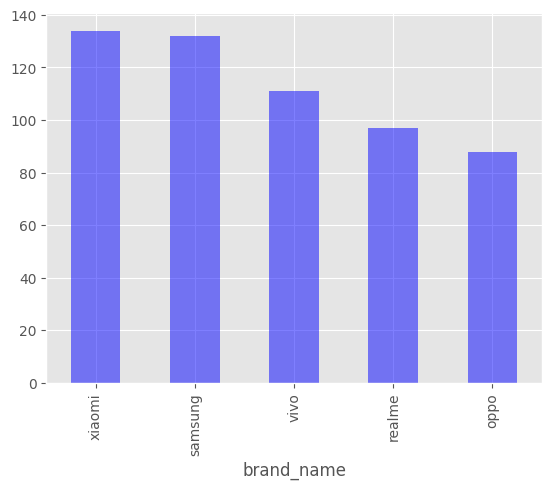

In [287]:
smartphone_df['brand_name'].value_counts().head().plot(kind = 'bar', color = 'blue', alpha = 0.5)

<Axes: ylabel='count'>

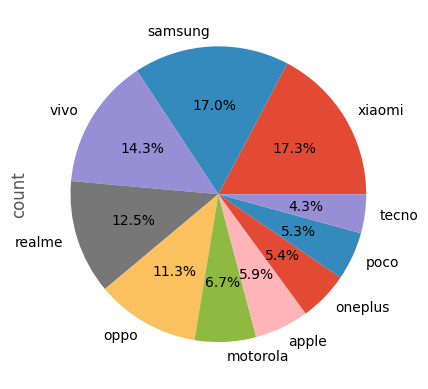

In [288]:
smartphone_df['brand_name'].value_counts().head(10).plot(kind = 'pie', autopct = '%0.1f%%')

In [289]:
smartphone_df['brand_name'].isnull().sum()

0

In [290]:
#model:
smartphone_df['model'].nunique()

980

###**price**

In [291]:
smartphone_df['price'].describe()

count       980.000000
mean      32520.504082
std       39531.812669
min        3499.000000
25%       12999.000000
50%       19994.500000
75%       35491.500000
max      650000.000000
Name: price, dtype: float64

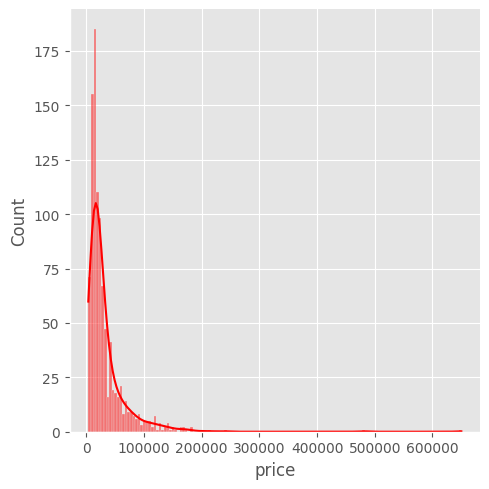

In [292]:
sns.displot(kind = 'hist', data = smartphone_df, x = 'price', kde = True, color = 'red', alpha = 0.5)

In [293]:
smartphone_df['price'].skew()

6.591790999665567

<Axes: xlabel='price'>

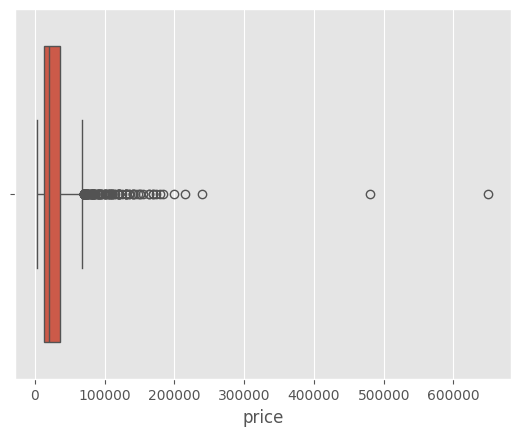

In [294]:
sns.boxplot(smartphone_df['price'], orient='h')

In [295]:
smartphone_df[smartphone_df['price'] > 200000]

brand_name                                   model   price  rating  \
427      vertu                   Vertu Signature Touch  650000    62.0   
478     huawei        Huawei Mate 50 RS Porsche Design  239999    81.0   
887     xiaomi  Xiaomi Redmi K20 Pro Signature Edition  480000    88.0   
951     huawei        Huawei Mate 30 RS Porsche Design  214990     NaN   

     has_5g  has_nfc  has_ir_blaster processor_brand  num_cores  \
427   False     True           False      snapdragon        8.0   
478   False     True            True      snapdragon        8.0   
887   False     True           False      snapdragon        8.0   
951    True     True            True           kirin        8.0   

     processor_speed  battery_capacity  fast_charging_available  \
427             1.50            2275.0                        0   
478             3.20            4700.0                        1   
887             2.80            4000.0                        1   
951             2.86            4500.0                        1   

     fast_charging  ram_capacity  internal_memory  screen_size  refresh_rate  \
427      46.126138           2.0             64.0         4.70            60   
478      66.000000          12.0            512.0         6.74           120   
887      27.000000           8.0            256.0         6.39            60   
951      46.126138          12.0            512.0         6.53            60   

       resolution  num_rear_cameras  num_front_cameras       os  \
427  1080 x 1920                  1                1.0  android   
478  1212 x 2616                  3                1.0    other   
887  1080 x 2340                  3                1.0  android   
951  1176 x 2400                  4                2.0  android   

     primary_camera_rear  primary_camera_front  extended_memory_available  \
427                 13.0                   2.1                          0   
478                 50.0                  13.0                          1   
887                 48.0                  20.0                          0   
951                 40.0                  32.0                          1   

     extended_upto  
427            NaN  
478          256.0  
887            NaN  
951          256.0

In [296]:
smartphone_df['price'].isnull().sum()

0

* The Price Column is not normally distributed, it is highly skewed
* It has some outliers

### **ratings**

In [297]:
smartphone_df['rating'].describe()

count    879.000000
mean      78.258248
std        7.402854
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

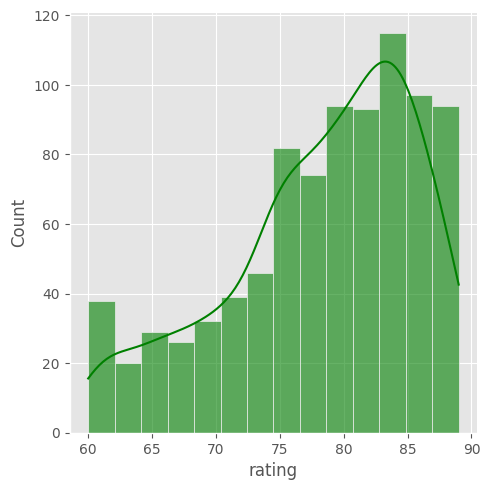

In [298]:
sns.displot(kind = 'hist', data = smartphone_df, x = 'rating', kde = True, color = 'green', alpha = 0.6)

In [299]:
smartphone_df['rating'].skew()

-0.6989993034105535

<Axes: xlabel='rating'>

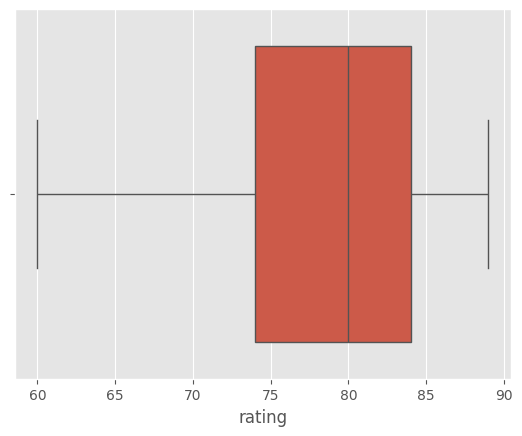

In [300]:
sns.boxplot(smartphone_df['rating'], orient = 'h')

In [301]:
smartphone_df['rating'].isnull().sum()

101

In [302]:
smartphone_df['rating'].isnull().sum()/len(smartphone_df['rating'])

0.10306122448979592

* rating column is close to normal distribution
* it has null values
* 10% of the data has missing values

In [303]:
smartphone_df.head()

brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro Plus  24999    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  \
0           False      snapdragon        8.0              3.2   
1           False      snapdragon        8.0              2.2   
2           False          exynos        8.0              2.4   
3           False      snapdragon        8.0              2.2   
4           False       dimensity        8.0              2.6   

   battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
0            5000.0                        1     100.000000          12.0   
1            5000.0                        1      33.000000           6.0   
2            5000.0                        1      15.000000           4.0   
3            5000.0                        1      46.126138           6.0   
4            5000.0                        1      67.000000           6.0   

   internal_memory  screen_size  refresh_rate    resolution  num_rear_cameras  \
0            256.0         6.70           120  1440 x 3216                  3   
1            128.0         6.59           120  1080 x 2412                  3   
2             64.0         6.60            90  1080 x 2408                  3   
3            128.0         6.55           120  1080 x 2400                  3   
4            128.0         6.70           120  1080 x 2412                  3   

   num_front_cameras       os  primary_camera_rear  primary_camera_front  \
0                1.0  android                 50.0                  16.0   
1                1.0  android                 64.0                  16.0   
2                1.0  android                 50.0                  13.0   
3                1.0  android                 50.0                  16.0   
4                1.0  android                108.0                  16.0   

   extended_memory_available  extended_upto  
0                          0            NaN  
1                          1         1024.0  
2                          1         1024.0  
3                          1         1024.0  
4                          0            NaN

<Axes: ylabel='count'>

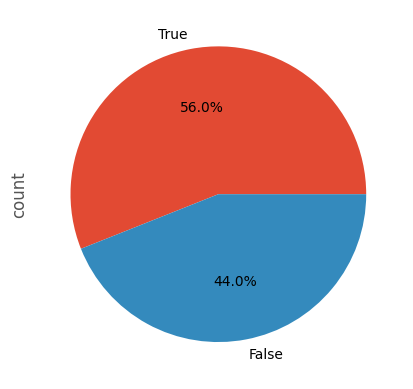

In [304]:
smartphone_df['has_5g'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

<Axes: ylabel='count'>

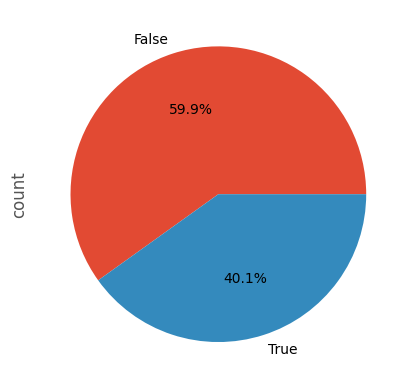

In [305]:
smartphone_df['has_nfc'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

<Axes: ylabel='count'>

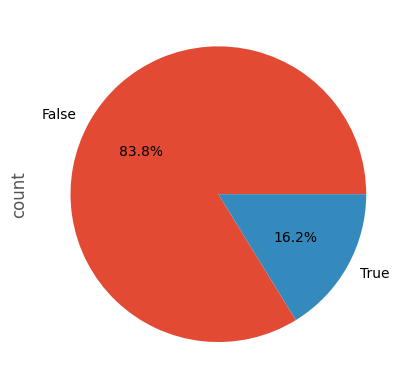

In [306]:
smartphone_df['has_ir_blaster'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [307]:
smartphone_df[smartphone_df['has_ir_blaster'] == True]['brand_name'].value_counts()

brand_name
xiaomi     109
poco        30
iqoo         6
huawei       6
vivo         4
redmi        2
honor        1
samsung      1
Name: count, dtype: int64

### **processor_brand**

<Axes: ylabel='count'>

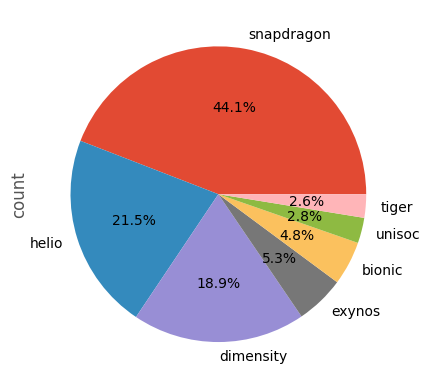

In [308]:
smartphone_df['processor_brand'].value_counts().head(7).plot(kind = 'pie', autopct = '%0.1f%%')

<Axes: xlabel='processor_brand'>

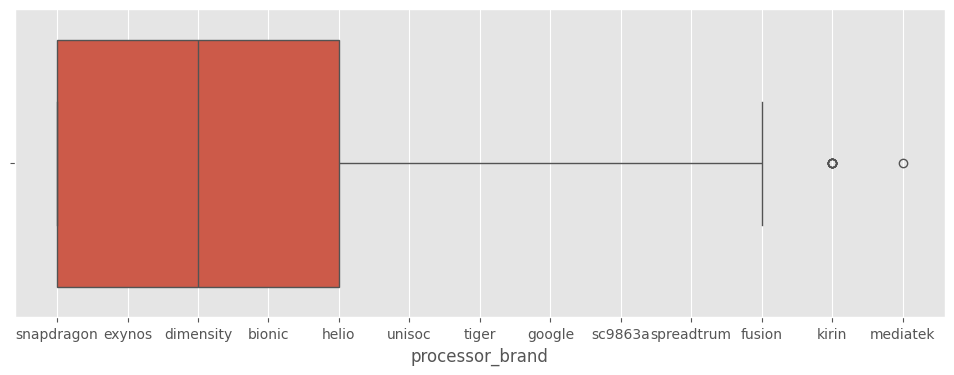

In [309]:
plt.figure(figsize = (12,4))
sns.boxplot(smartphone_df['processor_brand'], orient = 'h')

In [310]:
smartphone_df['processor_brand'].isnull().sum()

20

In [311]:
smartphone_df['processor_brand'].value_counts()

processor_brand
snapdragon    413
helio         201
dimensity     177
exynos         50
bionic         45
unisoc         26
tiger          24
google          9
kirin           7
spreadtrum      4
sc9863a         2
fusion          1
mediatek        1
Name: count, dtype: int64

### **Conclusions:**
* processor_brand column has outliers
* it also have 20 null values
* after value counts we come to know that mediatek and dimensity are the same processor brand and **sc9863a**, **spreadtrum**, **tiger** and **UNISOC** are the same brand
* fusion is not any kind of processor so we have to drop it
* Its google tensor processor


<Axes: ylabel='count'>

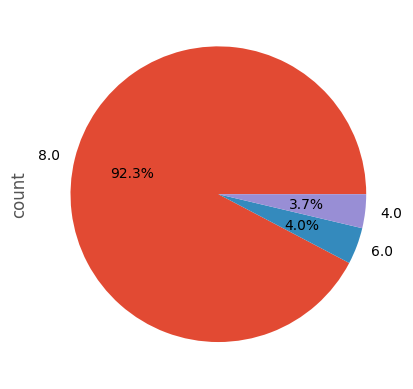

In [312]:
smartphone_df['num_cores'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [313]:
smartphone_df['num_cores'].isnull().sum()

6

In [314]:
smartphone_df[smartphone_df['num_cores'].isnull()]

brand_name                    model   price  rating  has_5g  has_nfc  \
152      apple  Apple iPhone 15 Pro Max  142990    79.0    True     True   
262      apple         Apple iPhone XR2   71999    60.0   False     True   
280      apple     Apple iPhone 14 Mini   69990    70.0   False     True   
425      nokia             Nokia X50 5G   34999    76.0    True    False   
444      apple      Apple iPhone 15 Pro  130990    75.0    True     True   
706      apple          Apple iPhone 15   82990    72.0   False     True   

     has_ir_blaster processor_brand  num_cores  processor_speed  \
152           False          bionic        NaN              NaN   
262           False          bionic        NaN              NaN   
280           False          bionic        NaN              NaN   
425           False      snapdragon        NaN              NaN   
444           False          bionic        NaN              NaN   
706           False          bionic        NaN              NaN   

     battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
152            4352.0                        1      25.000000           8.0   
262            3060.0                        1      46.126138           4.0   
280            3500.0                        1      46.126138           6.0   
425            6000.0                        1      33.000000           6.0   
444               NaN                        0      46.126138           8.0   
706            3285.0                        1      46.126138           6.0   

     internal_memory  screen_size  refresh_rate    resolution  \
152            256.0         6.68           120  1284 x 2778    
262             64.0         6.10            60   828 x 1792    
280            128.0         5.42            60  1080 x 2340    
425             64.0         6.81            60  1080 x 2400    
444            128.0         6.06           120  1170 x 2532    
706            128.0         6.06            60  1170 x 2532    

     num_rear_cameras  num_front_cameras       os  primary_camera_rear  \
152                 3                1.0      ios                 50.0   
262                 2                1.0      ios                 12.0   
280                 2                1.0      ios                 12.0   
425                 4                1.0  android                108.0   
444                 3                1.0      ios                 50.0   
706                 2                1.0      ios                 50.0   

     primary_camera_front  extended_memory_available  extended_upto  
152                  12.0                          0            NaN  
262                   7.0                          0            NaN  
280                  12.0                          0            NaN  
425                  32.0                          1            NaN  
444                  12.0                          0            NaN  
706                  13.0                          0            NaN

### **Conclusions**
* Most of the nan values are Apple Iphones so these are no dedicated null values we have to fill these values manually according to the features available  

In [315]:
smartphone_df['processor_speed'].value_counts()

processor_speed
2.00    146
2.20    135
2.40    128
3.20     94
2.30     86
3.00     53
2.84     36
2.05     28
2.50     23
1.80     23
1.60     20
2.85     19
3.22     18
3.10     15
2.60     14
2.90     13
1.30     10
1.82     10
2.73      9
2.80      9
3.05      8
2.36      8
1.40      5
2.65      5
2.70      5
1.50      4
2.96      3
2.86      3
3.13      2
2.35      1
2.37      1
1.99      1
1.95      1
2.10      1
1.20      1
Name: count, dtype: int64

<Axes: ylabel='count'>

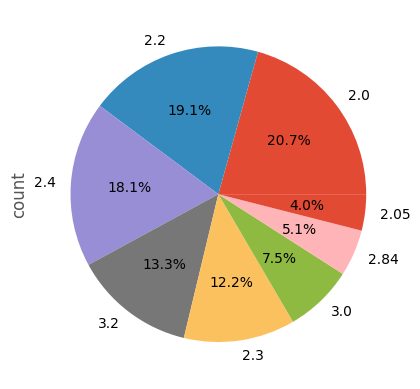

In [316]:
smartphone_df['processor_speed'].value_counts().head(8).plot(kind = 'pie', autopct = '%0.1f%%')

In [317]:
smartphone_df['processor_speed'].isnull().sum()

42

In [318]:
smartphone_df[smartphone_df['processor_speed'].isnull()]

brand_name                            model   price  rating  has_5g  \
27       apple          Apple iPhone 14 Pro Max  129990    76.0    True   
78     samsung            Samsung Galaxy A34 5G   24999    75.0    True   
100      apple              Apple iPhone 14 Pro  119990    75.0    True   
118      tesla                   Tesla Pi Phone   69999    83.0    True   
122     google                  Google Pixel 6A   29999    71.0    True   
129     google                  Google Pixel 7A   34990    69.0    True   
152      apple          Apple iPhone 15 Pro Max  142990    79.0    True   
206    samsung            Samsung Galaxy A54 5G   34999    76.0    True   
209      apple  Apple iPhone 14 Pro Max (256GB)  139990    77.0    True   
224       vivo                         Vivo Y02    8999     NaN   False   
241    samsung            Samsung Galaxy A75 5G   44999    83.0    True   
255    samsung         Samsung Galaxy S22 FE 5G   51999    79.0    True   
262      apple                 Apple iPhone XR2   71999    60.0   False   
280      apple             Apple iPhone 14 Mini   69990    70.0   False   
288      apple    Apple iPhone 14 Pro Max (1TB)  182999    78.0    True   
362    samsung         Samsung Galaxy S24 Ultra  119990    85.0    True   
380       letv                      Letv Y2 Pro    6999     NaN   False   
398      apple            Apple iPhone 15 Ultra  149900    79.0    True   
416      apple      Apple iPhone 14 Pro (256GB)  129990    76.0    True   
425      nokia                     Nokia X50 5G   34999    76.0    True   
444      apple              Apple iPhone 15 Pro  130990    75.0    True   
490    samsung               Samsung Galaxy A15   15990    63.0   False   
523    samsung               Samsung Galaxy F14   14990    67.0   False   
640    oneplus                   OnePlus Nord 5   34999    76.0    True   
668       vivo        Vivo Y02 (2GB RAM + 32GB)    7999     NaN   False   
706      apple                  Apple iPhone 15   82990    72.0   False   
735       vivo                     Vivo S17 Pro   49990    77.0    True   
739      apple  Apple iPhone 14 Pro Max (512GB)  169900    78.0    True   
740     google                   Google Pixel 8   53990    75.0    True   
789      apple        Apple iPhone 14 Pro (1TB)  172999    77.0    True   
799    samsung         Samsung Galaxy S23 FE 5G   54999    77.0    True   
800    samsung           Samsung Galaxy M51s 5G   24990    72.0    True   
802       poco                   Poco X6 Pro 5G   19999    72.0    True   
804    samsung               Samsung Galaxy M14   14999    60.0   False   
805       vivo                   Vivo T2 Pro 5G   29990    76.0    True   
844     huawei                  Huawei Nova Y61   21990    63.0   False   
845       iqoo                          iQOO Z9   19990    76.0    True   
892      apple             Apple iPhone 15 Plus   84990    75.0    True   
910    samsung               Samsung Galaxy M35   22999    74.0   False   
911    samsung               Samsung Galaxy A05   12990    63.0   False   
973     google               Google Pixel 8 Pro   70990    80.0    True   
979    samsung           Samsung Galaxy M52s 5G   24990    74.0    True   

     has_nfc  has_ir_blaster processor_brand  num_cores  processor_speed  \
27      True           False          bionic        6.0              NaN   
78      True           False          exynos        8.0              NaN   
100     True           False          bionic        6.0              NaN   
118     True           False             NaN        8.0              NaN   
122     True           False          google        8.0              NaN   
129     True           False          google        8.0              NaN   
152     True           False          bionic        NaN              NaN   
206     True           False          exynos        8.0              NaN   
209     True           False          bionic        6.0              NaN   
224    False      

<Axes: xlabel='processor_speed'>

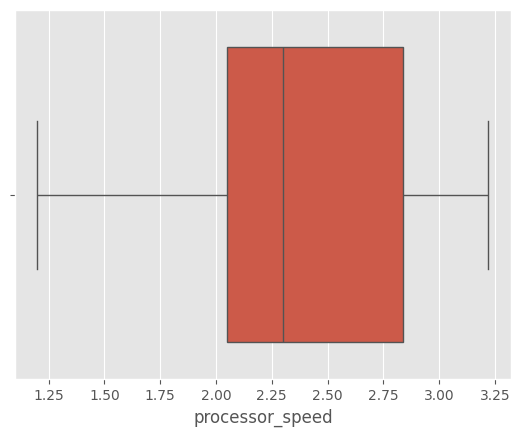

In [319]:
sns.boxplot(smartphone_df['processor_speed'], orient = 'h')

**Conclusion:**
* Processor_speed has no outliers
* It has some null values that has to be filled

<Axes: ylabel='count'>

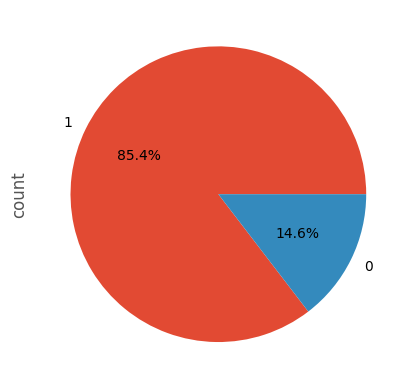

In [320]:
smartphone_df['fast_charging_available'].value_counts().plot(kind='pie',autopct="%0.1f%%")

In [321]:
smartphone_df['fast_charging'].value_counts()

fast_charging
46.126138     211
33.000000     152
18.000000     128
67.000000      65
25.000000      53
120.000000     46
15.000000      43
80.000000      42
66.000000      37
10.000000      33
30.000000      32
65.000000      30
44.000000      23
45.000000      17
20.000000      10
68.000000       8
100.000000      7
150.000000      7
125.000000      6
40.000000       5
22.000000       5
60.000000       4
55.000000       3
50.000000       2
210.000000      2
21.000000       2
180.000000      1
200.000000      1
240.000000      1
19.000000       1
135.000000      1
165.000000      1
27.000000       1
Name: count, dtype: int64

In [322]:
smartphone_df['fast_charging'].isnull().sum()

0

In [323]:
smartphone_df[smartphone_df['fast_charging'].isnull()]

Empty DataFrame
Columns: [brand_name, model, price, rating, has_5g, has_nfc, has_ir_blaster, processor_brand, num_cores, processor_speed, battery_capacity, fast_charging_available, fast_charging, ram_capacity, internal_memory, screen_size, refresh_rate, resolution, num_rear_cameras, num_front_cameras, os, primary_camera_rear, primary_camera_front, extended_memory_available, extended_upto]
Index: []

<Axes: xlabel='fast_charging'>

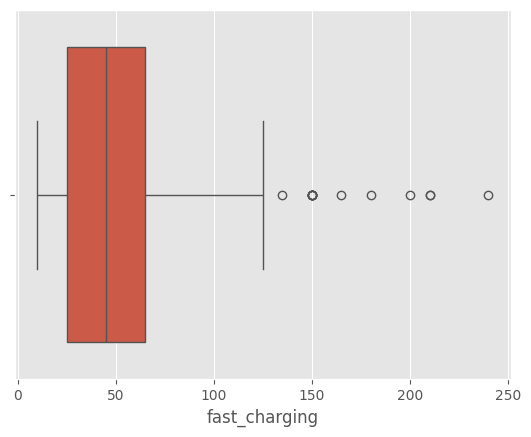

In [324]:
sns.boxplot(smartphone_df['fast_charging'], orient = 'h')

In [325]:
smartphone_df[smartphone_df['fast_charging'] > 150]

brand_name                                   model  price  rating  has_5g  \
38      xiaomi         Xiaomi Redmi Note 12 Pro Max 5G  32999    83.0    True   
180    infinix                      Infinix Zero Ultra  36999    89.0    True   
230       iqoo                          iQOO 11 Pro 5G  58990    89.0    True   
397     realme                         Realme GT Neo 5  34999    83.0    True   
511     xiaomi  Xiaomi Redmi Note 12 Discovery Edition  26990    86.0    True   
559      nubia              Nubia Red Magic 8 Pro Plus  60999    86.0    True   

     has_nfc  has_ir_blaster processor_brand  num_cores  processor_speed  \
38     False            True      snapdragon        8.0             2.36   
180    False           False       dimensity        8.0             2.50   
230     True            True      snapdragon        8.0             3.20   
397     True           False      snapdragon        8.0             3.20   
511     True            True       dimensity        8.0             2.60   
559     True           False      snapdragon        8.0             3.20   

     battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
38             5200.0                        1          210.0           6.0   
180            4500.0                        1          180.0           8.0   
230            4700.0                        1          200.0           8.0   
397            4600.0                        1          240.0           8.0   
511            4300.0                        1          210.0           8.0   
559            5000.0                        1          165.0          12.0   

     internal_memory  screen_size  refresh_rate    resolution  \
38             128.0         6.67           120  1080 x 2460    
180            256.0         6.80           120  1080 x 2400    
230            256.0         6.78           144  1440 x 3200    
397            128.0         6.70           120  1080 x 2412    
511            256.0         6.67           120  1080 x 2400    
559            256.0         6.80           120  1116 x 2480    

     num_rear_cameras  num_front_cameras       os  primary_camera_rear  \
38                  4                1.0  android                108.0   
180                 3                1.0  android                200.0   
230                 3                1.0  android                 50.0   
397                 3                1.0  android                 50.0   
511                 3                1.0  android                200.0   
559                 3                1.0  android                 50.0   

     primary_camera_front  extended_memory_available  extended_upto  
38                   32.0                          1          512.0  
180                  32.0                          1            NaN  
230                  16.0                          0            NaN  
397                  16.0                          0            NaN  
511                  16.0                          0            NaN  
559                  16.0                          0            NaN

**Conclusion**
* There are many missing values in the column
* Also there are outliers

<Axes: ylabel='count'>

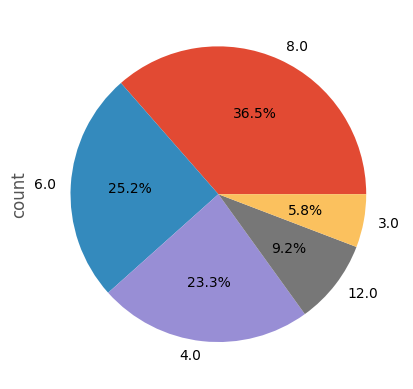

In [326]:
smartphone_df['ram_capacity'].value_counts().head(5).plot(kind='pie',autopct="%0.1f%%")

In [327]:
smartphone_df['ram_capacity'].isnull().sum()

0

In [328]:
smartphone_df['ram_capacity'].value_counts()

ram_capacity
8.0     339
6.0     234
4.0     217
12.0     86
3.0      54
2.0      32
16.0      9
1.0       7
18.0      2
Name: count, dtype: int64

<Axes: xlabel='ram_capacity'>

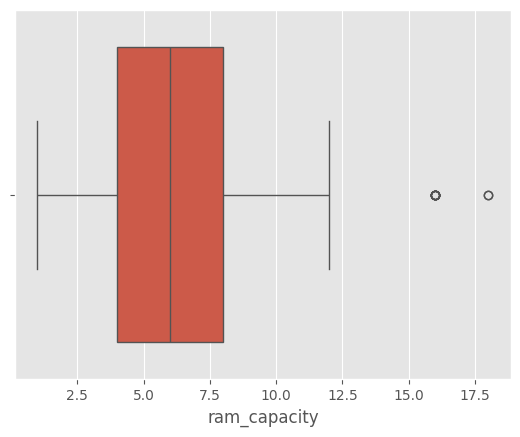

In [329]:
sns.boxplot(smartphone_df['ram_capacity'], orient = 'h')

These are not outliers

<Axes: ylabel='count'>

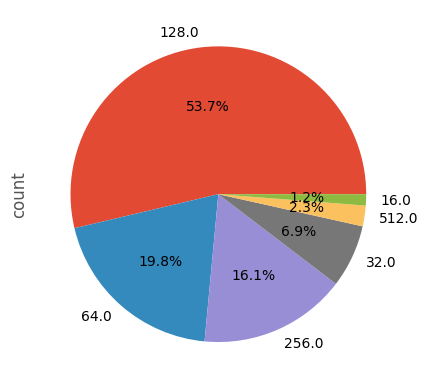

In [330]:
smartphone_df['internal_memory'].value_counts().head(6).plot(kind='pie',autopct="%0.1f%%")

In [331]:
smartphone_df['internal_memory'].value_counts()

internal_memory
128.0     523
64.0      193
256.0     157
32.0       67
512.0      22
16.0       12
1024.0      5
8.0         1
Name: count, dtype: int64

In [332]:
smartphone_df['internal_memory'].isnull().sum()

0

In [333]:
smartphone_df.head(3)

brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  \
0           False      snapdragon        8.0              3.2   
1           False      snapdragon        8.0              2.2   
2           False          exynos        8.0              2.4   

   battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
0            5000.0                        1          100.0          12.0   
1            5000.0                        1           33.0           6.0   
2            5000.0                        1           15.0           4.0   

   internal_memory  screen_size  refresh_rate    resolution  num_rear_cameras  \
0            256.0         6.70           120  1440 x 3216                  3   
1            128.0         6.59           120  1080 x 2412                  3   
2             64.0         6.60            90  1080 x 2408                  3   

   num_front_cameras       os  primary_camera_rear  primary_camera_front  \
0                1.0  android                 50.0                  16.0   
1                1.0  android                 64.0                  16.0   
2                1.0  android                 50.0                  13.0   

   extended_memory_available  extended_upto  
0                          0            NaN  
1                          1         1024.0  
2                          1         1024.0

<Axes: ylabel='count'>

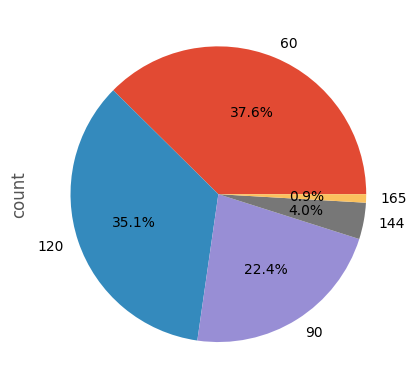

In [334]:
smartphone_df['refresh_rate'].value_counts().head(5).plot(kind='pie',autopct="%0.1f%%")

In [335]:
smartphone_df['refresh_rate'].value_counts()

refresh_rate
60     368
120    344
90     219
144     39
165      9
240      1
Name: count, dtype: int64

<Axes: xlabel='refresh_rate'>

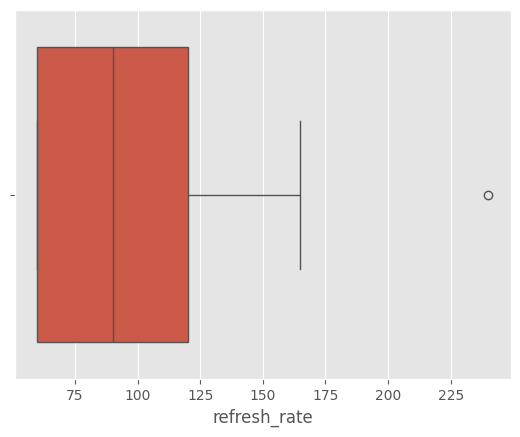

In [336]:
sns.boxplot(smartphone_df['refresh_rate'], orient = 'h')

In [337]:
smartphone_df['refresh_rate'].isnull().sum()

0

In [338]:
smartphone_df[smartphone_df['refresh_rate'] > 225]

brand_name          model   price  rating  has_5g  has_nfc  \
784      leitz  Leitz Phone 2  124990    89.0    True     True   

     has_ir_blaster processor_brand  num_cores  processor_speed  \
784           False      snapdragon        8.0              3.0   

     battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
784            5000.0                        1      46.126138          12.0   

     internal_memory  screen_size  refresh_rate    resolution  \
784            256.0          6.6           240  1260 x 2730    

     num_rear_cameras  num_front_cameras       os  primary_camera_rear  \
784                 2                1.0  android                 47.2   

     primary_camera_front  extended_memory_available  extended_upto  
784                  12.6                          1         1024.0

<Axes: ylabel='count'>

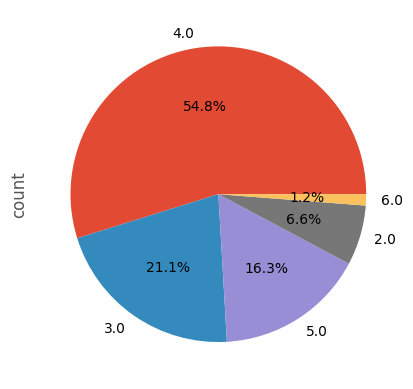

In [339]:
(smartphone_df['num_rear_cameras'] + smartphone_df['num_front_cameras']).value_counts().plot(kind='pie',autopct="%0.1f%%")

In [340]:
smartphone_df['num_rear_cameras'].isnull().sum()

0

In [341]:
smartphone_df['num_front_cameras'].isnull().sum()

4

In [342]:
smartphone_df[smartphone_df['num_front_cameras'].isnull()]

brand_name                model   price  rating  has_5g  has_nfc  \
69        oppo     Oppo Find N Fold   99990     NaN    True     True   
458     xiaomi  Xiaomi Mi Mix Alpha  199990     NaN    True    False   
954     huawei        Huawei Mate X  169000     NaN    True     True   
972       itel            itel A23s    4787     NaN   False    False   

     has_ir_blaster processor_brand  num_cores  processor_speed  \
69            False      snapdragon        8.0             3.20   
458           False      snapdragon        8.0             2.96   
954            True           kirin        8.0             2.86   
972           False      spreadtrum        4.0             1.40   

     battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
69             5000.0                        1      67.000000           8.0   
458            4050.0                        1      40.000000          12.0   
954            4500.0                        1      55.000000           8.0   
972            3020.0                        0      46.126138           2.0   

     internal_memory  screen_size  refresh_rate    resolution  \
69             256.0         7.10           120  1792 x 1920    
458            512.0         7.92            60  2088 x 2250    
954            512.0         8.00            60  2200 x 2480    
972             32.0         5.00            60    854 x 480    

     num_rear_cameras  num_front_cameras       os  primary_camera_rear  \
69                  2                NaN    other                 50.0   
458                 3                NaN  android                108.0   
954                 4                NaN  android                 48.0   
972                 1                NaN  android                  2.0   

     primary_camera_front  extended_memory_available  extended_upto  
69                    NaN                          0            NaN  
458                   NaN                          0            NaN  
954                   NaN                          0            NaN  
972                   NaN                          0            NaN

<Axes: ylabel='num_rear_cameras'>

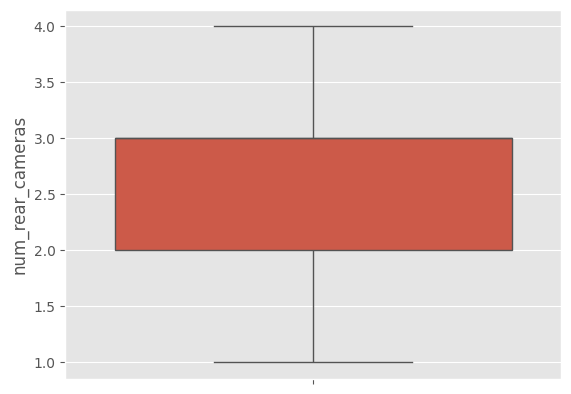

In [343]:
sns.boxplot(smartphone_df['num_rear_cameras'])

### **Conclusions**
* there are 4 missing values in num_front_cameras

<Axes: ylabel='count'>

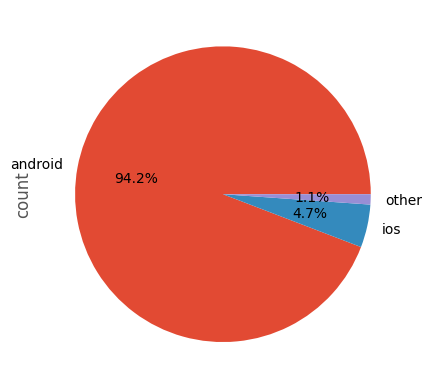

In [344]:
smartphone_df['os'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [345]:
smartphone_df['os'].value_counts()

os
android    923
ios         46
other       11
Name: count, dtype: int64

In [346]:
smartphone_df['os'].isnull().sum()

0

In [347]:
smartphone_df[smartphone_df['os'].isnull()]

Empty DataFrame
Columns: [brand_name, model, price, rating, has_5g, has_nfc, has_ir_blaster, processor_brand, num_cores, processor_speed, battery_capacity, fast_charging_available, fast_charging, ram_capacity, internal_memory, screen_size, refresh_rate, resolution, num_rear_cameras, num_front_cameras, os, primary_camera_rear, primary_camera_front, extended_memory_available, extended_upto]
Index: []

<Axes: ylabel='os'>

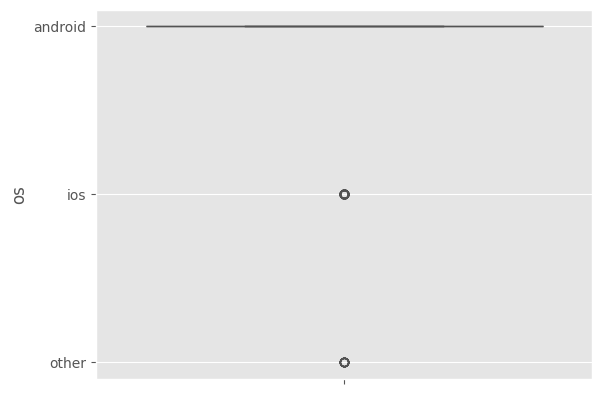

In [348]:
sns.boxplot(smartphone_df['os'])

* There are 14 missing values in os columns

In [349]:
smartphone_df['primary_camera_rear'].value_counts()

primary_camera_rear
50.0     333
64.0     181
13.0     116
48.0     114
108.0     80
12.0      57
8.0       39
200.0     18
16.0      17
5.0        6
12.2       4
54.0       3
50.3       3
20.0       3
2.0        2
24.0       2
47.2       1
40.0       1
Name: count, dtype: int64

In [350]:
smartphone_df['primary_camera_rear'].isnull().sum()

0

In [351]:
smartphone_df['primary_camera_front'].value_counts()

primary_camera_front
16.0    307
8.0     178
32.0    155
5.0     119
12.0     50
13.0     41
20.0     37
10.0     24
50.0     12
60.0     10
44.0      8
40.0      6
2.0       5
7.0       5
24.0      3
25.0      3
10.8      3
48.0      2
11.1      2
0.3       1
2.1       1
10.7      1
10.1      1
12.6      1
Name: count, dtype: int64

In [352]:
smartphone_df['primary_camera_front'].isnull().sum()

5

In [353]:
smartphone_df[smartphone_df['primary_camera_front'].isnull()]

brand_name                model   price  rating  has_5g  has_nfc  \
69        oppo     Oppo Find N Fold   99990     NaN    True     True   
458     xiaomi  Xiaomi Mi Mix Alpha  199990     NaN    True    False   
599    oukitel         Oukitel WP21   22990    82.0   False    False   
954     huawei        Huawei Mate X  169000     NaN    True     True   
972       itel            itel A23s    4787     NaN   False    False   

     has_ir_blaster processor_brand  num_cores  processor_speed  \
69            False      snapdragon        8.0             3.20   
458           False      snapdragon        8.0             2.96   
599           False           helio        8.0             2.20   
954            True           kirin        8.0             2.86   
972           False      spreadtrum        4.0             1.40   

     battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
69             5000.0                        1      67.000000           8.0   
458            4050.0                        1      40.000000          12.0   
599            9800.0                        1      66.000000          12.0   
954            4500.0                        1      55.000000           8.0   
972            3020.0                        0      46.126138           2.0   

     internal_memory  screen_size  refresh_rate    resolution  \
69             256.0         7.10           120  1792 x 1920    
458            512.0         7.92            60  2088 x 2250    
599            256.0         6.78           120  1080 x 2400    
954            512.0         8.00            60  2200 x 2480    
972             32.0         5.00            60    854 x 480    

     num_rear_cameras  num_front_cameras       os  primary_camera_rear  \
69                  2                NaN    other                 50.0   
458                 3                NaN  android                108.0   
599                 3                1.0  android                 64.0   
954                 4                NaN  android                 48.0   
972                 1                NaN  android                  2.0   

     primary_camera_front  extended_memory_available  extended_upto  
69                    NaN                          0            NaN  
458                   NaN                          0            NaN  
599                   NaN                          0            NaN  
954                   NaN                          0            NaN  
972                   NaN                          0            NaN

**Conclusions:**
* primary_camera_front contains missing values

<Axes: ylabel='count'>

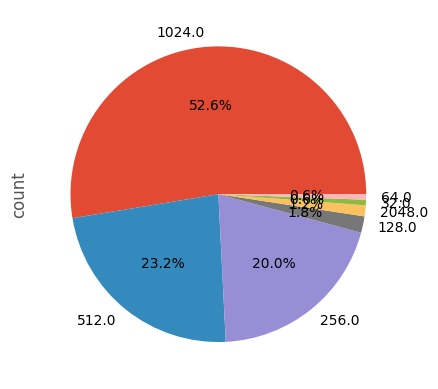

In [354]:
smartphone_df['extended_upto'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [355]:
smartphone_df['extended_upto'].isnull().sum()

480

In [356]:
smartphone_df['extended_upto'].isnull().sum()/(len(smartphone_df['extended_upto']))*100

48.97959183673469

**Conclusions:**
* extended_upto column has more than 48% of missing data
* this seems to be a MCAR(Misiing Completely at Random) condition, but we will see it further

In [357]:
smartphone_df.head()

brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro Plus  24999    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  \
0           False      snapdragon        8.0              3.2   
1           False      snapdragon        8.0              2.2   
2           False          exynos        8.0              2.4   
3           False      snapdragon        8.0              2.2   
4           False       dimensity        8.0              2.6   

   battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
0            5000.0                        1     100.000000          12.0   
1            5000.0                        1      33.000000           6.0   
2            5000.0                        1      15.000000           4.0   
3            5000.0                        1      46.126138           6.0   
4            5000.0                        1      67.000000           6.0   

   internal_memory  screen_size  refresh_rate    resolution  num_rear_cameras  \
0            256.0         6.70           120  1440 x 3216                  3   
1            128.0         6.59           120  1080 x 2412                  3   
2             64.0         6.60            90  1080 x 2408                  3   
3            128.0         6.55           120  1080 x 2400                  3   
4            128.0         6.70           120  1080 x 2412                  3   

   num_front_cameras       os  primary_camera_rear  primary_camera_front  \
0                1.0  android                 50.0                  16.0   
1                1.0  android                 64.0                  16.0   
2                1.0  android                 50.0                  13.0   
3                1.0  android                 50.0                  16.0   
4                1.0  android                108.0                  16.0   

   extended_memory_available  extended_upto  
0                          0            NaN  
1                          1         1024.0  
2                          1         1024.0  
3                          1         1024.0  
4                          0            NaN

Multivariant Analysis

<ipython-input-358-b708b8c02b0b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = smartphone_df, x = 'brand_name', y = 'price', palette = 'viridis', errorbar = ('ci', 95))


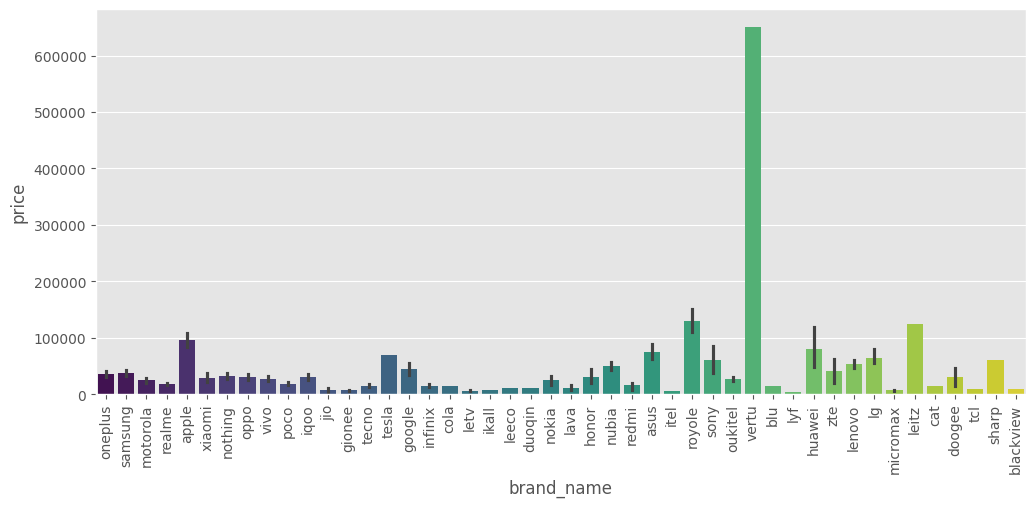

In [358]:
plt.figure(figsize = (12,5))
sns.barplot(data = smartphone_df, x = 'brand_name', y = 'price', palette = 'viridis', errorbar = ('ci', 95))
plt.xticks(rotation = 'vertical')
plt.show()

In [359]:
x = smartphone_df.groupby('brand_name').count()['model']

In [360]:
x[x > 10].index

Index(['apple', 'google', 'honor', 'huawei', 'infinix', 'iqoo', 'motorola',
       'nokia', 'oneplus', 'oppo', 'poco', 'realme', 'samsung', 'tecno',
       'vivo', 'xiaomi'],
      dtype='object', name='brand_name')

In [361]:
temp_df = smartphone_df[smartphone_df['brand_name'].isin(x[x > 10].index)]

<ipython-input-362-253b0ab76518>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = temp_df, x = 'brand_name', y = 'price', palette = 'inferno')


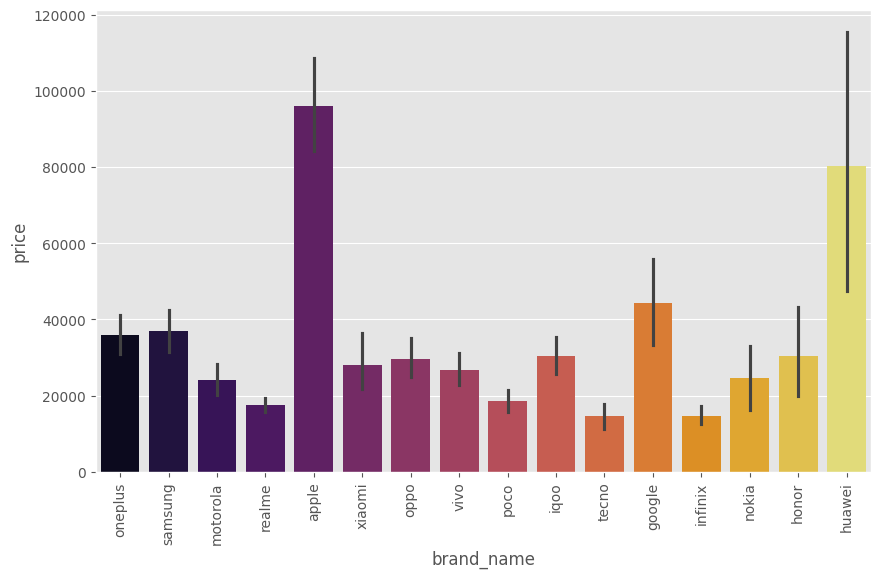

In [362]:
plt.figure(figsize=(10,6))
sns.barplot(data = temp_df, x = 'brand_name', y = 'price', palette = 'inferno')
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='rating', ylabel='price'>

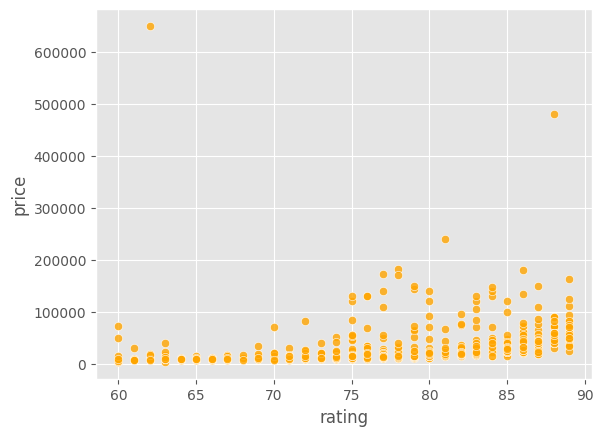

In [363]:
sns.scatterplot(data = smartphone_df, x = 'rating', y = 'price', color = 'orange', alpha = 0.8)

<Axes: xlabel='has_5g', ylabel='price'>

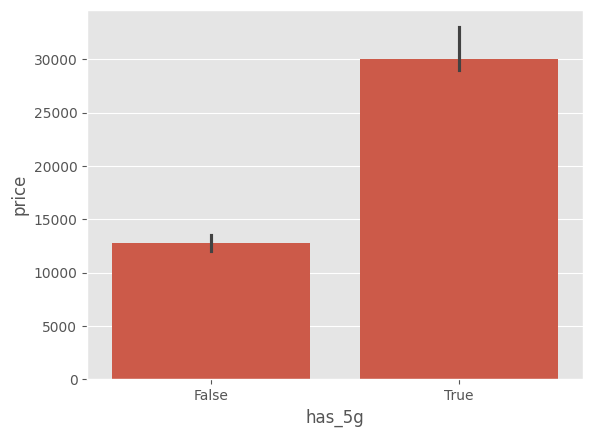

In [364]:
sns.barplot(data = smartphone_df, x = 'has_5g', y = 'price', estimator = np.median)

<ipython-input-365-1099cc833f54>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = smartphone_df, x = 'processor_brand', y = 'price', estimator = np.median, palette = 'mako')


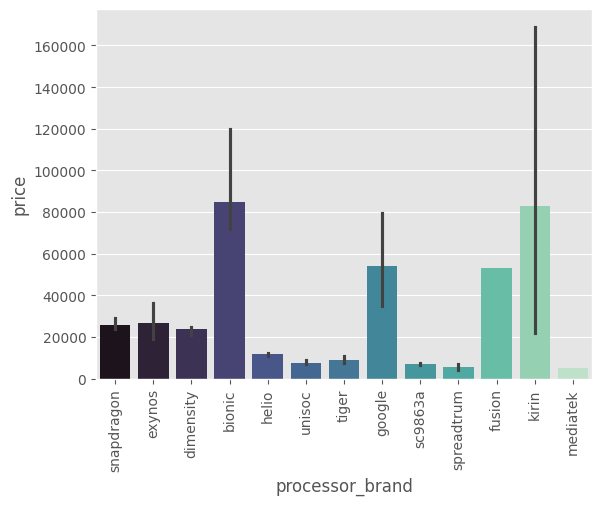

In [365]:
sns.barplot(data = smartphone_df, x = 'processor_brand', y = 'price', estimator = np.median, palette = 'mako')
plt.xticks(rotation='vertical')
plt.show()

In [366]:
numerical_col = smartphone_df.select_dtypes(include = [int, float, bool])
numerical_col.corr()

price    rating    has_5g   has_nfc  \
price                      1.000000  0.283504  0.305066  0.470951   
rating                     0.283504  1.000000  0.596087  0.474754   
has_5g                     0.305066  0.596087  1.000000  0.481702   
has_nfc                    0.470951  0.474754  0.481702  1.000000   
has_ir_blaster            -0.015807  0.156421  0.105542 -0.032541   
num_cores                 -0.048561  0.199741  0.139607  0.026165   
processor_speed            0.474049  0.628446  0.609583  0.609664   
battery_capacity          -0.159232 -0.015581 -0.013237 -0.106104   
fast_charging_available    0.116739  0.542814  0.355858  0.237947   
fast_charging              0.194558  0.388569  0.379510  0.342299   
ram_capacity               0.386002  0.757613  0.533957  0.458336   
internal_memory            0.557168  0.481070  0.403837  0.413071   
screen_size                0.113253  0.298272  0.230598  0.103099   
refresh_rate               0.244115  0.610795  0.611794  0.410777   
num_rear_cameras           0.125330  0.515531  0.206512  0.166299   
num_front_cameras          0.115228  0.131480  0.058059  0.066278   
primary_camera_rear        0.092095  0.562046  0.347918  0.131004   
primary_camera_front       0.162995  0.577861  0.358769  0.285427   
extended_memory_available -0.448628 -0.415265 -0.507752 -0.564380   
extended_upto              0.091945  0.346761  0.392268  0.187599   

                           has_ir_blaster  num_cores  processor_speed  \
price                           -0.015807  -0.048561         0.474049   
rating                           0.156421   0.199741         0.628446   
has_5g                           0.105542   0.139607         0.609583   
has_nfc                         -0.032541   0.026165         0.609664   
has_ir_blaster                   1.000000   0.120363         0.102744   
num_cores                        0.120363   1.000000         0.192863   
processor_speed                  0.102744   0.192863         1.000000   
battery_capacity                 0.059852   0.241289        -0.041930   
fast_charging_available          0.174060   0.360476         0.345856   
fast_charging                    0.181266   0.051490         0.506942   
ram_capacity                     0.059460   0.303911         0.627234   
internal_memory                  0.030789   0.043934         0.525510   
screen_size                      0.140809   0.385652         0.290366   
refresh_rate                     0.178378   0.233010         0.555004   
num_rear_cameras                 0.198043   0.343150         0.255476   
num_front_cameras               -0.011380   0.047578         0.124191   
primary_camera_rear              0.243608   0.312394         0.281204   
primary_camera_front             0.010399   0.221483         0.398207   
extended_memory_available       -0.041676   0.072934        -0.663085   
extended_upto                   -0.060974   0.198742         0.259733   

                           battery_capacity  fast_charging_available  \
price                             -0.159232             1.167393e-01   
rating                            -0.015581             5.428145e-01   
has_5g                            -0.013237             3.558582e-01   
has_nfc                           -0.106104             2.379467e-01   
has_ir_blaster                     0.059852             1.740597e-01   
num_cores                          0.241289             3.604764e-01   
processor_speed                   -0.041930             3.458556e-01   
battery_capacity                   1.000000             1.289927e-01   
fast_charging_available            0.128993             1.000000e+00   
fast_charging                     -0.068653            -5.203112e-17   
ram_capacity                       0.085690             4.395383e-01   
internal_memory                   -0.001444             2.798769e-01   
screen_size                        0.348805             3.466866e-01   
refresh_rate                       0.0

  * A correlation coefficient close to 1 indicates a strong positive correlation.
  * A correlation coefficient close to -1 indicates a strong negative correlation.
  * A correlation coefficient around 0 indicates little to no correlation.

From the senario as the **price** column is our targeted column, we get to know that the correlation of the **price** column with other columns.
* **processor_speed** and **internal_memory** is highly corelated with the **price** column

---

<Axes: >

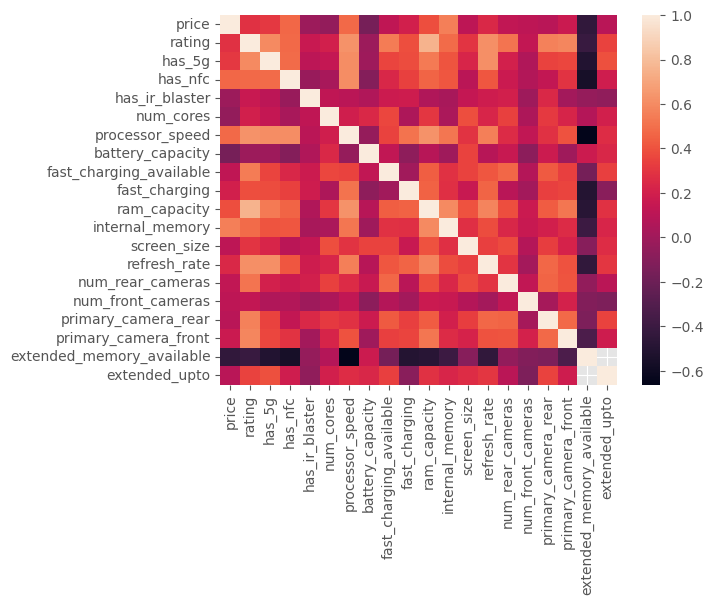

In [367]:
sns.heatmap(numerical_col.corr())

In [368]:
numerical_col.corr()['price']

price                        1.000000
rating                       0.283504
has_5g                       0.305066
has_nfc                      0.470951
has_ir_blaster              -0.015807
num_cores                   -0.048561
processor_speed              0.474049
battery_capacity            -0.159232
fast_charging_available      0.116739
fast_charging                0.194558
ram_capacity                 0.386002
internal_memory              0.557168
screen_size                  0.113253
refresh_rate                 0.244115
num_rear_cameras             0.125330
num_front_cameras            0.115228
primary_camera_rear          0.092095
primary_camera_front         0.162995
extended_memory_available   -0.448628
extended_upto                0.091945
Name: price, dtype: float64

* The diagonal of the correlation matrix will always be 1 since a variable is always perfectly correlated with itself.
* Off-diagonal elements will tell you how much one variable is correlated with another. A value close to 1 means a strong positive correlation, close to -1 means a strong negative correlation, and close to 0 means no significant correlation.
---
* Correlation does not imply causation, so even if two variables are correlated, it doesn’t mean one causes the other.

---
**Till now we have analysed the data and taken out insights of the data by using Exploratory data analysis(EDA), although EDA and analysing the data is the iterative process**

**Till we have the basic knowledge and insights of the data and alsowe know the behaviour and the pattern of the data**


In [369]:
numerical_col.cov()

price        rating       has_5g  \
price                      1.562764e+09  78360.920298  5989.081981   
rating                     7.836092e+04     54.802253     2.193005   
has_5g                     5.989082e+03      2.193005     0.246627   
has_nfc                    9.129206e+03      1.707844     0.117303   
has_ir_blaster            -2.305017e+02      0.430016     0.019334   
num_cores                 -1.596871e+03      0.861177     0.058014   
processor_speed            8.407412e+03      1.979203     0.140719   
battery_capacity          -6.322554e+06   -117.380923    -6.644141   
fast_charging_available    1.630009e+03      1.319921     0.062420   
fast_charging              2.335069e+05     86.565001     5.721985   
ram_capacity               4.187742e+04     13.856771     0.727730   
internal_memory            2.359728e+06    339.228063    21.486039   
screen_size                1.563225e+03      0.528461     0.039986   
refresh_rate               2.797433e+05    129.349445     8.807343   
num_rear_cameras           3.846894e+03      2.757617     0.079629   
num_front_cameras          7.621060e+02      0.148721     0.004899   
primary_camera_rear        1.201467e+05    121.343238     5.701953   
primary_camera_front       6.905500e+04     43.781270     1.938025   
extended_memory_available -8.564016e+03     -1.467494    -0.121763   
extended_upto              6.573146e+05    891.540230    68.530918   

                               has_nfc  has_ir_blaster    num_cores  \
price                      9129.206227     -230.501684 -1596.870936   
rating                        1.707844        0.430016     0.861177   
has_5g                        0.117303        0.019334     0.058014   
has_nfc                       0.240448       -0.005886     0.010725   
has_ir_blaster               -0.005886        0.136060     0.037246   
num_cores                     0.010725        0.037246     0.700309   
processor_speed               0.138021        0.017900     0.074820   
battery_capacity            -52.372738       22.389501   199.697429   
fast_charging_available       0.041211        0.022677     0.106510   
fast_charging                 5.095893        2.029951     1.311766   
ram_capacity                  0.616792        0.060192     0.699564   
internal_memory              21.700269        1.216710     3.946540   
screen_size                   0.017652        0.018135     0.112085   
refresh_rate                  5.838962        1.907330     5.650175   
num_rear_cameras              0.063315        0.056720     0.222994   
num_front_cameras             0.005520       -0.000712     0.006726   
primary_camera_rear           2.119939        2.965407     8.628387   
primary_camera_front          1.522331        0.041702     2.002299   
extended_memory_available    -0.133637       -0.007423     0.029425   
extended_upto                25.000016       -8.411703    57.212665   

                           processor_speed  battery_capacity  \
price                          8407.412072     -6.322554e+06   
rating                            1.979203     -1.173809e+02   
has_5g                            0.140719     -6.644141e+00   
has_nfc                           0.138021     -5.237274e+01   
has_ir_blaster                    0.017900      2.238950e+01   
num_cores                         0.074820      1.996974e+02   
processor_speed                   0.215379     -1.968891e+01   
battery_capacity                -19.688907      1.019171e+06   
fast_charging_available           0.057226      4.469294e+01   
fast_charging                     7.203445     -2.116112e+03   
ram_capacity                      0.800747      2.378520e+02   
internal_memory                  24.215429     -1.556693e+02   
screen_size                       0.047399      1.190592e+02   
refresh_rate                      7.439000      2.590668e+03   
num_rear_cameras                  0.092391      1.213891e+02   
num_front_cameras                 0.009971     

### **Handling the missing values and outliers:**

**price**

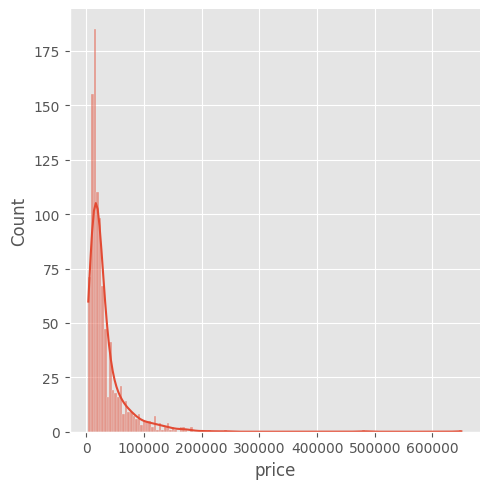

In [370]:
sns.displot(kind = 'hist', data = smartphone_df, x = 'price', kde = True)

<Axes: xlabel='price'>

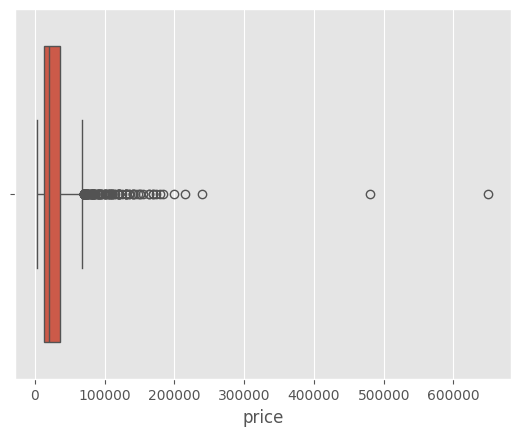

In [371]:
sns.boxplot(smartphone_df['price'], orient = 'h')

In [372]:
smartphone_df.shape

(980, 25)

In [373]:
smartphone_df[smartphone_df['price'] > 200000]

brand_name                                   model   price  rating  \
427      vertu                   Vertu Signature Touch  650000    62.0   
478     huawei        Huawei Mate 50 RS Porsche Design  239999    81.0   
887     xiaomi  Xiaomi Redmi K20 Pro Signature Edition  480000    88.0   
951     huawei        Huawei Mate 30 RS Porsche Design  214990     NaN   

     has_5g  has_nfc  has_ir_blaster processor_brand  num_cores  \
427   False     True           False      snapdragon        8.0   
478   False     True            True      snapdragon        8.0   
887   False     True           False      snapdragon        8.0   
951    True     True            True           kirin        8.0   

     processor_speed  battery_capacity  fast_charging_available  \
427             1.50            2275.0                        0   
478             3.20            4700.0                        1   
887             2.80            4000.0                        1   
951             2.86            4500.0                        1   

     fast_charging  ram_capacity  internal_memory  screen_size  refresh_rate  \
427      46.126138           2.0             64.0         4.70            60   
478      66.000000          12.0            512.0         6.74           120   
887      27.000000           8.0            256.0         6.39            60   
951      46.126138          12.0            512.0         6.53            60   

       resolution  num_rear_cameras  num_front_cameras       os  \
427  1080 x 1920                  1                1.0  android   
478  1212 x 2616                  3                1.0    other   
887  1080 x 2340                  3                1.0  android   
951  1176 x 2400                  4                2.0  android   

     primary_camera_rear  primary_camera_front  extended_memory_available  \
427                 13.0                   2.1                          0   
478                 50.0                  13.0                          1   
887                 48.0                  20.0                          0   
951                 40.0                  32.0                          1   

     extended_upto  
427            NaN  
478          256.0  
887            NaN  
951          256.0

* we have 4 rows where the price of the smartohone is extremly high


* After observing the outliers manually, I have noticed that the price the above 4 phones a geniune
* The phones are offering some special features for their specific area of customers, like offering (original gold plate back covers, special leather back cases, premium materials such as titanium, sapphire crystal, and expensive leather, which are meticulously handcrafted by skilled artisans.)
* Although the configuration of these phones are normal as other phones
* Hence these data is not useful for our analysis, therefore these are the outliers which have to be remove

In [374]:
smartphone_df[smartphone_df['price'] > 200000].shape

(4, 25)

In [375]:
smartphone_df = smartphone_df[smartphone_df['price'] < 200000]

In [376]:
smartphone_df.shape

(976, 25)

<Axes: xlabel='price'>

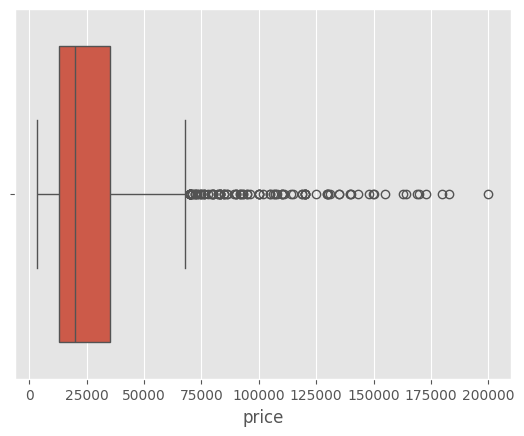

In [377]:
sns.boxplot(smartphone_df['price'], orient = 'h')

In [378]:
smartphone_df[smartphone_df['price'] > 175000]

brand_name                          model   price  rating  has_5g  \
288      apple  Apple iPhone 14 Pro Max (1TB)  182999    78.0    True   
458     xiaomi            Xiaomi Mi Mix Alpha  199990     NaN    True   
756      apple  Apple iPhone 13 Pro Max (1TB)  179900    86.0    True   

     has_nfc  has_ir_blaster processor_brand  num_cores  processor_speed  \
288     True           False          bionic        6.0              NaN   
458    False           False      snapdragon        8.0             2.96   
756     True           False          bionic        6.0             3.22   

     battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
288            4323.0                        1      46.126138           6.0   
458            4050.0                        1      40.000000          12.0   
756            4352.0                        1      46.126138           6.0   

     internal_memory  screen_size  refresh_rate    resolution  \
288           1024.0         6.70           120  1290 x 2796    
458            512.0         7.92            60  2088 x 2250    
756           1024.0         6.70           120  1284 x 2778    

     num_rear_cameras  num_front_cameras       os  primary_camera_rear  \
288                 3                1.0      ios                 48.0   
458                 3                NaN  android                108.0   
756                 3                1.0      ios                 12.0   

     primary_camera_front  extended_memory_available  extended_upto  
288                  12.0                          0            NaN  
458                   NaN                          0            NaN  
756                  12.0                          0            NaN

* These are not outliers, these are actual smartphones

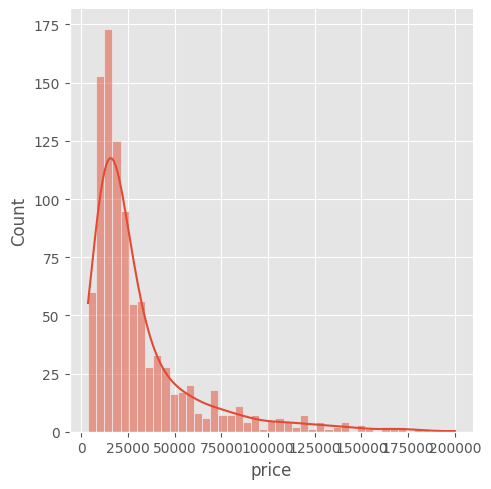

In [379]:
sns.displot(kind = 'hist', data = smartphone_df, x = 'price', kde = True)

**processor_brand**

In [380]:
smartphone_df['processor_brand'].value_counts()

processor_brand
snapdragon    410
helio         201
dimensity     177
exynos         50
bionic         45
unisoc         26
tiger          24
google          9
kirin           6
spreadtrum      4
sc9863a         2
fusion          1
mediatek        1
Name: count, dtype: int64

<Axes: ylabel='processor_brand'>

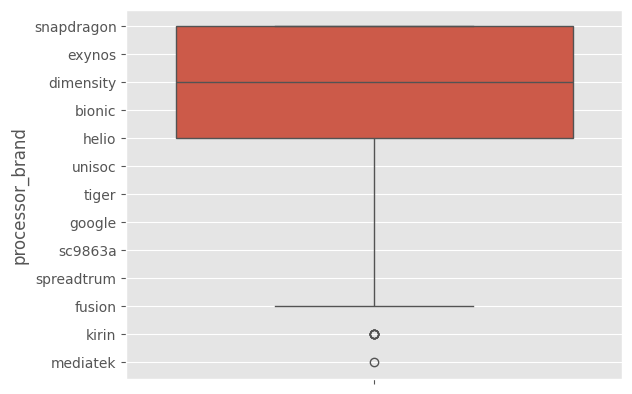

In [381]:
sns.boxplot(smartphone_df['processor_brand'])


* After checking manually **mediatek** and **dimensity** are the same processor brand and **sc9863a**, **spreadtrum**, **tiger** and **UNISOC** are the same brand


In [382]:
smartphone_df[smartphone_df['processor_brand'].str.contains('sc9863a', na = False)]

brand_name                             model  price  rating  has_5g  \
292     realme  Realme C11 2021 (4GB RAM + 64GB)   7749    61.0   False   
934     realme                   Realme C11 2021   6499    61.0   False   

     has_nfc  has_ir_blaster processor_brand  num_cores  processor_speed  \
292    False           False         sc9863a        8.0              1.6   
934    False           False         sc9863a        8.0              1.6   

     battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
292            5000.0                        0      46.126138           4.0   
934            5000.0                        0      46.126138           2.0   

     internal_memory  screen_size  refresh_rate   resolution  \
292             64.0         6.52            60  720 x 1600    
934             32.0         6.52            60  720 x 1600    

     num_rear_cameras  num_front_cameras       os  primary_camera_rear  \
292                 1                1.0  android                  8.0   
934                 1                1.0  android                  8.0   

     primary_camera_front  extended_memory_available  extended_upto  
292                   5.0                          1            NaN  
934                   5.0                          1            NaN

In [383]:
smartphone_df['processor_brand'].unique()

array(['snapdragon', 'exynos', 'dimensity', 'bionic', 'helio', 'unisoc',
       'tiger', nan, 'google', 'sc9863a', 'spreadtrum', 'fusion', 'kirin',
       'mediatek'], dtype=object)

In [384]:
smartphone_df['processor_brand'] = smartphone_df['processor_brand'].str.replace('sc9863a', 'unisoc')

In [385]:
smartphone_df[smartphone_df['processor_brand'].str.contains('spreadtrum', na = False)]

brand_name           model  price  rating  has_5g  has_nfc  \
396       itel        itel P36   6490     NaN   False    False   
713      tecno  Tecno Pop 5 Go   6999     NaN   False    False   
874       itel    Itel A23 Pro   3999     NaN   False    False   
972       itel       itel A23s   4787     NaN   False    False   

     has_ir_blaster processor_brand  num_cores  processor_speed  \
396           False      spreadtrum        4.0              1.3   
713           False      spreadtrum        4.0              1.3   
874           False      spreadtrum        4.0              1.4   
972           False      spreadtrum        4.0              1.4   

     battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
396            5000.0                        0      46.126138           1.0   
713            4000.0                        0      46.126138           1.0   
874            2400.0                        0      46.126138           1.0   
972            3020.0                        0      46.126138           2.0   

     internal_memory  screen_size  refresh_rate   resolution  \
396             16.0          6.5            60  1600 x 720    
713             16.0          6.1            60  720 x 1520    
874              8.0          5.0            60   854 x 480    
972             32.0          5.0            60   854 x 480    

     num_rear_cameras  num_front_cameras       os  primary_camera_rear  \
396                 2                1.0  android                  8.0   
713                 2                1.0  android                  5.0   
874                 1                1.0  android                  5.0   
972                 1                NaN  android                  2.0   

     primary_camera_front  extended_memory_available  extended_upto  
396                   8.0                          0            NaN  
713                   5.0                          1            NaN  
874                   2.0                          0            NaN  
972                   NaN                          0            NaN

In [386]:
smartphone_df[smartphone_df['processor_brand'].str.contains('tiger', na = False)]

brand_name                                     model  price  rating  \
75      gionee                            Gionee G13 Pro   6190     NaN   
132   motorola                         Motorola Moto E40   7999    71.0   
137     realme              Realme C35 (6GB RAM + 128GB)  13999    74.0   
155     realme                                Realme C30   5299     NaN   
169       letv                               Letv Y1 Pro   5499     NaN   
188      leeco                              LeEco S1 Pro  10999    65.0   
194     realme                                Realme C35  11828    70.0   
277     realme               Realme C31 (4GB RAM + 64GB)   8999    65.0   
300     realme               Realme C30 (3GB RAM + 32GB)   6299    60.0   
445     realme              Realme C35 (4GB RAM + 128GB)  12787    71.0   
463    infinix                       Infinix Hot 12 Play   8910    66.0   
474   motorola                         Motorola Moto E13  10499    65.0   
496     realme                                Realme C31   8299    62.0   
529    infinix       Infinix Hot 12 Pro (8GB RAM+ 128GB)  12340    76.0   
639       letv                          Letv Y1 Pro Plus   5999    60.0   
644    infinix                        Infinix Hot 12 Pro  10850    74.0   
652     realme              Realme C25Y (4GB RAM + 64GB)   8999    69.0   
703     realme                                Realme C32   9499    65.0   
761   micromax                            Micromax IN 2C   5999    60.0   
795     realme                    Realme Narzo 50i Prime   7999    61.0   
808     realme                    Realme Narzo 50A Prime  11399    73.0   
811     gionee                                Gionee K10   6999     NaN   
856     realme  Realme Narzo 50A Prime (4GB RAM + 128GB)  11879    74.0   
970     realme   Realme Narzo 50i Prime (4GB RAM + 64GB)   8720    64.0   

     has_5g  has_nfc  has_ir_blaster processor_brand  num_cores  \
75    False    False           False           tiger        4.0   
132   False    False           False           tiger        8.0   
137   False    False           False           tiger        8.0   
155   False    False           False           tiger        8.0   
169   False    False           False           tiger        4.0   
188   False    False           False           tiger        4.0   
194   False    False           False           tiger        8.0   
277   False    False           False           tiger        8.0   
300   False    False           False           tiger        8.0   
445   False    False           False           tiger        8.0   
463   False    False           False           tiger        8.0   
474   False    False           False           tiger        8.0   
496   False    False           False           tiger        8.0   
529   False    False           False           tiger        8.0   
639   False    False           False           tiger        4.0   
644   False    False           False           tiger        8.0   
652   False    False           False           tiger        8.0   
703   False    False           False           tiger        8.0   
761   False    False           False           tiger        8.0   
795   False    False           False           tiger        8.0   
808   False    False           False           tiger        8.0   
811   False    False           False           tiger        4.0   
856   False    False           False           tiger        8.0   
970   False    False           False           tiger        8.0   

     processor_speed  battery_capacity  fast_charging_available  \
75              2.00            3500.0                        0   
132             1.80            5000.0                        0   
137             1.80            5000.0                        1   
155             1.82            5000.0                        0   
169             2.00            4000.0                        0   
188             1.80            5000.0            

In [387]:
smartphone_df['processor_brand'] = smartphone_df['processor_brand'].str.replace('spreadtrum', 'unisoc')
smartphone_df['processor_brand'] = smartphone_df['processor_brand'].str.replace('tiger', 'unisoc')

In [388]:
smartphone_df['processor_brand'].value_counts()

processor_brand
snapdragon    410
helio         201
dimensity     177
unisoc         56
exynos         50
bionic         45
google          9
kirin           6
fusion          1
mediatek        1
Name: count, dtype: int64

In [389]:
smartphone_df[smartphone_df['processor_brand'] == 'mediatek']

brand_name                    model  price  rating  has_5g  has_nfc  \
827    samsung  Samsung Galaxy A01 Core   4999     NaN   False    False   

     has_ir_blaster processor_brand  num_cores  processor_speed  \
827           False        mediatek        4.0              1.5   

     battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
827            3000.0                        0      46.126138           1.0   

     internal_memory  screen_size  refresh_rate   resolution  \
827             16.0          5.3            60  720 x 1480    

     num_rear_cameras  num_front_cameras       os  primary_camera_rear  \
827                 1                1.0  android                  8.0   

     primary_camera_front  extended_memory_available  extended_upto  
827                   5.0                          1            NaN

In [390]:
smartphone_df['processor_brand'] = smartphone_df['processor_brand'].str.replace('mediatek', 'dimensity')

In [391]:
smartphone_df['processor_brand'].value_counts()

processor_brand
snapdragon    410
helio         201
dimensity     178
unisoc         56
exynos         50
bionic         45
google          9
kirin           6
fusion          1
Name: count, dtype: int64

<Axes: ylabel='processor_brand'>

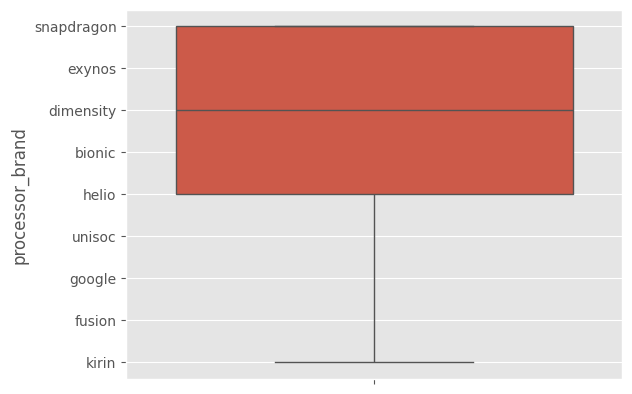

In [392]:
sns.boxplot(smartphone_df['processor_brand'])

<Axes: ylabel='count'>

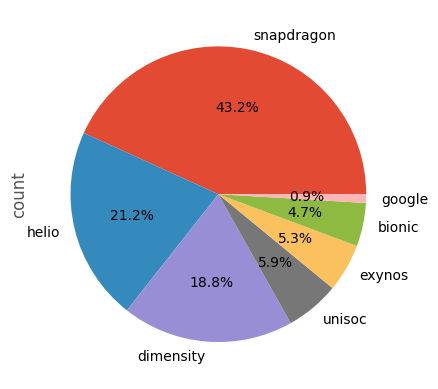

In [393]:
smartphone_df['processor_brand'].value_counts().head(7).plot(kind = 'pie', autopct = '%0.1f%%')

**fast_charging**

<Axes: xlabel='fast_charging'>

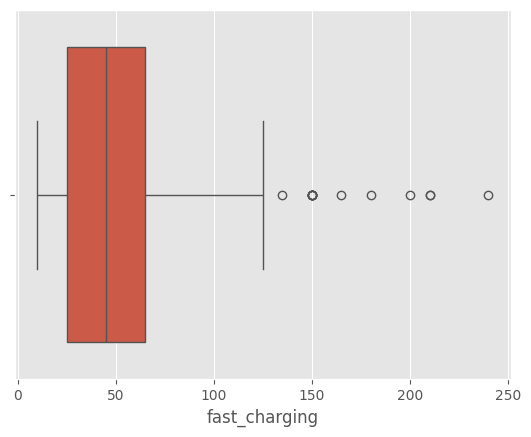

In [394]:
sns.boxplot(smartphone_df['fast_charging'], orient = 'h')

In [395]:
smartphone_df[smartphone_df['fast_charging'] > 150]

brand_name                                   model  price  rating  has_5g  \
38      xiaomi         Xiaomi Redmi Note 12 Pro Max 5G  32999    83.0    True   
180    infinix                      Infinix Zero Ultra  36999    89.0    True   
230       iqoo                          iQOO 11 Pro 5G  58990    89.0    True   
397     realme                         Realme GT Neo 5  34999    83.0    True   
511     xiaomi  Xiaomi Redmi Note 12 Discovery Edition  26990    86.0    True   
559      nubia              Nubia Red Magic 8 Pro Plus  60999    86.0    True   

     has_nfc  has_ir_blaster processor_brand  num_cores  processor_speed  \
38     False            True      snapdragon        8.0             2.36   
180    False           False       dimensity        8.0             2.50   
230     True            True      snapdragon        8.0             3.20   
397     True           False      snapdragon        8.0             3.20   
511     True            True       dimensity        8.0             2.60   
559     True           False      snapdragon        8.0             3.20   

     battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
38             5200.0                        1          210.0           6.0   
180            4500.0                        1          180.0           8.0   
230            4700.0                        1          200.0           8.0   
397            4600.0                        1          240.0           8.0   
511            4300.0                        1          210.0           8.0   
559            5000.0                        1          165.0          12.0   

     internal_memory  screen_size  refresh_rate    resolution  \
38             128.0         6.67           120  1080 x 2460    
180            256.0         6.80           120  1080 x 2400    
230            256.0         6.78           144  1440 x 3200    
397            128.0         6.70           120  1080 x 2412    
511            256.0         6.67           120  1080 x 2400    
559            256.0         6.80           120  1116 x 2480    

     num_rear_cameras  num_front_cameras       os  primary_camera_rear  \
38                  4                1.0  android                108.0   
180                 3                1.0  android                200.0   
230                 3                1.0  android                 50.0   
397                 3                1.0  android                 50.0   
511                 3                1.0  android                200.0   
559                 3                1.0  android                 50.0   

     primary_camera_front  extended_memory_available  extended_upto  
38                   32.0                          1          512.0  
180                  32.0                          1            NaN  
230                  16.0                          0            NaN  
397                  16.0                          0            NaN  
511                  16.0                          0            NaN  
559                  16.0                          0            NaN

* These are not outliers

**refresh_rate**

<Axes: xlabel='refresh_rate'>

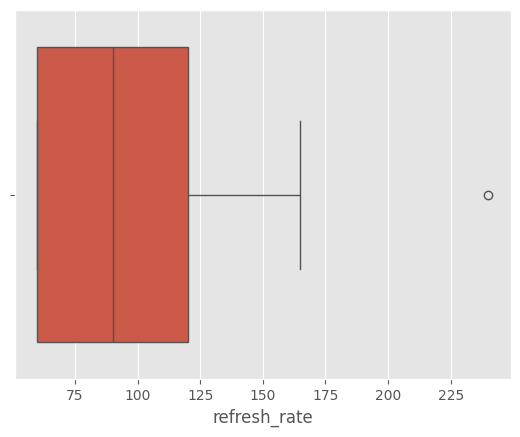

In [396]:
sns.boxplot(smartphone_df['refresh_rate'], orient = 'h')

In [397]:
smartphone_df[smartphone_df['refresh_rate'] > 225]

brand_name          model   price  rating  has_5g  has_nfc  \
784      leitz  Leitz Phone 2  124990    89.0    True     True   

     has_ir_blaster processor_brand  num_cores  processor_speed  \
784           False      snapdragon        8.0              3.0   

     battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
784            5000.0                        1      46.126138          12.0   

     internal_memory  screen_size  refresh_rate    resolution  \
784            256.0          6.6           240  1260 x 2730    

     num_rear_cameras  num_front_cameras       os  primary_camera_rear  \
784                 2                1.0  android                 47.2   

     primary_camera_front  extended_memory_available  extended_upto  
784                  12.6                          1         1024.0

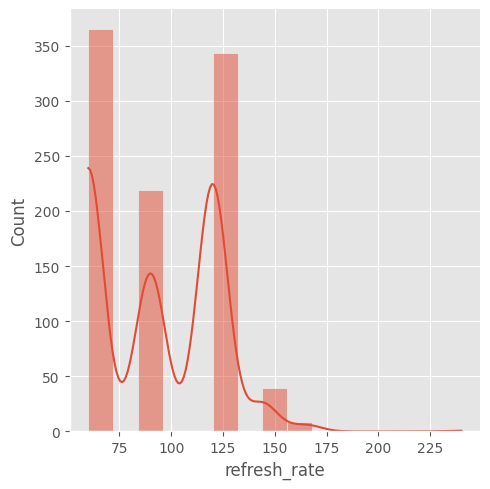

In [398]:
sns.displot(kind = 'hist', data = smartphone_df, x = 'refresh_rate', kde = True)

* This is the valid data point

### **Missing Values**

In [399]:
(smartphone_df.isnull().sum() / smartphone_df.shape[0])*100

brand_name                    0.000000
model                         0.000000
price                         0.000000
rating                       10.245902
has_5g                        0.000000
has_nfc                       0.000000
has_ir_blaster                0.000000
processor_brand               2.049180
num_cores                     0.614754
processor_speed               4.303279
battery_capacity              1.127049
fast_charging_available       0.000000
fast_charging                 0.000000
ram_capacity                  0.000000
internal_memory               0.000000
screen_size                   0.000000
refresh_rate                  0.000000
resolution                    0.000000
num_rear_cameras              0.000000
num_front_cameras             0.409836
os                            0.000000
primary_camera_rear           0.000000
primary_camera_front          0.512295
extended_memory_available     0.000000
extended_upto                48.975410
dtype: float64

In [400]:
smartphone_df.shape

(976, 25)

**ratings**

In [401]:
smartphone_df['rating'].isnull().sum()

100

In [402]:
smartphone_df[smartphone_df['rating'].isnull()]

brand_name                                           model   price  \
14     samsung                     Samsung Galaxy S23 Ultra 5G  114990   
29     oneplus                                  OnePlus 11 Pro   69999   
37     samsung                     Samsung Galaxy S22 Ultra 5G   91999   
49     samsung                           Samsung Galaxy A74 5G   42999   
69        oppo                                Oppo Find N Fold   99990   
75      gionee                                  Gionee G13 Pro    6190   
89     samsung                           Samsung Galaxy A73 5G   41999   
93        vivo                            Vivo X90 Pro Plus 5G   73999   
98        vivo                                  Vivo X Fold 5G  106990   
105     xiaomi                                Xiaomi 13 Pro 5G   58990   
114     xiaomi                                 Xiaomi Redmi A1    6171   
143        jio                                     Jio Phone 3    4499   
155     realme                                      Realme C30    5299   
158       oppo                                 Oppo Find N2 5G   94990   
169       letv                                     Letv Y1 Pro    5499   
190     duoqin                                  Duoqin F22 Pro    9990   
192      nokia                                    Nokia N73 5G   46999   
201   motorola                          Motorola Edge 30 Ultra   54999   
202     xiaomi                              Xiaomi 13 Ultra 5G   71999   
215     google                           Google Pixel 7 Pro 5G   81999   
224       vivo                                        Vivo Y02    8999   
229    oneplus            OnePlus 10 Pro 5G (12GB RAM + 256GB)   65499   
235     xiaomi                            Xiaomi Mix Fold 2 5G  106990   
294   motorola       Motorola Edge 30 Ultra (12GB RAM + 256GB)   59999   
311    samsung  Samsung Galaxy S22 Ultra 5G (12GB RAM + 512GB)  118999   
313       itel                                    itel S16 Pro    6990   
319    samsung                         Samsung Galaxy Z Fold 4  154998   
326    samsung                        Samsung Galaxy S21 Ultra  105999   
331    samsung         Samsung Galaxy A73 5G (8GB RAM + 256GB)   41990   
335    samsung                         Samsung Galaxy A03 Core    6499   
345       oppo                                Oppo Find X6 Pro   77990   
346       vivo                                 Vivo X90 Pro 5G   56999   
350        jio                               Jio JioPhone Next    4649   
353     realme                                     Realme C30s    7145   
368       sony                               Sony Xperia Pro-I  134999   
380       letv                                     Letv Y2 Pro    6999   
396       itel                                        itel P36    6490   
399       poco                                        Poco C50    6499   
400    samsung                 Samsung Galaxy Note 30 Ultra 5G  104999   
403       vivo                                 Vivo X80 Pro 5G   79999   
418   motorola                           Motorola Moto X30 Pro   41990   
419     xiaomi                                Xiaomi 12S Ultra   69990   
421    oneplus            OnePlus 10 Pro 5G (12GB RAM + 512GB)   74999   
435      apple                          Apple iPhone SE 3 2022   43900   
443    infinix                              Infinix Smart 6 HD    6999   
458     xiaomi                             Xiaomi Mi Mix Alpha  199990   
467     realme                                Realme Narzo 50i    6490   
472       vivo                                        Vivo Y25    7499   
475      tecno                                 Tecno Pop 6 Pro    6299   
476       itel                                    Itel A24 Pro    5990   
477       vivo                                Vivo X Fold Plus  113990   
483       sony             Sony Xperia 1 IV (12GB RAM + 512GB)   92980   
510    oneplus                                  OnePlus 12 Pro   69999   
527     

In [403]:
smartphone_df['rating'].describe()

count    876.000000
mean      78.262557
std        7.387218
min       60.000000
25%       74.000000
50%       80.000000
75%       84.000000
max       89.000000
Name: rating, dtype: float64

In [404]:
smartphone_df['rating'].value_counts()

rating
84.0    60
82.0    58
83.0    55
75.0    53
85.0    50
80.0    49
86.0    47
79.0    45
77.0    38
78.0    36
89.0    35
81.0    34
87.0    33
74.0    30
76.0    29
88.0    25
71.0    21
72.0    18
69.0    18
73.0    16
66.0    15
61.0    15
65.0    14
70.0    14
68.0    13
67.0    13
60.0    12
62.0    10
64.0    10
63.0    10
Name: count, dtype: int64

In [405]:
print("Mean:",smartphone_df['rating'].mean())
print("Median:",smartphone_df['rating'].median())
print("Mode:",smartphone_df['rating'].mode())

Mean: 78.26255707762557
Median: 80.0
Mode: 0    84.0
Name: rating, dtype: float64


In [406]:
smartphone_df['rating'] = smartphone_df['rating'].fillna(smartphone_df['rating'].median())

In [407]:
smartphone_df['rating'].isnull().sum()

0

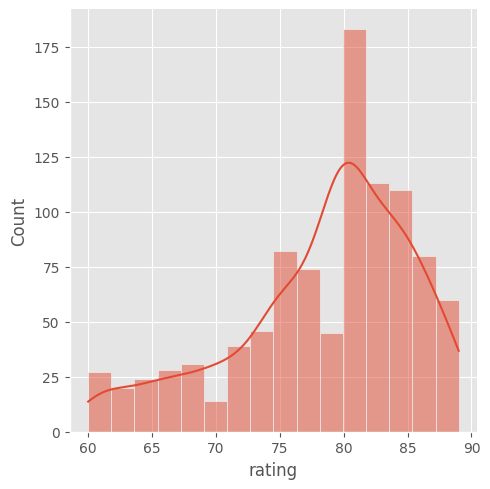

In [408]:
sns.displot(kind = 'hist', data = smartphone_df, x = 'rating', kde = True)

<Axes: ylabel='rating'>

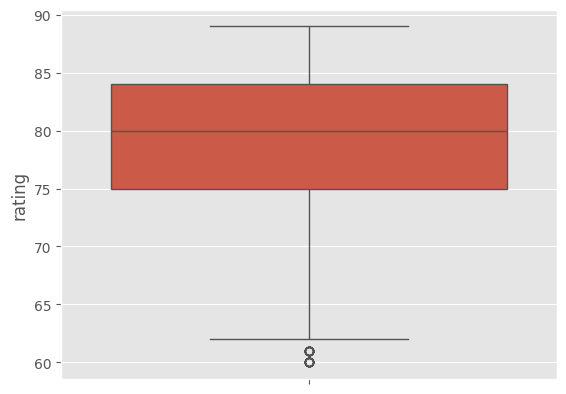

In [409]:
sns.boxplot(smartphone_df['rating'])

* I have impute missing values with median, because the was positively skewed

**processor_brand**

In [410]:
smartphone_df[smartphone_df['processor_brand'].isnull()]

brand_name                                 model  price  rating  has_5g  \
118      tesla                        Tesla Pi Phone  69999    83.0    True   
143        jio                           Jio Phone 3   4499    80.0   False   
187      ikall                         iKall Z19 Pro   8099    60.0   False   
200    samsung                    Samsung Galaxy A13  14450    75.0   False   
307    samsung  Samsung Galaxy A13 (4GB RAM + 128GB)  14999    75.0   False   
313       itel                          itel S16 Pro   6990    80.0   False   
490    samsung                    Samsung Galaxy A15  15990    63.0   False   
523    samsung                    Samsung Galaxy F14  14990    67.0   False   
575    samsung  Samsung Galaxy A13 (6GB RAM + 128GB)  16499    78.0   False   
733      ikall                             iKall Z19   7999    61.0   False   
753      tecno                   Tecno Spark Go 2022   6249    61.0   False   
769       itel                              itel A56   5490    80.0   False   
799    samsung              Samsung Galaxy S23 FE 5G  54999    77.0    True   
800    samsung                Samsung Galaxy M51s 5G  24990    72.0    True   
844     huawei                       Huawei Nova Y61  21990    63.0   False   
910    samsung                    Samsung Galaxy M35  22999    74.0   False   
911    samsung                    Samsung Galaxy A05  12990    63.0   False   
952    samsung                    Samsung Galaxy A11   9990    63.0   False   
965      ikall                             iKall Z18   6799    61.0   False   
979    samsung                Samsung Galaxy M52s 5G  24990    74.0    True   

     has_nfc  has_ir_blaster processor_brand  num_cores  processor_speed  \
118     True           False             NaN        8.0              NaN   
143    False           False             NaN        4.0              1.4   
187    False           False             NaN        4.0              1.6   
200    False           False             NaN        8.0              2.0   
307    False           False             NaN        8.0              2.0   
313    False           False             NaN        4.0              1.3   
490    False           False             NaN        8.0              NaN   
523     True           False             NaN        8.0              NaN   
575    False           False             NaN        8.0              2.0   
733    False           False             NaN        4.0              1.6   
753    False           False             NaN        8.0              2.2   
769    False           False             NaN        4.0              1.3   
799     True           False             NaN        8.0              NaN   
800    False           False             NaN        8.0              NaN   
844    False           False             NaN        8.0              NaN   
910     True           False             NaN        8.0              NaN   
911    False           False             NaN        8.0              NaN   
952    False           False             NaN        8.0              1.8   
965    False           False             NaN        4.0              1.3   
979    False           False             NaN        8.0              NaN   

     battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
118            5000.0                        1     120.000000          16.0   
143            2800.0                        0      46.126138           2.0   
187            5000.0                        0      46.126138           4.0   
200            5000.0                        1      25.000000           4.0   
307            5000.0                        1      25.000000           4.0   
313            4000.0                        0      46.126138           2.0   
490            5000.0                        1      46.126138           6.0   
523            5000.0                        1      25.000000           4.0   
575            5000.0               

In [411]:
smartphone_df['processor_brand'].isnull().sum() / smartphone_df['processor_brand'].shape[0]*100

2.0491803278688523

In [412]:
print('Mode', smartphone_df['processor_brand'].mode()[0])

Mode snapdragon


<Axes: ylabel='Density'>

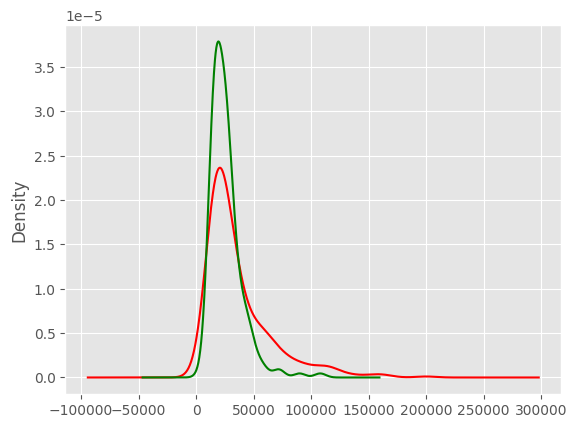

In [413]:
smartphone_df[smartphone_df['processor_brand'] == 'snapdragon']['price'].plot(kind = 'kde', color = 'red')
smartphone_df[smartphone_df['processor_brand'] == 'dimensity']['price'].plot(kind = 'kde', color = 'green')

In [414]:
smartphone_df['processor_brand'].fillna(smartphone_df['processor_brand'].mode()[0], inplace = True)

In [415]:
smartphone_df['processor_brand'].isnull().sum()

0

<Axes: ylabel='Density'>

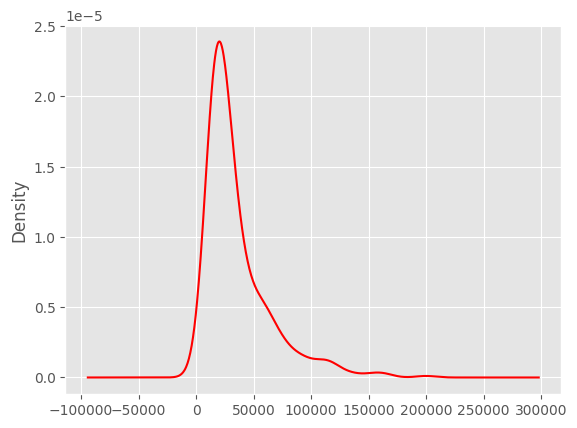

In [416]:
smartphone_df[smartphone_df['processor_brand'] == 'snapdragon']['price'].plot(kind = 'kde', color = 'red')

<Axes: ylabel='processor_brand'>

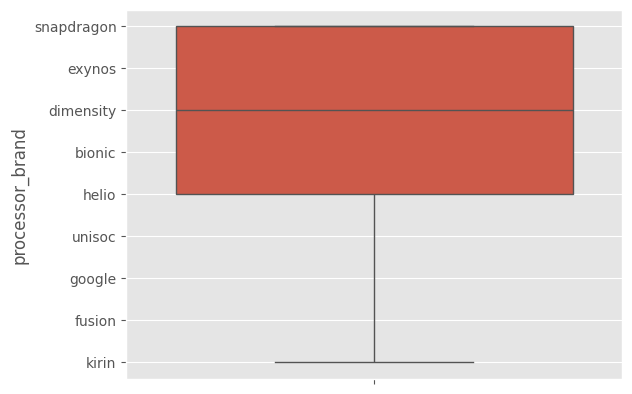

In [417]:
sns.boxplot(smartphone_df['processor_brand'])

* processor_brand was categorical column, so I have impute the missing value with mode(most frequent one)

**num_cores**

In [418]:
smartphone_df['num_cores'].isnull().sum()

6

In [419]:
smartphone_df[smartphone_df['num_cores'].isnull()]

brand_name                    model   price  rating  has_5g  has_nfc  \
152      apple  Apple iPhone 15 Pro Max  142990    79.0    True     True   
262      apple         Apple iPhone XR2   71999    60.0   False     True   
280      apple     Apple iPhone 14 Mini   69990    70.0   False     True   
425      nokia             Nokia X50 5G   34999    76.0    True    False   
444      apple      Apple iPhone 15 Pro  130990    75.0    True     True   
706      apple          Apple iPhone 15   82990    72.0   False     True   

     has_ir_blaster processor_brand  num_cores  processor_speed  \
152           False          bionic        NaN              NaN   
262           False          bionic        NaN              NaN   
280           False          bionic        NaN              NaN   
425           False      snapdragon        NaN              NaN   
444           False          bionic        NaN              NaN   
706           False          bionic        NaN              NaN   

     battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
152            4352.0                        1      25.000000           8.0   
262            3060.0                        1      46.126138           4.0   
280            3500.0                        1      46.126138           6.0   
425            6000.0                        1      33.000000           6.0   
444               NaN                        0      46.126138           8.0   
706            3285.0                        1      46.126138           6.0   

     internal_memory  screen_size  refresh_rate    resolution  \
152            256.0         6.68           120  1284 x 2778    
262             64.0         6.10            60   828 x 1792    
280            128.0         5.42            60  1080 x 2340    
425             64.0         6.81            60  1080 x 2400    
444            128.0         6.06           120  1170 x 2532    
706            128.0         6.06            60  1170 x 2532    

     num_rear_cameras  num_front_cameras       os  primary_camera_rear  \
152                 3                1.0      ios                 50.0   
262                 2                1.0      ios                 12.0   
280                 2                1.0      ios                 12.0   
425                 4                1.0  android                108.0   
444                 3                1.0      ios                 50.0   
706                 2                1.0      ios                 50.0   

     primary_camera_front  extended_memory_available  extended_upto  
152                  12.0                          0            NaN  
262                   7.0                          0            NaN  
280                  12.0                          0            NaN  
425                  32.0                          1            NaN  
444                  12.0                          0            NaN  
706                  13.0                          0            NaN

* Most of the phones are of apple
* apple have six core processor

In [420]:
print("Mean:",smartphone_df['num_cores'].mean())
print("Median:",smartphone_df['num_cores'].median())
print("Mode:",smartphone_df['num_cores'].mode())

Mean: 7.771134020618557
Median: 8.0
Mode: 0    8.0
Name: num_cores, dtype: float64


In [421]:
smartphone_df['num_cores'] = smartphone_df['num_cores'].fillna(6.0)

In [422]:
smartphone_df['num_cores'].isnull().sum()

0

In [423]:
smartphone_df['num_cores'].shape

(976,)

**processor_speed**

In [424]:
smartphone_df['processor_speed'].isnull().sum()

42

In [425]:
smartphone_df[smartphone_df['processor_speed'].isnull()]

brand_name                            model   price  rating  has_5g  \
27       apple          Apple iPhone 14 Pro Max  129990    76.0    True   
78     samsung            Samsung Galaxy A34 5G   24999    75.0    True   
100      apple              Apple iPhone 14 Pro  119990    75.0    True   
118      tesla                   Tesla Pi Phone   69999    83.0    True   
122     google                  Google Pixel 6A   29999    71.0    True   
129     google                  Google Pixel 7A   34990    69.0    True   
152      apple          Apple iPhone 15 Pro Max  142990    79.0    True   
206    samsung            Samsung Galaxy A54 5G   34999    76.0    True   
209      apple  Apple iPhone 14 Pro Max (256GB)  139990    77.0    True   
224       vivo                         Vivo Y02    8999    80.0   False   
241    samsung            Samsung Galaxy A75 5G   44999    83.0    True   
255    samsung         Samsung Galaxy S22 FE 5G   51999    79.0    True   
262      apple                 Apple iPhone XR2   71999    60.0   False   
280      apple             Apple iPhone 14 Mini   69990    70.0   False   
288      apple    Apple iPhone 14 Pro Max (1TB)  182999    78.0    True   
362    samsung         Samsung Galaxy S24 Ultra  119990    85.0    True   
380       letv                      Letv Y2 Pro    6999    80.0   False   
398      apple            Apple iPhone 15 Ultra  149900    79.0    True   
416      apple      Apple iPhone 14 Pro (256GB)  129990    76.0    True   
425      nokia                     Nokia X50 5G   34999    76.0    True   
444      apple              Apple iPhone 15 Pro  130990    75.0    True   
490    samsung               Samsung Galaxy A15   15990    63.0   False   
523    samsung               Samsung Galaxy F14   14990    67.0   False   
640    oneplus                   OnePlus Nord 5   34999    76.0    True   
668       vivo        Vivo Y02 (2GB RAM + 32GB)    7999    80.0   False   
706      apple                  Apple iPhone 15   82990    72.0   False   
735       vivo                     Vivo S17 Pro   49990    77.0    True   
739      apple  Apple iPhone 14 Pro Max (512GB)  169900    78.0    True   
740     google                   Google Pixel 8   53990    75.0    True   
789      apple        Apple iPhone 14 Pro (1TB)  172999    77.0    True   
799    samsung         Samsung Galaxy S23 FE 5G   54999    77.0    True   
800    samsung           Samsung Galaxy M51s 5G   24990    72.0    True   
802       poco                   Poco X6 Pro 5G   19999    72.0    True   
804    samsung               Samsung Galaxy M14   14999    60.0   False   
805       vivo                   Vivo T2 Pro 5G   29990    76.0    True   
844     huawei                  Huawei Nova Y61   21990    63.0   False   
845       iqoo                          iQOO Z9   19990    76.0    True   
892      apple             Apple iPhone 15 Plus   84990    75.0    True   
910    samsung               Samsung Galaxy M35   22999    74.0   False   
911    samsung               Samsung Galaxy A05   12990    63.0   False   
973     google               Google Pixel 8 Pro   70990    80.0    True   
979    samsung           Samsung Galaxy M52s 5G   24990    74.0    True   

     has_nfc  has_ir_blaster processor_brand  num_cores  processor_speed  \
27      True           False          bionic        6.0              NaN   
78      True           False          exynos        8.0              NaN   
100     True           False          bionic        6.0              NaN   
118     True           False      snapdragon        8.0              NaN   
122     True           False          google        8.0              NaN   
129     True           False          google        8.0              NaN   
152     True           False          bionic        6.0              NaN   
206     True           False          exynos        8.0              NaN   
209     True           False          bionic        6.0              NaN   
224    False      

In [426]:
print("Mean:",smartphone_df['processor_speed'].mean())
print("Median:",smartphone_df['processor_speed'].median())
print("Mode:",smartphone_df['processor_speed'].mode())

Mean: 2.42652034261242
Median: 2.3
Mode: 0    2.0
Name: processor_speed, dtype: float64


In [427]:
smartphone_df['processor_speed'].corr(smartphone_df['price'])

0.6777172773412627

In [428]:
smartphone_df['processor_speed'].describe()

count    934.000000
mean       2.426520
std        0.463024
min        1.200000
25%        2.050000
50%        2.300000
75%        2.840000
max        3.220000
Name: processor_speed, dtype: float64

In [429]:
x_df = smartphone_df['processor_speed']

In [430]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5)

In [431]:
x_df_reshaped = x_df.values.reshape(-1, 1)

x_df_values = imputer.fit_transform(x_df_reshaped)

In [432]:
x_df = pd.DataFrame(x_df_values)

In [433]:
smartphone_df['processor_speed'] = x_df

In [434]:
smartphone_df['processor_speed'].fillna(smartphone_df['processor_speed'].mean(), inplace = True)

In [435]:
smartphone_df['processor_speed'].describe()

count    976.000000
mean       2.427144
std        0.452669
min        1.200000
25%        2.050000
50%        2.400000
75%        2.840000
max        3.220000
Name: processor_speed, dtype: float64

In [436]:
smartphone_df['processor_speed'].isnull().sum()

0

**fast_charging**

In [437]:
smartphone_df['fast_charging'].isnull().sum()

0

In [438]:
smartphone_df[smartphone_df['fast_charging'].isnull()]

Empty DataFrame
Columns: [brand_name, model, price, rating, has_5g, has_nfc, has_ir_blaster, processor_brand, num_cores, processor_speed, battery_capacity, fast_charging_available, fast_charging, ram_capacity, internal_memory, screen_size, refresh_rate, resolution, num_rear_cameras, num_front_cameras, os, primary_camera_rear, primary_camera_front, extended_memory_available, extended_upto]
Index: []

In [439]:
smartphone_df['fast_charging'].fillna(smartphone_df['fast_charging'].mean(), inplace = True)

In [440]:
smartphone_df['fast_charging'].isnull().sum()

0

In [441]:
smartphone_df.dropna(subset=['num_front_cameras', 'primary_camera_front'], inplace=True)

In [442]:
smartphone_df.head()

brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro Plus  24999    82.0    True    False   

   has_ir_blaster processor_brand  num_cores  processor_speed  \
0           False      snapdragon        8.0              3.2   
1           False      snapdragon        8.0              2.2   
2           False          exynos        8.0              2.4   
3           False      snapdragon        8.0              2.2   
4           False       dimensity        8.0              2.6   

   battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
0            5000.0                        1     100.000000          12.0   
1            5000.0                        1      33.000000           6.0   
2            5000.0                        1      15.000000           4.0   
3            5000.0                        1      46.126138           6.0   
4            5000.0                        1      67.000000           6.0   

   internal_memory  screen_size  refresh_rate    resolution  num_rear_cameras  \
0            256.0         6.70           120  1440 x 3216                  3   
1            128.0         6.59           120  1080 x 2412                  3   
2             64.0         6.60            90  1080 x 2408                  3   
3            128.0         6.55           120  1080 x 2400                  3   
4            128.0         6.70           120  1080 x 2412                  3   

   num_front_cameras       os  primary_camera_rear  primary_camera_front  \
0                1.0  android                 50.0                  16.0   
1                1.0  android                 64.0                  16.0   
2                1.0  android                 50.0                  13.0   
3                1.0  android                 50.0                  16.0   
4                1.0  android                108.0                  16.0   

   extended_memory_available  extended_upto  
0                          0            NaN  
1                          1         1024.0  
2                          1         1024.0  
3                          1         1024.0  
4                          0            NaN

**os**

In [444]:
smartphone_df['os'].fillna(smartphone_df['os'].mode()[0], inplace = True)

<Axes: ylabel='count'>

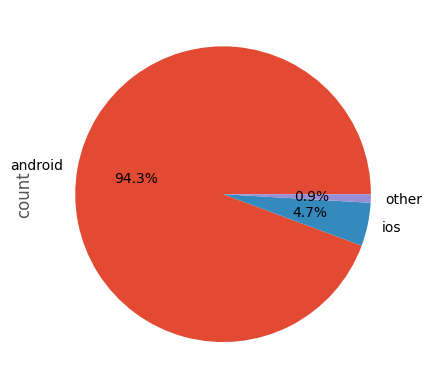

In [445]:
smartphone_df['os'].value_counts().plot(kind = 'pie', autopct = '%0.1f%%')

In [446]:
smartphone_df['os'].isnull().sum()

0

**battery_capacity**

In [448]:
smartphone_df[smartphone_df['battery_capacity'].isnull()]

brand_name                         model   price  rating  has_5g  has_nfc  \
111      apple               Apple iPhone 12   51999    74.0    True     True   
149      apple          Apple iPhone 12 Mini   40999    74.0    True     True   
305      apple       Apple iPhone 12 (128GB)   55999    75.0    True     True   
361      apple  Apple iPhone 12 Mini (128GB)   45999    75.0    True     True   
435      apple        Apple iPhone SE 3 2022   43900    80.0    True     True   
444      apple           Apple iPhone 15 Pro  130990    75.0    True     True   
613      apple   Apple iPhone 12 Pro (512GB)  139900    80.0    True     True   
737      apple             Apple iPhone SE 4   49990    60.0    True     True   
824      apple   Apple iPhone 12 Pro (256GB)  119900    80.0    True     True   
880      apple  Apple iPhone 12 Mini (256GB)   55999    75.0    True     True   
881      apple       Apple iPhone 12 (256GB)   67999    76.0    True     True   

     has_ir_blaster processor_brand  num_cores  processor_speed  \
111           False          bionic        6.0          3.10000   
149           False          bionic        6.0          3.10000   
305           False          bionic        6.0          3.10000   
361           False          bionic        6.0          3.10000   
435           False          bionic        6.0          2.30000   
444           False          bionic        6.0          1.80000   
613           False          bionic        6.0          2.84000   
737           False          bionic        6.0          2.42652   
824           False          bionic        6.0          2.05000   
880           False          bionic        6.0          2.30000   
881           False          bionic        6.0          2.30000   

     battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
111               NaN                        0      46.126138           4.0   
149               NaN                        0      46.126138           4.0   
305               NaN                        0      46.126138           4.0   
361               NaN                        0      46.126138           4.0   
435               NaN                        0      46.126138           4.0   
444               NaN                        0      46.126138           8.0   
613               NaN                        0      46.126138           6.0   
737               NaN                        0      46.126138           4.0   
824               NaN                        0      46.126138           6.0   
880               NaN                        0      46.126138           4.0   
881               NaN                        0      46.126138           4.0   

     internal_memory  screen_size  refresh_rate    resolution  \
111             64.0         6.10            60  1170 x 2532    
149             64.0         5.40            60  1080 x 2340    
305            128.0         6.10            60  1170 x 2532    
361            128.0         5.40            60  1080 x 2340    
435             64.0         4.70            60   750 x 1334    
444            128.0         6.06           120  1170 x 2532    
613            512.0         6.10            60  1170 x 2532    
737             64.0         6.10            60   750 x 1580    
824            256.0         6.10            60  1170 x 2532    
880            256.0         5.40            60  1080 x 2340    
881            256.0         6.10            60  1170 x 2532    

     num_rear_cameras  num_front_cameras   os  primary_camera_rear  \
111                 2                1.0  ios                 12.0   
149                 2                1.0  ios                 12.0   
305                 2                1.0  ios                 12.0   
361                 2                1.0  ios                 12.0   
435                 1                1.0  ios                 12.0   
444                 3                1.0  ios                 50.0   
613   

In [451]:
smartphone_df['battery_capacity'].describe()

count      960.000000
mean      4819.326042
std        995.572994
min       1821.000000
25%       4500.000000
50%       5000.000000
75%       5000.000000
max      22000.000000
Name: battery_capacity, dtype: float64

In [452]:
x_df = smartphone_df['battery_capacity']

In [453]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 5)

In [454]:
x_df_reshaped = x_df.values.reshape(-1, 1)

x_df_values = imputer.fit_transform(x_df_reshaped)

In [455]:
x_df = pd.DataFrame(x_df_values)

In [456]:
smartphone_df['battery_capacity'] = x_df

In [458]:
smartphone_df['battery_capacity'].fillna(smartphone_df['battery_capacity'].mean(), inplace = True)

In [459]:
smartphone_df['battery_capacity'].isnull().sum()

0

<ipython-input-462-05cf30b0defa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = temp_df, x = 'brand_name', y = 'price', palette = 'flare')


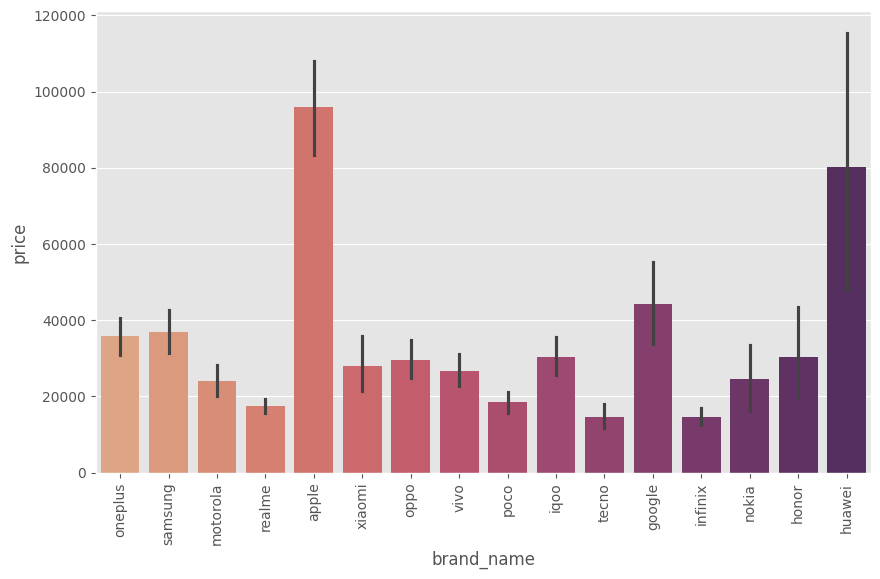

In [462]:
plt.figure(figsize=(10,6))
sns.barplot(data = temp_df, x = 'brand_name', y = 'price', palette = 'flare')
plt.xticks(rotation = 'vertical')
plt.show()

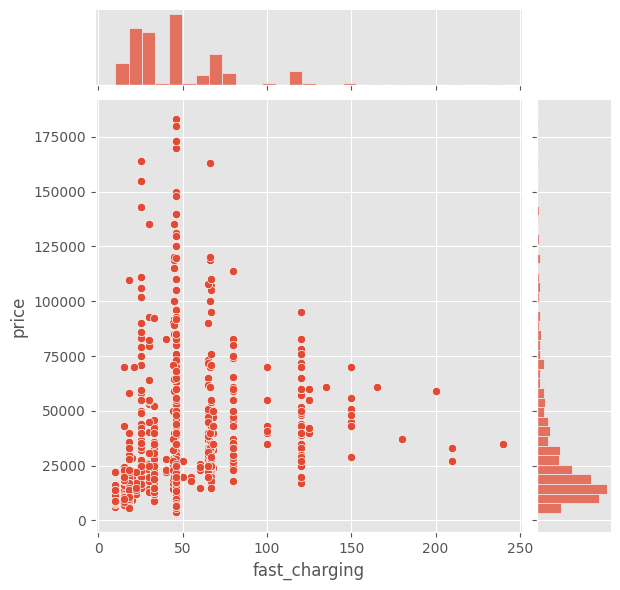

In [467]:
sns.jointplot(data = smartphone_df, x = 'fast_charging', y = 'price')

<Axes: xlabel='processor_brand', ylabel='price'>

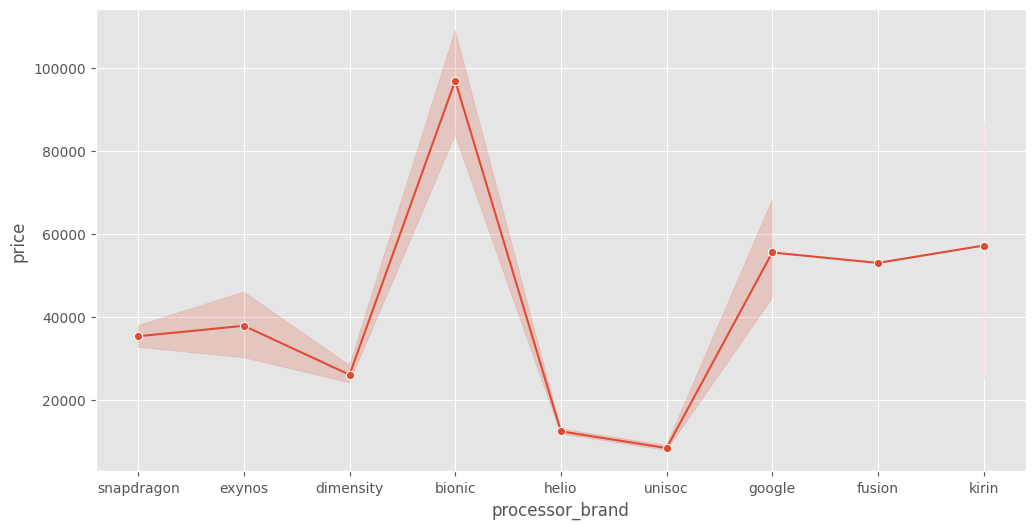

In [478]:
plt.figure(figsize = (12,6))
sns.lineplot(data = smartphone_df, x = 'processor_brand', y = 'price', marker = 'o')

<Axes: xlabel='price', ylabel='brand_name'>

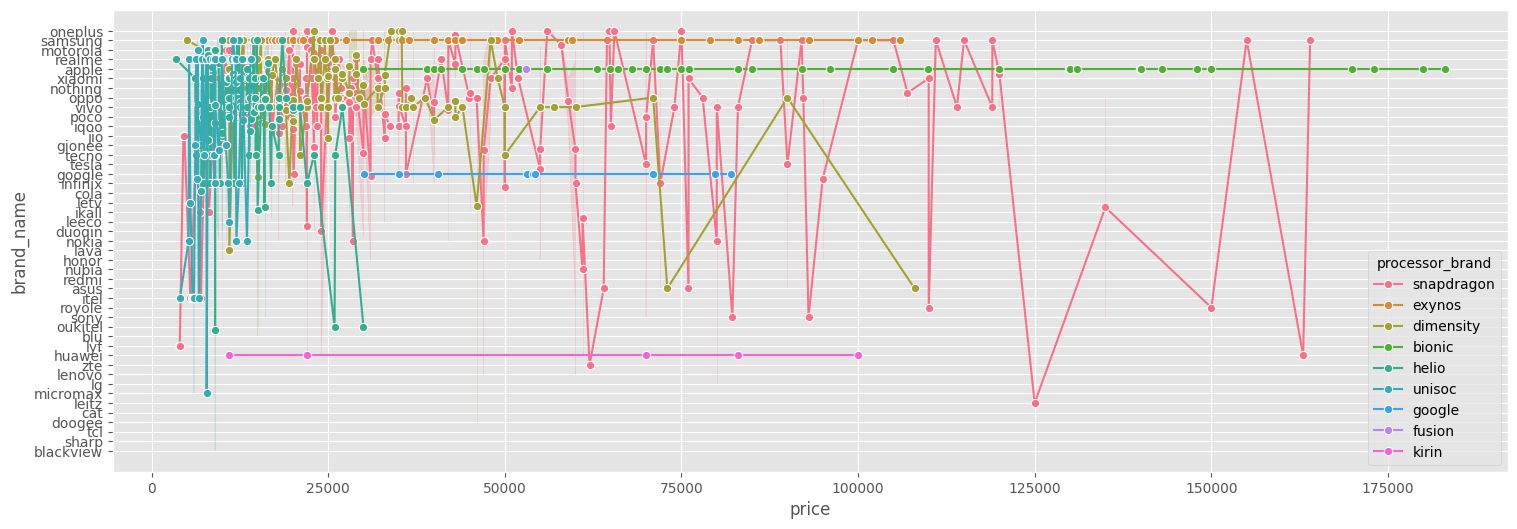

In [483]:
plt.figure(figsize = (18,6))
sns.lineplot(data = smartphone_df, x = 'price', y = 'brand_name', hue = 'processor_brand', marker = 'o')